***

# Settling Transport


\
The idea is to report codes, equations, linked with Transport Reactions problem, and specific tests for validations
***

In [12]:
!python --version
!pip uninstall -y numba llvmlite
!conda install numba llvmlite

Python 3.9.13
done
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::babel==2.9.1=pyhd3eb1b0_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - defaults/noarch::requests-file==1.5.1=pyhd3eb1b0_0
  - defaults/osx-64::bottleneck==1.3.5=py39h67323c0_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - conda-forge/noarch::snuggs==1.4.7=py_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/osx-64::datashape==0.5.4=py39hecd8cb5_1
  - defaults/osx-64::conda==23.3.1=py39hecd8cb5_0
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::gdal==3.0.2=py

In [ ]:
!rm -rf ~/.numba_cache
!jupyter notebook --clear-cache

In [6]:
import numba
import numpy
print("Numba version:", numba.__version__)
print("NumPy version:", numpy.__version__)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


SystemError: initialization of _internal failed without raising an exception


<hr>

### Table of Content:


## [# In Air: Wet settling](#II.InAirWet) 
  [I. From Below-cloud scavenging](#1.FromBelow-cloudscavenging) <br>
  [2. Exact Solution 1 Dimension](#2.ExactSolutions1Dimension) <br>
  [3. Exact Solution 2 Dimensions](#3.ExactSolutions2Dimensions) <br>
  [4. Eulerian Modelling](#4.EulerianModelling) <br>
  [5. Mass Balanced Modelling](#5.MassBalancedModelling)<br>
  [6. Usefull:Convertion air pressures - altitude_m](#5.ConvertionAirePressureAltitude) <br>
  [7. Microplastic Concentration variation and Residence time](#7.ConcentrationAndResidenceTime) <br>

  [8. In Cloud scavenging](#8.InCloudScavenging) <br>


<hr>




# In Air: Wet settling <a class="anchor" id="II.InAirWet"></a>


Wet deposition is the scavenging of chemical species and particles from the atmosphere by atmospheric hydrometeors (snow, rain drops, etc.), and then precipitation. <br> 

Wet settling can be divided into two sub-processes: : <br>
- <b> From Below-cloud scavenging:</b> Particles are scavenged by precipitation, when rain droplets, snow particles collide particles during the precipitation.
- <b> From In-cloud scavenging:</b> Two process may occur there: Particles may be captured by clouds through collision; or the dry particle is the nuclei for condensation and initiate the droplet/snow. The settling occur then with rain or snow.



From Evangelinou 2022 ( https://www.sciencedirect.com/science/article/pii/S0304389422003739) <br>
"A point that adds uncertainty in our calculations is the efficiency with which particles are scavenged by precipitation. Plastics are generally hydrophobic and should therefore act as inefficient cloud condensation (CCN) or ice nuclei (IN). However, coatings formed during ageing of the aerosols may make the particles more hydrophilic with time (Bond et al., 2013). A recent study by Ganguly and Ariya (2019a) reveals that NPs and MPs may become important for cloud formation and thus anthropogenic climate change."

<br>


## I. From Below-cloud scavenging of particulate matters<a class="anchor" id="1.FromBelow-cloudscavenging"></a>

https://www.jstage.jst.go.jp/article/jmsj/83A/0/83A_0_255/_article    
https://acp.copernicus.org/articles/22/11381/2022/    
https://www.sciencedirect.com/science/article/pii/S1352231011009344    
https://acp.copernicus.org/preprints/10/2503/2010/acpd-10-2503-2010.pdf    

Below-cloud scavenging is aerosol adsorption by falling raindrops. 
To easily understand the vocabulary classiffications on air domain, here is a picture of the particle size vocabulary on the domain: <br>


![AirParticlesVocabulary](img/AirParticlesVocabulary.png)

<br>

The time-dependent removal of aerosol by BCS is generally expressed as a first-order decay equation:

\begin{equation}
 \boxed{{\frac{dC}{dt}}\bigg\rvert_{BCS}=-{\lambda}C}
\end{equation}

where C is the atmospheric concentration (for instance in μg m−3) and λ, the scavenging coefficient (in s−1).

Established theories state a dependence of the BCS coefficient, among other things, on the raindrop size distributions (RSDs) and on the raindrops terminal velocities. 
Here are shortly recalled the theoretical formulae of the scavenging coefficient for gases, λg and for PMs, λp, the one of our interest. The derivation of these formulae are detailed, for instance, in Seinfeld and Pandis (1998).<br>
<br>
<br>
Scavenging coefficient for PM:<br>
<br>


\begin{equation}
\boxed{\lambda_p = \int_R \pi R^2 v_t (_R) E(_R ,_r) N (_R) dR}
\end{equation}


In the equations above, R and r (in m) are the raindrop and the PM radii, respectively.    
E(R,r) is the collision efficiency of a PM with a raindrop. This is the probability for a PM of radius r to collide with a raindrop of radius R.    
N(R) (in m−4) is the raindrops size distribution     
and vt(R) (in m s−1), the raindrops terminal velocity.


<br>


PMs are captured by raindrops essentially by collision. Collision becomes possible when the PMs are located in a cylinder of radius (R + r) centred around the falling raindrop (R and r being the raindrop and PM diameters, respectively). However, even though PMs are located in that volume, collision does not necessarily occur. Indeed, PMs are pushed aside by the streamlines induced by the falling raindrop itself. Let’s call E(R,r), the collision efficiency (please see the joined “ESM”). This is the probability for a PM of radius r to collide with a raindrop of radius R. For convenience, it is also assumed that any collision leads to the capture of the particle by the raindrop. Moreover, the PM fall speed is neglected with respect to the raindrop terminal velocity. Following these assumptions, equation (3) is established for the scavenging coefficient of PMs of radius r.

Now, if it is assumed that a single representative radius R can account for all the raindrops (monodispersion), the following easy to use relation is obtained for the scavenging coefficient.(16)

\begin{equation}
\boxed{\lambda_p^R = \frac{3}{4} v_t (_R) E(_R ,_r) \frac{w_L}{R}}
\end{equation}


<br>
where, $w_L$ is the precipitating water content of the air (in $m_{water}^3.m_{air}^{-3}$)

## A. The Raindrop essential parameters: 

## A.1. The Raindrop terminal velocity $V_{rt}$
     
Two general approaches have been employed to describe raindrop terminal velocity in below-cloud scavenging parameterizations:     
(1) empirical formulas derived directly from experimental data and     
(2) physically-based parameterizations.     

Table 1 lists some commonly used empirical formulas for the terminal velocity of falling raindrops.     
![Tab1_RainDropTerminalVelocity](img/Tab1RainDropTerminalVelocity.png)




From https://acp.copernicus.org/preprints/10/2503/2010/acpd-10-2503-2010.pdf :

Physically-based analytical expressions usually divide the population of raindrops into several size ranges that correspond to different, physically-distinct flow regimes15 (e.g., Beard, 1976; Seinfeld and Pandis, 2006; Jacobson, 2005).     
Different analytical expressions are employed in different ranges.     
In the present study, we follow the theoretical formula of Beard (1976) for the most calculations.      
Beard’s scheme assigns each raindrop to one of three physically-distinct flow regimes: 
- Stokes’s regime (Dp ≤ 19 μm or Re ≤ 0.01);     
- Transitional regime (19 μm ≤ Dp ≤ 1.07 mm or 0.01 ≤ Re ≤ 300);     
- Newton’s regime (1.07 mm ≤ Dp ≤ 7 mm or 300 ≤ Re ≤ 4000).     


### 1.1. Stokes’s regime (0.5μm ≤ Dp ≤ 19 μm or Re ≤ 0.01)

For raindrops in Stokes’s regime,
the Beard scheme explicitly calculates the terminal velocities using Stokes’s formula:     
**_For Dp ≤ 19 μm or Re ≤ 0.01_**     

\begin{equation}
\boxed{V_{rt} = \frac{D_p^2(\rho_w-\rho_a)gC_c}{18\mu_a}}
\end{equation}
<br>
Where 

Cunningham correction factor:     
\begin{equation}
C_c=1+\frac{2\lambda}{D_p}\Bigg(1.257+0.4exp\Bigg(-0.55\frac{D_p}{\lambda}\Bigg)\Bigg)
\end{equation} 
$\lambda$ : mean free path of air molecules (m) (depend of pressure)    
$\mu_a$ : air viscosity (kg m−1 s−1)     (depend of pressure)     
$\rho_a$ : air density (kg m−3)          (depend of pressure)  
$\rho_w$ : water density (kg m−3)        (depend of pressure)  
$T_a$ : air temperature (K)     
$g$ :  gravitational constant     
$D_p$ : rain drop diameter     

From https://acp.copernicus.org/articles/22/11381/2022/acp-22-11381-2022-supplement.pdf 


### 1.2. Transitional regime (19 μm ≤ Dp ≤ 1.07 mm or 0.01 ≤ Re ≤ 300)

From https://acp.copernicus.org/articles/22/11381/2022/acp-22-11381-2022-supplement.pdf 

For the transitional regime, one needs to use the drag coefficient $𝐶_𝐷$ as an empirical means to represent the drag force on the raindrop (Seinfeld and Pandis, 1998). Unfortunately, $𝐶_𝐷$ is a function of the Reynold’s number (𝑅𝑒,𝐷) and thus the terminal velocity $V_{rt}$ and we need to determine $V_{rt}$ implicitly. <br>         
To do this, we form the dimensionless variable $𝐶_𝐷𝑅𝑒^2$ (widely known as the Davies number, via the following X) which can then be used to determine 𝑅𝑒,𝐷, which is finally used to determine $V_{rt}(𝐷_p)$. The algorithm according to Beard (1976) is given below:     


\begin{equation}
{X = ln(𝐶_𝐷𝑅𝑒^2) = ln\bigg( \frac{4D_p^3\rho_a(\rho_w-\rho_a)g}{3\mu_a^2}\bigg)}
\end{equation}


\begin{equation}
{Y = \sum_{i=0}^6 a_iX^i}
\end{equation}
With:    
$a_0 = −0.318657×10^1, a_1 = +0.992696×10^0,$     
$a_2 = −0.153193×10^{−2}, a_3 = −0.987059×10^{−3},$     
$a_4 = −0.578878×10^{−3}, a_5 = +0.855176×10^{−4}, a_6=−0.327815×10^{−5}.$     


\begin{equation}
{Re = C_cexp(Y)}
\end{equation}


\begin{equation}
\boxed{V_{rt} = \frac{\mu_aRe}{\rho_aD_p}}
\end{equation}

### 1.3. Newton’s regime (1.07 mm ≤ Dp ≤ 7 mm or 300 ≤ Re ≤ 4000)
From https://acp.copernicus.org/articles/22/11381/2022/acp-22-11381-2022-supplement.pdf 

It is now necessary to construct a formula for the surface tension of the raindrop (𝜎𝑤,𝑎, N m-1) as a function of temperature in order to calculate the dimensionless Bond number.     

The surface tension decreases as temperature decreases and be described empirically using formulae 
- for $−40^oC < T_c < 0^oC$ from Pruppacher and Klett (2010) 
\begin{equation}
{\sigma_{w,a} = 0.001 \sum_{i=0}^6 b_iT^i}
\end{equation}
With:    
$b_0 = 75.93, b_1 = 0.115,$     
$b_2 = 6.818 ×10^{−2}, b_3 = 6.511×10^{−3},$     
$b_4 = 2.933×10^{−4}, b_5 = 6.283×10^{−6}, b_6=5.285×10^{−8}.$     
<br>
<br>
- $0^oC < T_c$ from Bohren and Albrecht (1998).
\begin{equation}
{\sigma_{w,a} = 0.2358 \bigg( \frac{374 - T_C}{647.15}\bigg)^{1.256} \bigg[1 − 0.625 \bigg(\frac{374 - T_C}{647.15}\bigg)\bigg]}
\end{equation}

<br>
<br>

For more convienece, Jones et al. (2022) fitted both equations, the result is:

\begin{equation}
{\sigma_{w,a} = 10^{\sum_0^6c_ilog(_10D_p)^i}}
\end{equation}
$c_0 = 0.63357089, c_1 = 0.82965738,$     
$c_2 = −0.37507553, c_3 = 0.01117498,$     
$c_4 = −0.05815324, c_5 = −0.04914836, c_6=−0.00844277.$ 

Experimental data: from https://journals.ametsoc.org/view/journals/atsc/6/4/1520-0469_1949_006_0243_ttvoff_2_0_co_2.xml?tab_body=pdf

***
#### My conclusion: Based on comparisons, the theoretical Beard scheme (1976) is the most efficient for our project. A pre-process computation of differente size-velocity may be done to reduce computational time.
***

rho_Air= 1.1175174596663686  mu_Air= 1.829951286697867e-05
 v_Air= 466.71699836203004  mfp_Air= 7.017163389110597e-08
[7.83e-05, 9.13e-05, 0.0001064, 0.0001241, 0.0001447, 0.0001687, 0.0001966, 0.000229, 0.000267, 0.000312, 0.000363, 0.000424, 0.000494, 0.000576, 0.000671, 0.000783, 0.000913, 0.001064, 0.001241, 0.001447, 0.001687, 0.001966, 0.00229, 0.00267, 0.00312, 0.00363, 0.00424, 0.00494, 0.00576]


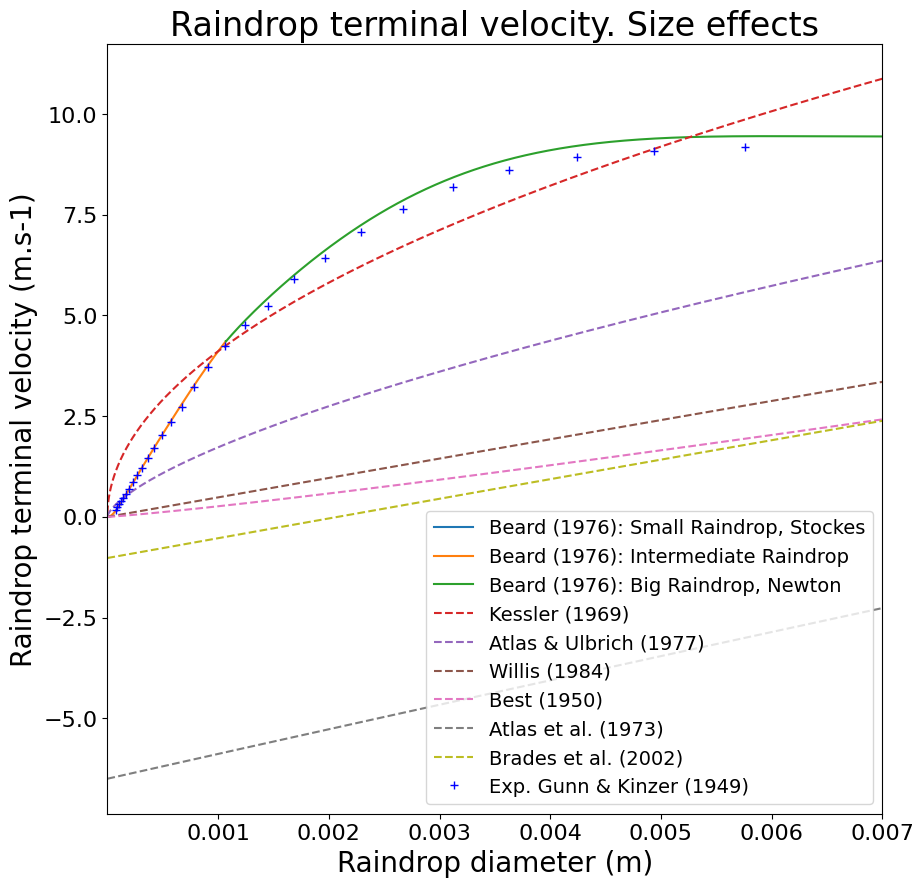

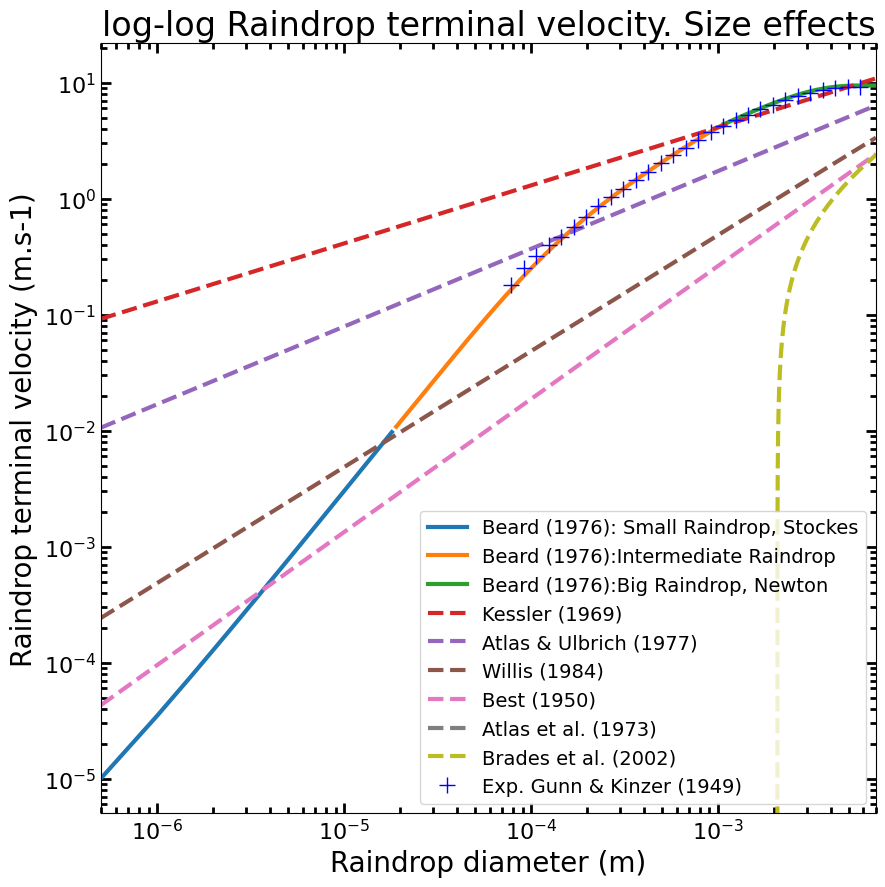

In [13]:

#import numba as nb

import math 
import numpy as np
import matplotlib.pyplot as plt


# Lot of great info there https://acp.copernicus.org/articles/22/11381/2022/acp-22-11381-2022-supplement.pdf

# Input Pressure, Temperature, Drop diameter
P_Air = 950.0 # [hPa] Air pressure
T_Air_C = 23.0 # [C] Air temperature
D_d = 0.0 # [m] Diameter of a raindrop

P_Air = P_Air * 100.0  # [Pa] Air pressure
T_Air = T_Air_C + 273.15 # [K] Air temperature


# Constants ---------------------------------------------------
Ra = 287.05 # [J kg-1 K-1] specific gas constant.
kB = 1.380649e-23   # [J.K-1] Boltzmann Constante

# Constante for air viscosity calculation
S_Air = 120 # [K]
T0_Air = 296.16 # [K]
mu0_Air = 1.83e-5 #[kg.m-1.s-1]


m_Air = 4.78e-26 #[kg] Molecular mass of air
rho_W = 997.0 # [kg.m-3], density of Water
g0 = 9.81 # [m.s-2] gravitational acceleration on earth (Heigth dependent)


# ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
# Density of air [kg.m-3],
rho_Air = P_Air / (Ra * T_Air) # [kg.m-3], density of air 

# Dynamic viscosity of the air [kg−1.s−1]
mu_Air = mu0_Air * ((T0_Air + S_Air) / (T_Air + S_Air)) * pow((T_Air / T0_Air), (3.0 / 2.0))

# Mean speed of air molecules [m.s-1]
v_Air = pow(((8.0 * kB * T_Air) / (m_Air * math.pi)), 0.5)

# Mean free path of air molecules, on dry air [m]
mfp_Air = (2.0 * mu_Air) / (rho_Air * v_Air)



print('rho_Air=',rho_Air,' mu_Air=',mu_Air)
print(' v_Air=', v_Air,' mfp_Air=', mfp_Air)

#@nb.njit
### Raindrop terminal velocity ----------------------------------------
def raindropVelocity (D_d, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0):
    Vrt = 0.0
    ## --For raindrop diameter 0.5μm < 𝐷𝑑 < 19μm -------------------------
    if (D_d <= 19.0e-6):
        # 1-Calculate the Cunningham correction   ------------------------
        Cc = 1.0 + (2.0 * mfp_Air / D_d) * (1.257 + 0.4 * math.exp(-1.1 * D_d / (2.0 * mfp_Air)))

        # 2-Calculate the Raindrop terminal velocity ------------------------
        Vrt = D_d * D_d * (rho_W - rho_Air) * g0 * Cc / (18.0 * mu_Air)
 
    ## --For raindrop diameter 19μm < 𝐷𝑑 < 1.07mm ------------------------
    elif (D_d <= 1.07e-3):
        # 1-Calculate the Cunningham correction   ------------------------
        Cc = 1.0 + (2.0 * mfp_Air / D_d) * (1.257 + 0.4 * math.exp(-1.1 * D_d / (2.0 * mfp_Air)))

        # 2-Calculate the Reynold’s number   ------------------------
        X = math.log(4.0 * D_d * D_d * D_d * rho_Air * (rho_W - rho_Air) * g0 / (3.0 * mu_Air * mu_Air))

        Y = - 3.18657 \
            + 0.992696 * X \
            - 0.153193e-2 * X * X \
            - 0.987059e-3 * X * X * X \
            - 0.578878e-3 * X * X * X * X \
            + 0.855176e-4 * X * X * X * X * X \
            - 0.327815e-5 * X * X * X * X * X * X   

        Re = Cc * math.exp(Y)

        # 3-Calculate the Raindrop terminal velocity ------------------------
        Vrt = mu_Air * Re / (rho_Air * D_d)

    ## --For raindrop diameter 1.07mm < 𝐷𝑑 < 7mm ------------------------
    elif (D_d <= 7.0e-3):  

        # 1-Calculate the surface tension sigma; the bond number B0; and the ratio of the Davies number to the Bond number N0  ------------------------        
        sigma = 0.0
        if (T_Air_C < 0.0):
            sigma = 75.93 + 0.115  * T_Air_C \
                    + 6.818e-2 * T_Air_C * T_Air_C \
                    + 6.511e-3 * T_Air_C * T_Air_C * T_Air_C \
                    + 2.933e-4 * T_Air_C * T_Air_C * T_Air_C * T_Air_C \
                    + 6.283e-6 * T_Air_C * T_Air_C * T_Air_C * T_Air_C * T_Air_C \
                    + 5.285e-8 * T_Air_C * T_Air_C * T_Air_C * T_Air_C * T_Air_C * T_Air_C
            sigma = 0.001 * sigma
        else:
            rT = (374.0 - T_Air_C) / 647.15
            sigma = 0.2358 * (rT**1.256)
            sigma = sigma * (1 - (0.625 * rT))
            
        B0 = 4.0 * D_d * D_d * (rho_W - rho_Air) * g0  
        B0 = B0 / (3.0 * sigma)
        
        Np = sigma * sigma * sigma * rho_Air * rho_Air 
        Np = Np / (mu_Air * mu_Air * mu_Air * mu_Air * (rho_W - rho_Air) * g0 )

        # 2-Calculate the Reynold’s number   ------------------------
        X = math.log (B0 * Np**(1.0/6.0))
        
        Y = - 5.00015 \
            + 5.23778 * X \
            - 2.04914 * X * X \
            + 0.475294  * X * X * X \
            - 0.542819e-1 * X * X * X * X \
            + 0.238449e-2 * X * X * X * X * X   
        
        Re = math.exp(Y) * (Np**(1.0/6.0))
        
        # 3-Calculate the Raindrop terminal velocity ------------------------
        Vrt = mu_Air * Re / (rho_Air * D_d)
            
    return Vrt

D_dSmall = np.arange(0.5e-6, 18.5e-6, 0.5e-6)
allVrtSmall = []
for D_d in D_dSmall: # All diameter of interest
    allVrtSmall = allVrtSmall + [raindropVelocity (D_d, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)]

D_dMedium = np.arange(19.0e-6, 1.07e-3, 0.5e-6)
allVrtMedium = []
for D_d in D_dMedium: # All diameter of interest
    allVrtMedium = allVrtMedium + [raindropVelocity (D_d, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)]

D_dBig = np.arange(1.07e-3, 6.995e-3, 0.5e-6)
allVrtBig = []
for D_d in D_dBig: # All diameter of interest
    allVrtBig = allVrtBig + [raindropVelocity (D_d, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)]   


D_dAll = np.arange(0.5e-6, 7.00e-3, 0.5e-6)

# Attention erreur dans le papier Wang, Vrt n'est pas en cm.s-1 mais dm.s-1
allVrtKessler = 1300.0*(D_dAll**0.5)*10.0e-2   
allVrtAtlasUlbrich = 1767.0*(D_dAll**0.67)*10.0e-2   
allVrtWillis = 4854.0*(D_dAll*np.exp(-1.95*D_dAll))*10.0e-2   
allVrtBest = 958.0*(1-np.exp(-(D_dAll/0.171)**1.147))*10.0e-2   
allVrtAtlas = (965.0-(1030.0*np.exp(-6.0 * D_dAll)))*10.0e-2     
allVrtBrades = -10.21 + 4932.0*D_dAll - 9551.0*D_dAll*D_dAll 
allVrtBrades = allVrtBrades + 7934.0*D_dAll*D_dAll*D_dAll -2362.0*D_dAll*D_dAll*D_dAll
allVrtBrades = allVrtBrades *10.0e-2  

# From https://journals.ametsoc.org/view/journals/atsc/6/4/1520-0469_1949_006_0243_ttvoff_2_0_co_2.xml?tab_body=pdf
allVrtExp = [0.18, 0.25, 0.32, 0.40, 0.47, 0.57, 0.70, 0.87, 1.03, 1.21] 
D_dExp = [7.83e-5, 9.13e-5, 1.064e-4, 1.241e-4, 1.447e-4, 1.687e-4, 1.966e-4, 2.29e-4, 2.67e-4, 3.12e-4]

allVrtExp = allVrtExp + [1.46, 1.70, 2.03, 2.36, 2.74, 3.22, 3.72, 4.24,4.76] 
D_dExp = D_dExp + [3.63e-4, 4.24e-4, 4.94e-4, 5.76e-4, 6.71e-4, 7.83e-4, 9.13e-4, 1.064e-3, 1.241e-3]

allVrtExp = allVrtExp + [5.24, 5.90, 6.42, 7.08, 7.65, 8.19, 8.62, 8.93, 9.08, 9.17]
D_dExp = D_dExp + [1.447e-3, 1.687e-3, 1.966e-3, 2.29e-3, 2.67e-3, 3.12e-3, 3.63e-3, 4.24e-3, 4.94e-3, 5.76e-3]
print(D_dExp)


fig = plt.figure(figsize=(10,10))
plt.plot(D_dSmall,allVrtSmall,label='Beard (1976): Small Raindrop, Stockes')
plt.plot(D_dMedium,allVrtMedium,label='Beard (1976): Intermediate Raindrop')
plt.plot(D_dBig,allVrtBig,label='Beard (1976): Big Raindrop, Newton')

plt.plot(D_dAll,allVrtKessler,'--', label='Kessler (1969)' )
plt.plot(D_dAll,allVrtAtlasUlbrich,'--', label='Atlas & Ulbrich (1977)' )
plt.plot(D_dAll,allVrtWillis,'--', label='Willis (1984)' )
plt.plot(D_dAll,allVrtBest,'--', label='Best (1950)' )
plt.plot(D_dAll,allVrtAtlas,'--', label='Atlas et al. (1973)' )
plt.plot(D_dAll,allVrtBrades,'--', label='Brades et al. (2002)' )

plt.plot(D_dExp,allVrtExp,'b+', label='Exp. Gunn & Kinzer (1949)' )

plt.xlabel('Raindrop diameter (m)', fontsize=20)
plt.ylabel('Raindrop terminal velocity (m.s-1)', fontsize=20)
plt.legend(loc='lower right', prop={'size': 14})
plt.xlim([0.5e-6,7.0e-3])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Raindrop terminal velocity. Size effects", fontsize=24)
plt.savefig('RaindropVtrMethodsCurves.png', dpi=150)  

fig2 = plt.figure(figsize=(10,10))
plt.loglog(D_dSmall,allVrtSmall,label='Beard (1976): Small Raindrop, Stockes', linewidth=3)
plt.loglog(D_dMedium,allVrtMedium,label='Beard (1976):Intermediate Raindrop', linewidth=3)
plt.loglog(D_dBig,allVrtBig,label='Beard (1976):Big Raindrop, Newton', linewidth=3)

plt.loglog(D_dAll,allVrtKessler,'--', label='Kessler (1969)' , linewidth=3)
plt.loglog(D_dAll,allVrtAtlasUlbrich,'--', label='Atlas & Ulbrich (1977)' , linewidth=3)
plt.loglog(D_dAll,allVrtWillis,'--', label='Willis (1984)' , linewidth=3)
plt.loglog(D_dAll,allVrtBest,'--', label='Best (1950)' , linewidth=3)
plt.loglog(D_dAll,allVrtAtlas,'--', label='Atlas et al. (1973)' , linewidth=3)
plt.loglog(D_dAll,allVrtBrades,'--', label='Brades et al. (2002)' , linewidth=3)

plt.loglog(D_dExp,allVrtExp,'b+', label='Exp. Gunn & Kinzer (1949)' , markersize=12)


plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel('Raindrop diameter (m)', fontsize=20)
plt.ylabel('Raindrop terminal velocity (m.s-1)', fontsize=20)
plt.legend(loc='lower right', prop={'size': 14})
plt.xlim([0.5e-6,7.0e-3])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("log-log Raindrop terminal velocity. Size effects", fontsize=24)
plt.savefig('LogLogRaindropVtrMethodsCurves.png', dpi=150)  





NB: 
Here after a little highlight on time used by the multiplication vs ** vs pow vs math.pow, and why I use it like that: 

In [3]:
from timeit import timeit
timeit('7. ** i', setup='i = 5')

0.10461750000001757

In [4]:
timeit('7. *7. *7. *7. *7.')

0.023089207999987593

In [5]:
timeit('pow(7., i)', setup='i = 5')

0.14107108299998572

In [6]:
timeit('math.pow(7, i)', setup='import math; i = 5')

0.17312516600003391

## A.2. The Raindrop number size distribution  N(D_p)

From https://acp.copernicus.org/preprints/10/2503/2010/acpd-10-2503-2010.pdf

Detailed information about the raindrop number size distribution is essential for understanding the mechanism of below-cloud particle scavenging, estimating the scavenging coefficient and improving microphysical parameterizations in numerical weather models and CTMs. 

<br>

Since the pioneering studies of Marshall and Palmer (1948), extensive research has been devoted to modelling the raindrop size distribution (e.g., Ulbrich 1983; Feingold and Levin, 1986), and various mathematical functions have been proposed to fit the observed number distributions for raindrops. 
<br>
However, almost no guidance is available to recommend a specific function and its parameters for use in characterising natural raindrop size spectra because various factors such as rainfall intensity, precipitation type (e.g., stratiform rain, convective rain, thunderstorm), and the stage of rain development all contribute to the formation and evolution of the raindrop size distribution (e.g., Waldvogel, 1974; Sauvageot and Lacaux, 1995; Brandes et al., 2006; Zhang et al., 2008).
<br>
At present, the main mathematical functions used to represent the raindrop number size distribution can be divided into three types based on their formulas: 
- **Exponential distribution**, generally written as (e.g., Marshall and Palmer, 1948)
\begin{equation}
{N(D_p)=N_{0e} exp(-\beta_e D_p)}
\end{equation} 

where $N_{0e}$ is the intercept parameter and $\beta_e$ is a slope parameter.  

- **Gamma distribution**, as general form (e.g., Ulbrich, 1983)
\begin{equation}
{N(D_p)=N_{0g} D_p^\gamma exp(-\beta_g D_p)}
\end{equation} 

where here $N_{0g}$ is a number concentration parameter,$\gamma$ is a distribution shape parameter and
$\beta_g$  is a slope term sensitive to the larger particles.
<br>
- **Lognormal distribution**, as a general form can be written as (e.g., Feingold and Levin, 1986; Cerro et al., 1997):
\begin{equation}
{N(D_p)= \frac {N_{Total}}{\sqrt{2\pi}D_plog(\sigma_D)} exp\bigg[ \frac {-(logD_p - log\bar{D_p})^2}{2log^2      \sigma_D} \bigg]}
\end{equation} 

where $N_{total}$ is the total droplet number density,  ̄Dp is the mean droplet diameter and σD
is the droplet-diameter standard deviation. These three parameters of the lognormal
function are expressed as functions of rainfall intensity. In general, gamma and log-5
normal distributions seem to be better in representing the characteristics of observed
raindrop size distributions, especially at the small-particle end than exponential dis-
tributions (Mircea and Stefan, 1998; de Wolf, 2001; Mircea et al., 2000; Bae et al.,
2006).
<br>

These three distribution functions have been widely used in the parameterization of size-resolved below-cloud scavenging. Since this type of parameterization considers the full set of interactions between the size spectra of raindrops and aerosol particles, the numerical calculation of Λ is very complex and computationally intensive. To reduce the computational burden, some large-scale atmospheric models represent the raindrop size spectrum with a representative raindrop diameter Dr (i.e., a monodisperse distribution), generally the median volume diameter (e.g., Gong et al., 2003, 2006; Loosmore and Cederwall, 2004; Tost et al., 2006). Since all raindrops are assumed to have the same diameter Dr, the integral form of the scavenging coefficient can then be simplified to (https://acp.copernicus.org/preprints/10/2503/2010/acpd-10-2503-2010.pdf)


\begin{equation}
{\lambda_p^R = \frac{\pi}{4} D_r^2 (D_p) E(D_p ,d_p) N_{total}}
\end{equation}


As the rainfall intensity R (in mm s−1) can be defined by the expression

\begin{equation}
{R = \int_0^\infty\frac{\pi}{6} D_r^3 V(D_p) N(D_p) dD_p}
\end{equation}

Then for a monodisperse raindrop number size spectrum, the rainfall intensity can be written as:

\begin{equation}
{R = \frac{\pi}{6} D_r^3 V(D_p) N_{total}}
\end{equation}

And then, combining with previous equations:

\begin{equation}
\boxed{\lambda_p^R = \frac{3}{2} \frac{E(D_p ,d_p)R}{D_p} }
\end{equation}

#### Conclusion: 
#### Based on Wang (2010) https://acp.copernicus.org/preprints/10/2503/2010/acpd-10-2503-2010.pdf , the sensitivity of the scavenging coefficient $\lambda$ is high with the choice of raindrop size distribution. values, calculated using different raindrop size spectra, can differ by a factor of 3 to 5 depending on particle size and precipitation intensity, with high dependence on low rain intensity and particles lower than 3 $\mu$m.  Interestingly, $\lambda$   the use of a monodisperse raindrop size distribution can be a reasonable assumption as long as the proper representative diameter is chosen.



#### We will use a monodisperse raindrop size spectrum to avoid more complexity

### Monodisperse raindrop size adopted (Loosmore and Cederwall, 2004):
https://www.sciencedirect.com/science/article/pii/S1352231003009506

\begin{equation}
\boxed{Dp=0.97R^{0.158} }
\end{equation}
With Dp is in mm, R in mm.h-1



## 2. The collection efficiency E(R,r)
This process is issued from different processes, depending on the nature and size of particles, and the size of the droplets. 


The **classical Slinn (1984) model** for the collection efficiency combines what were historically seen as the dominant processes governing Below-Clouds scavenging (BCS), in the classical Slinn model:
Brownian diffusion, Interception and Inertial impaction. 

Later, secondary dominant processes were added, as the classical Slinn model underpredict the collection efficiency: Thermophoresis, Diffusiophoresis, and Electrophoresis.    

### 2.1. Primary Dominant processes

### - **Brownian diffusion (Eq. 6)**    
Brownian diffusion efficiently collects **nucleation** (≤ 0.01 μm in diameter) and **Aitken** (≤ 0.1 μm in diameter) particles  that move unpredictably against the air flow around the raindrop.

\begin{equation}
\boxed{E_{Br} = \frac{4}{ReSc}\Bigg[1+0.4Re^{1/2}Sc^{1/3}+0.16Re^{1/2}Sc^{1/2}\Bigg]}
\end{equation}
<br>
Where 

Raindrop Reynolds number:
\begin{equation}
Re=\frac{DpV_t\rho_a}{2\mu_a}
\end{equation} 

Particle Schmidt number:
\begin{equation}
Sc=\frac{\mu_a}{\rho_a D_{diff}} ; 
\end{equation} 

Particle Brownian diffusivity coefficient (m2 s−1): 
\begin{equation}
D_{diff}=\frac{k_BT_aC_c}{3\pi \mu_a d_p} ;
\end{equation} 

Cunningham correction factor:     
\begin{equation}
C_c=1+\frac{2\lambda}{d_p}\Bigg(1.257+0.4exp\Bigg(-0.55\frac{d_p}{\lambda}\Bigg)\Bigg)
\end{equation} 
$\lambda$ : mean free path of air molecules (m) (depend of pressure)    
$\mu_a$ : air viscosity (kg m−1 s−1)     (depend of pressure)     
$\rho_a$ : air density (kg m−3)          (depend of pressure)  
$T_a$ : air temperature (K)     
$d_p$ : particle diameter     
$D_p$ : rain drop diameter     
$k_B$ : Boltzmann constant (J K−1)     
$V_t$ : raindrop terminal velocity (m s−1)     



###  - **Interception (Eq. 7)**    
Interception occurs when **coarse particles** are directly within a collection area of the falling raindrop and is thus independent of the particle’s mass or inertia.

\begin{equation}
\boxed{E_{Int} = 4\frac{d_P}{D_p}\Bigg[\frac{\mu_a}{\mu_w} + \frac{d_P}{D_p} ( 1+ 2Re^{1/2} ) \Bigg] }
\end{equation} 

###  - **Inertial impaction (Eq. 8)**    
Inertial impaction collects **coarse particles** with large mass that are unable to move with the streamlines around the falling raindrop.
 
\begin{equation}
\boxed{E_{Imp} = \Bigg(\frac{St-St^*}{St-St^*+2/3}\Bigg)^{3/2} }
\end{equation} 


=> Aerosols with radii less than about 0.1 μm are more efficiently collected due to their Brownian motion, and larger aerosols are more efficiently collected due to their inertia. Thus, there is a minimum collection efficiency for particle radius near 0.1 μm, as first presented by Greenfield (1957), which is often called
the Greenfield gap. (from https://acp.copernicus.org/articles/9/4653/2009/)


### 2.2. Secondary Dominant processes

It has long been known that the classical Slinn (1984) model underpredicts the collection efficiency in the accumulation size mode when compared to observations (e.g. Davenport and Peters, 1978).    
To overcome this deficiency, various other microphysical processes have been used to explain this disparity including:
###  - **Thermophoresis (Eq. 9)** 




Thermophoresis need the thermal conductivity kp of the particles as parameter. For amorphous polymers, this constant is low (< 0.5 W/m K at $25^oC$ on the different exemples there:https://cdn.intechopen.com/pdfs/35438/intech-thermal_conductivity_of_nanoparticles_filled_polymers.pdf )


###  - **Diffusiophoresis (Eq. 10)**: 
Diffusiophoresis is the spontaneous motion of colloidal particles or molecules in a fluid, induced by a concentration gradient of a different substance.
 <br>
###  - **Electric charge effects or “electrophoresis” (Eq. 11)** 
The contribution of an electric charge to the collection efficiency is based on the concept that a raindrop with a charge Qr attracts an aerosol particle with an opposite charge qp and this process enhances the capture efficiency by the raindrop of aerosol particles close to the raindrop’s surface (Andronache, 2004). The electrostatic collection efficiency is expressed as
 
\begin{equation}
\boxed{E_{EC} = \frac{16KC_CQ_Rq_p}{3\pi\mu_aVD_P^2d_p}}
\end{equation} 
 
<br>
where $K =9×10^9 (Nm^2.C^{−2}$) and Qr and qp are the mean charges on the raindrop and on the aerosol particle (in Coulomb, C) and are assumed to be of opposite sign.
A parameterization, with respect to size, has been proposed for the mean raindrop and particle charges
$${Q_r = a \alpha D_p^2}$$ $${q_p = a \alpha d_p^2}$$

where $a=0.83×10^{−6}$ and $\alpha (C.m^{−2})$ is an empirical parameter that can vary between 0, which corresponds to neutral particles and 7, which corresponds to highly electrified clouds associated with thunderstorms (Andronache, 2004; Andronache et al., 2006).

(Davenport and Peters, 1978; Andronache et al., 2006).

Thermophoresis makes a comparable contribution to Brownian diffusion for particles with dp between 0.1 and 1 μm. The contribution of diffusiophoresis is smaller than that of thermophoresis for all particle sizes. Finally, the contribution from electric charges increases with particle size and is dominant for particles with dp between 0.3 and 3.5 μm.

Picture extract from Wang et al (2010) https://acp.copernicus.org/preprints/10/2503/2010/acpd-10-2503-2010.pdf     
    
![Fig1_TotalEfficiency](img/Fig1_TotalEfficiency.png)    
     

    
![Fig2_TotalEfficiency picture](img/Fig2_TotalEfficiency.png)

<br>
<br>
<br>





We do the same computation, with radius of the particle up to 5 mm, in order to represent nanoplastics (1 nm to 1 $\mu m$) and microplastics (1 $\mu m$ to 5 mm)



rho_Air= 1.043947326962123  mu_Air= 1.768442923415346e-05
rho_W= 997.0  mu_W= 0.0012816320840046518
 v_Air= 456.76113570945034  mfp_Air= 7.41742753975746e-08
Re_rain = 125.46021943716906


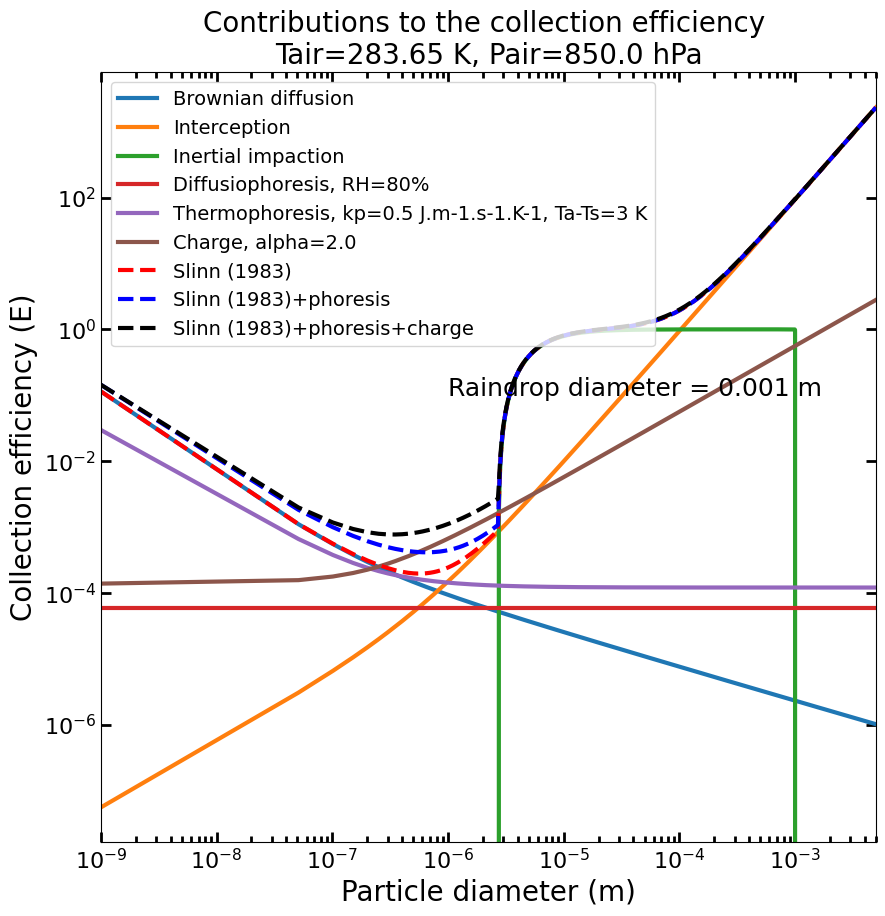

In [14]:
#import numba as nb

import math 
import numpy as np
import matplotlib.pyplot as plt


# Lot of great info there https://acp.copernicus.org/articles/22/11381/2022/acp-22-11381-2022-supplement.pdf

# Input Pressure, Temperature, Drop diameter
P_Air = 850.0 # [hPa] Air pressure
T_Air_C = 10.5 # [C] Air temperature
raindropDiameter = 1.0e-3 # [m] Diameter of a raindrop

P_Air = P_Air * 100.0  # [Pa] Air pressure
T_Air = T_Air_C + 273.15 # [K] Air temperature

Cp_Air = 1003.5 #Specific heat capacity of air  (J kg-1 K-1) 

# Constants ---------------------------------------------------
Ra = 287.05 # [J kg-1 K-1] specific gas constant.
kB = 1.380649e-23   # [J.K-1] Boltzmann Constante
g0 = 9.81 # [m.s-2] gravitational acceleration on earth (Heigth dependent)
pi = math.pi

# Constante for air viscosity calculation
S_Air = 120 # [K]
T0_Air = 296.16 # [K]
mu0_Air = 1.83e-5 #[kg.m-1.s-1]

# Constante for water viscosity calculation
A_W = 2.414e-5 # [Pa·s] 
B_W = 247.8 # [K]
C_W = 140.0 # [K]

m_Air = 4.78e-26 #[kg] Molecular mass of air

Ma = 0.02896 #[kg mol-1] molar mass of dry air 

Mw = 0.01802 #[kg.mol-1] molar mass of water
rho_W = 997.0 #[kg.m-3], density of Water


# Plastics properties

## Density
#https://omnexus.specialchem.com/polymer-properties/properties/density
rhoPVC = 1580.0 # [kg.m-3], density of PolyVinyl Chloride  (PVC) 
rhoPA  = 1000.0 # [kg.m-3], density of PA
rhoLDPE = 920.0 # [kg.m-3], density of Low Density PolyEthylene (LDPE)
rhoHDPE = 980.0 # [kg.m-3], density of High Density PolyEthylene (HDPE)

## Thermal Conductivity
#From https://cdn.intechopen.com/pdfs/35438/intech-thermal_conductivity_of_nanoparticles_filled_polymers.pdf
kpPVC = 0.19 #(W/m K), Thermal Conductivity at 25°C of PolyVinyl Chloride  (PVC)
kpPA = 0.25 #(W/m K), Thermal Conductivity at 25°C of PA
kpLDPE = 0.30 #(W/m K), Thermal Conductivity at 25°C of Low Density PolyEthylene (LDPE)
kpHDPE = 0.44 #(W/m K), Thermal Conductivity at 25°C of High Density PolyEthylene (HDPE)

kp = 0.5 #(W/m K), Thermal Conductivity for validation comparisons

# ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
# Density of air [kg.m-3],
rho_Air = P_Air / (Ra * T_Air) # [kg.m-3], density of air 

# Dynamic viscosity of the air [kg.m-1.s−1]=[Pa.s]
mu_Air = mu0_Air * ((T0_Air + S_Air) / (T_Air + S_Air)) * pow((T_Air / T0_Air), (3.0 / 2.0))

# Dynamic viscosity of the water [kg.m-1.s−1]=[Pa.s]
mu_W = A_W * 10.0 ** (B_W/(T_Air - C_W))


# Mean speed of air molecules [m.s-1]
v_Air = pow(((8.0 * kB * T_Air) / (m_Air * math.pi)), 0.5)

# Mean free path of air molecules, on dry air [m]
mfp_Air = (2.0 * mu_Air) / (rho_Air * v_Air)

print('rho_Air=',rho_Air,' mu_Air=',mu_Air)
print('rho_W=',rho_W,' mu_W=',mu_W)
print(' v_Air=', v_Air,' mfp_Air=', mfp_Air)

#@nb.njit
# ---- Cunningham correction factor on particle:       -----------------------------
def cunninghamCorrector (particleDiameter, meanFreePath):
    CC = 1.257 + 0.4 * np.exp(-0.55 *  (particleDiameter / meanFreePath))
    CC = 1.0 + 2.0 * CC * (meanFreePath / particleDiameter)
    return CC

#@nb.njit
# ---- Raindrop Reynolds number:       -----------------------------
def raindropReynoldsNumber (raindropDiameter, meanFreePath, rho_Air, mu_Air, rho_W, T_Air, g0):
    Vtr = raindropVelocity (raindropDiameter, meanFreePath, rho_Air, mu_Air, rho_W, T_Air, g0)   
    Re = raindropDiameter * Vtr * rho_Air /(2.0 * mu_Air)
    return Re

#@nb.njit
# ---- Collection Efficiency from Brownian Diffusion ------------------
def collectionEfficiencyBrownian (particleDiameter, raindropDiameter, CC, Re):
    Ddiff = kB * T_Air * CC / (3.0 * pi * mu_Air * particleDiameter)
    Sc = mu_Air / (rho_Air * Ddiff)
    sqrtRe = Re**0.5
    Ebrow = 1.0 + 0.4 * sqrtRe * (Sc**(1.0/3.0)) + 0.16* sqrtRe * (Sc**0.5)
    Ebrow = 4.0 * Ebrow / (Re * Sc)
    return Ebrow
    
#@nb.njit    
# ---- Collection Efficiency from Interception ------------------
def collectionEfficiencyInterception (particleDiameter, raindropDiameter, Re):
    EInt = 1.0 + 2.0 * Re**0.5
    EInt = (mu_Air / mu_W) + (EInt * particleDiameter / raindropDiameter) 
    EInt = 4.0 * EInt * particleDiameter / raindropDiameter
    return EInt

#@nb.njit
# ---- Collection Efficiency from Interception ------------------
# rho_p is the density of the particle
def collectionEfficiencyImpaction (rho_p, particleDiameter, raindropDiameter, CC,  Re, Vtr, Vtp):
    lnRe = math.log(1.0 + Re)
    
    St2 = 1.2 + (1.0/12.0) * lnRe 
    St2 = St2 / lnRe
    
    tau = 0.0
    tau = (rho_p - rho_Air) * particleDiameter * particleDiameter * CC
    tau = tau / (18.0 * mu_Air)

    St = 0.0
    St = 2.0 * tau * (Vtr - Vtp) / raindropDiameter

    EImp = 0.0   
    if (St > St2):
        EImp = ((St - St2) / (St - St2 + (2.0/3.0)))**(3.0/2.0)   
    return EImp

#@nb.njit
# ---- Collection Efficiency from Diffusiophoresis ------------------
def collectionEfficiencyDiffusiophoresis (P_Air, T_Air, RH, Re, raindropDiameter, Vtr):
    T0 = 273.15 # [K]
    P0 = 101325.0 # [Pa]   
    
    T_Air_C = T_Air - 273.15
    # Surface temperature of raindrops Ts, assumption from Wang et al. (2010)
    Ts = T_Air_C - 3.0    
    
    ka = 418.4e-5 * (1.04645 + (0.017 * T_Air)) # Air thermal conductivity from Pruppacher and Klett (2010)   
    
    Ddiffwater = 0.211e-4 * (P0 / P_Air) * (T_Air / T0)**1.94  # from Pruppacher and Klett (2010)

    beta_dph = (T_Air * Ddiffwater / P_Air) * (Mw / Ma)**0.5
    
    Scw = mu_Air / (rho_Air * Ddiffwater)
    
    # We use the saturation vapour pressure formula from Seinfeld and Pandis (1998)
    # Caution: temperature is in Celsius degrees. p0 are in Pa   
    a0 = 6.107799961
    a1 = 4.436518521e-1
    a2 = 1.428945805e-2
    a3 = 2.650648471e-4
    a4 = 3.031240396e-6
    a5 = 2.034080948e-8
    a6 = 6.136820929e-11
    
    T = Ts #(T must be in Celsius here)
    p0s = 100.0 * (a0 + a1 * T + \
                   a2 * T * T + \
                   a3 * T * T * T + \
                   a4 * T * T * T * T + \
                   a5 * T * T * T * T * T + \
                   a6 * T * T * T * T * T * T )
    
    T = T_Air_C #(T must be in Celsius here)
    p0_Air = 100.0 * (a0 + a1 * T + \
                      a2 * T * T + \
                      a3 * T * T * T + \
                      a4 * T * T * T * T + \
                      a5 * T * T * T * T * T + \
                      a6 * T * T * T * T * T * T )

    EDiff = 4.0 * beta_dph * \
            (2.0 + 0.6 * (Re**0.5) * (Scw**(1.0/3.0))) * \
            ((p0s / (Ts+273.15)) - (p0_Air * RH / (T_Air ))) / \
            (raindropDiameter * Vtr)   
    return EDiff

#@nb.njit
# ---- Collection Efficiency from Thermophoresis ------------------
def collectionEfficiencyThermophoresis (T_Air, P_Air, kp, particleDiameter, raindropDiameter, CC, Re, Vtr):
    T_Air_C = T_Air - 273.15
    # Surface temperature of raindrops Ts, assumption from Wang et al. (2010)
    Ts = T_Air_C - 3.0    
    
    ka = 418.4e-5 * (1.04645 + (0.017 * T_Air)) # Air thermal conductivity from Pruppacher and Klett (2010)   
    
    Pr = Cp_Air * mu_Air / ka
    
    ld = mfp_Air / raindropDiameter
    
    alpha_th = 2.0 * ka * CC * (ka + (5.0 * ld / kp)) / \
               (5.0 * P_Air * (1.0 + (6.0 * ld)) * ((2.0 * ka) + kp + (10.0 * ld / kp)))
       
    ETh = 4.0 * alpha_th * \
          (2.0 + 0.6 * (Re**0.5) * (Pr**(1.0/3.0)))*(T_Air_C - Ts)/ \
          (raindropDiameter * Vtr)   
    return ETh

#@nb.njit
# ---- Collection Efficiency from Charge ------------------
def collectionEfficiencyCharge (alpha, particleDiameter, raindropDiameter, CC, Vtr):
    K = 9.0e9     # N.m2.C-2
    a = 0.83e-6 
    
    Qd = a * alpha * raindropDiameter * raindropDiameter
    
    qp = a * alpha * particleDiameter * particleDiameter
    
    ECh = 16.0 * K * Qd * qp * CC / \
          (3.0 * pi * mu_Air * Vtr * raindropDiameter * raindropDiameter * particleDiameter)   
    return ECh









# Plot part-------------------------------------
raindropDiameter = 1.00e-3
alpha = 2.0
RH = 80.0/100.0 #relative humidity (%), assumed to be 80 % in this study

Re_rain = raindropReynoldsNumber (raindropDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
print ('Re_rain =', Re_rain)
Vr = raindropVelocity (raindropDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)


particleDiameter = np.arange(1.0e-9, 5.00e-3, 5.0e-8)
CC = cunninghamCorrector (particleDiameter, mfp_Air)
#Vp = raindropVelocity (particleDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)


allEBr = collectionEfficiencyBrownian (particleDiameter, raindropDiameter, CC, Re_rain)
allInt = collectionEfficiencyInterception (particleDiameter, raindropDiameter, Re_rain)

allImp = np.zeros(len(particleDiameter))
allDiff = np.zeros(len(particleDiameter))
for i in range(0, len(particleDiameter)):
    Vp = raindropVelocity (particleDiameter[i], mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
    allImp[i] = collectionEfficiencyImpaction (rhoPVC, particleDiameter[i], raindropDiameter, CC[i], Re_rain, Vr, Vp)
    allDiff[i] = collectionEfficiencyDiffusiophoresis (P_Air, T_Air, RH, Re_rain, raindropDiameter, Vr)
    
allTh = collectionEfficiencyThermophoresis(T_Air, P_Air, kp, particleDiameter, raindropDiameter, CC, Re_rain, Vr)
allCh = collectionEfficiencyCharge(alpha, particleDiameter, raindropDiameter, CC, Vr)


allSlinn = allEBr + allInt + allImp 
allSlinnPh = allSlinn + allDiff + allTh
allTot = allSlinnPh + allCh



fig = plt.figure(figsize=(10,10))
plt.loglog(particleDiameter,allEBr,label='Brownian diffusion', linewidth=3)
plt.loglog(particleDiameter,allInt,label='Interception', linewidth=3)
plt.loglog(particleDiameter,allImp,label='Inertial impaction', linewidth=3)

plt.loglog(particleDiameter,allDiff,label='Diffusiophoresis, RH=80%', linewidth=3)
plt.loglog(particleDiameter,allTh,label='Thermophoresis, kp=0.5 J.m-1.s-1.K-1, Ta-Ts=3 K', linewidth=3)
plt.loglog(particleDiameter,allCh,label='Charge, alpha='+str(alpha), linewidth=3)


plt.loglog(particleDiameter,allSlinn,'r--',label='Slinn (1983)', linewidth=3)
plt.loglog(particleDiameter,allSlinnPh,'b--',label='Slinn (1983)+phoresis', linewidth=3)
plt.loglog(particleDiameter,allTot,'k--',label='Slinn (1983)+phoresis+charge', linewidth=3)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel('Particle diameter (m)', fontsize=20)
plt.ylabel('Collection efficiency (E)', fontsize=20)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlim([1e-9,5.0e-3])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
title = "Contributions to the collection efficiency \nTair="+str(T_Air)+" K, Pair="+str(P_Air/100)+" hPa"
plt.title(title, fontsize=20)
plt.text(1e-6, 1e-1, 'Raindrop diameter = '+ str(raindropDiameter)+' m', fontsize = 18)

plt.savefig('RaindropVtrMethodsCurve_1mms.png', dpi=150)



Re_rain = 409.3816776630775


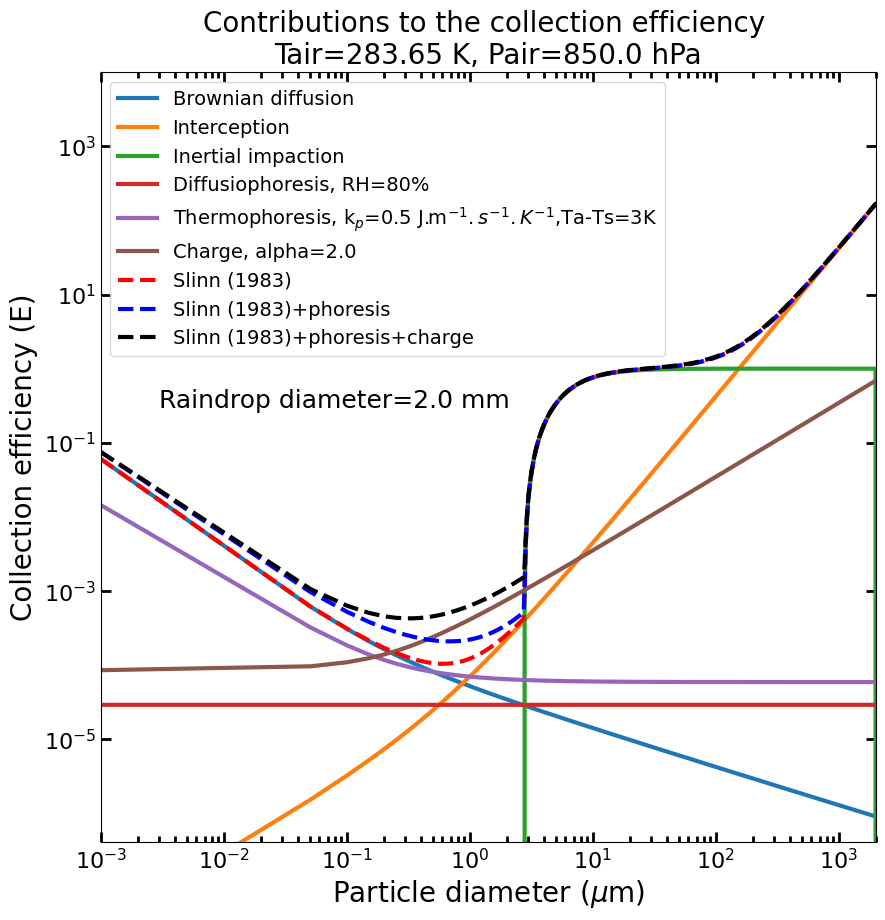

In [15]:
# Plot part-------------------------------------
raindropDiameter = 2.00e-3
alpha = 2.0
RH = 80.0/100.0 #relative humidity (%), assumed to be 80 % in this study

Re_rain = raindropReynoldsNumber (raindropDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
print ('Re_rain =', Re_rain)
Vr = raindropVelocity (raindropDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)


particleDiameter = np.arange(1.0e-9, 5.00e-3, 5.0e-8)
particleDiameter_micro = 1.0e6*particleDiameter
CC = cunninghamCorrector (particleDiameter, mfp_Air)
#Vp = raindropVelocity (particleDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)


allEBr = collectionEfficiencyBrownian (particleDiameter, raindropDiameter, CC, Re_rain)
allInt = collectionEfficiencyInterception (particleDiameter, raindropDiameter, Re_rain)

allImp = np.zeros(len(particleDiameter))
allDiff = np.zeros(len(particleDiameter))
for i in range(0, len(particleDiameter)):
    Vp = raindropVelocity (particleDiameter[i], mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
    allImp[i] = collectionEfficiencyImpaction (rhoPVC, particleDiameter[i], raindropDiameter, CC[i], Re_rain, Vr, Vp)
    allDiff[i] = collectionEfficiencyDiffusiophoresis (P_Air, T_Air, RH, Re_rain, raindropDiameter, Vr)
    
allTh = collectionEfficiencyThermophoresis(T_Air, P_Air, kp, particleDiameter, raindropDiameter, CC, Re_rain, Vr)
allCh = collectionEfficiencyCharge(alpha, particleDiameter, raindropDiameter, CC, Vr)


allSlinn = allEBr + allInt + allImp 
allSlinnPh = allSlinn + allDiff + allTh
allTot = allSlinnPh + allCh



fig = plt.figure(figsize=(10,10))
plt.plot(particleDiameter*1e6,allEBr,label='Brownian diffusion', linewidth=3)

plt.plot(particleDiameter_micro,allInt,label='Interception', linewidth=3)
plt.plot(particleDiameter_micro,allImp,label='Inertial impaction', linewidth=3)

plt.plot(particleDiameter_micro,allDiff,label='Diffusiophoresis, RH=80%', linewidth=3)
plt.plot(particleDiameter_micro,allTh,label='Thermophoresis, k$_p$=0.5 J.m$^{-1}.s^{-1}.K^{-1}$,Ta-Ts=3K', linewidth=3)
plt.plot(particleDiameter_micro,allCh,label='Charge, alpha='+str(alpha), linewidth=3)


plt.plot(particleDiameter_micro,allSlinn,'r--',label='Slinn (1983)', linewidth=3)
plt.plot(particleDiameter_micro,allSlinnPh,'b--',label='Slinn (1983)+phoresis', linewidth=3)
plt.plot(particleDiameter_micro,allTot,'k--',label='Slinn (1983)+phoresis+charge', linewidth=3)

plt.xscale('log')
plt.yscale('log')

plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel(r'Particle diameter ($\mu$m)', fontsize=20)
plt.ylabel('Collection efficiency (E)', fontsize=20)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlim([1e-3,2.0e3])
plt.ylim([4e-7,1.0e4])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
title = "Contributions to the collection efficiency \nTair="+str(T_Air)+" K, Pair="+str(P_Air/100)+" hPa"
plt.title(title, fontsize=20)
plt.text(3e-3, 3e-1, 'Raindrop diameter='+ str(raindropDiameter*1.0e3)+' mm', fontsize = 18)

plt.savefig('RaindropVtrMethodsCurves_2mm.png', dpi=150)

In [16]:


rhoPVC = 1580.0 # [kg.m-3], density of PVC
rhoPA  = 1000.0 # [kg.m-3], density of PA
rhoPE  =  980.0 # [kg.m-3], density of PE


raindropD = np.arange(1.0e-5, 2.00e-3, 1.0e-5)

particleDiameter = np.arange(1.0e-9, 5.0e-5, 1.0e-9)
CC = cunninghamCorrector (particleDiameter, mfp_Air)


allSlinn = np.zeros((len(raindropD), len(particleDiameter)))
allSlinnPh = np.zeros((len(raindropD), len(particleDiameter)))
allTot = np.zeros((len(raindropD), len(particleDiameter)))


allEBr = np.zeros(len(particleDiameter))
allInt = np.zeros(len(particleDiameter))



for i in range(0, len(raindropD)):
    print(i)
    raindropDiameter = raindropD[i]
    Re = raindropReynoldsNumber (raindropDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
    Vr = raindropVelocity (raindropDiameter, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)  
 
    allEBr = collectionEfficiencyBrownian (particleDiameter, raindropDiameter, CC, Re)
    allInt = collectionEfficiencyInterception (particleDiameter, raindropDiameter, Re)
    
    allImp = np.zeros(len(particleDiameter))
    allDiff = np.zeros(len(particleDiameter))

    for j in range(0, len(particleDiameter)):
        Vp = raindropVelocity (particleDiameter[j], mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
        allImp[j] = collectionEfficiencyImpaction (rhoPVC, particleDiameter[j], raindropDiameter, CC[j], Re, Vr, Vp)
        allDiff[j] = collectionEfficiencyDiffusiophoresis (P_Air, T_Air, RH, Re, raindropDiameter, Vr)

    allTh = collectionEfficiencyThermophoresis(T_Air, P_Air, kp, particleDiameter, raindropDiameter, CC, Re, Vr)
    allCh = collectionEfficiencyCharge(alpha, particleDiameter, raindropDiameter, CC, Vr)

        
    allSlinn[i,:] = (allEBr + allInt + allImp)
    allSlinnPh[i,:] = (allEBr + allInt + allImp + allDiff + allTh)
    allTot[i,:] = (allEBr + allInt + allImp + allDiff + allTh + allCh)  
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


/var/folders/82/klr7dwlx2ns9ssqtzcmlrs140000gr/T/ipykernel_14494/516438143.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS2 = plt.contour(X, Y, allSlinn, levels=np.linspace(vmin,vmax,nbLines),extend='max', colors='black', linewidth=.25)


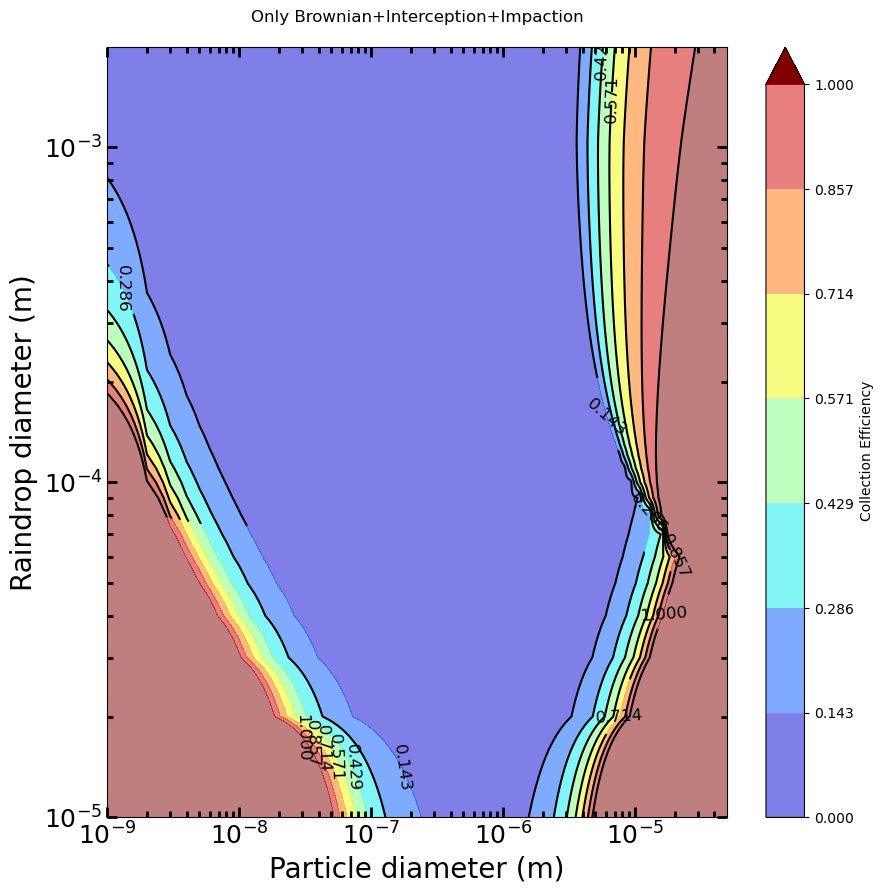

In [22]:
vmin = 0.0
vmax = 1.0
nbLines = 8


fig = plt.figure(figsize=(10,10))
X, Y = np.meshgrid(particleDiameter, raindropD)

CS = plt.contourf(X, Y, allSlinn, levels=np.linspace(vmin,vmax,nbLines),extend='max', alpha=0.50, cmap="jet") #plt.cm.hot)


CS2 = plt.contour(X, Y, allSlinn, levels=np.linspace(vmin,vmax,nbLines),extend='max', colors='black', linewidth=.25)
#manual_locations = [(1e-7, 1e-5), (1e-7, 1.1e-5), (1e-7, 2.0e-5), 
#                    (1e-7, 3e-5), (1.5e-7, 4e-5), (1.5e-7, 4e-5)]
plt.clabel(CS2, inline=1, inline_spacing=0, fontsize=12) #, manual=manual_locations)



# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Collection Efficiency')

plt.xscale('log')
plt.yscale('log')

plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel('Particle diameter (m)', fontsize=20)
plt.ylabel('Raindrop diameter (m)', fontsize=20)

plt.title('Only Brownian+Interception+Impaction\n')
plt.savefig('Slinn_RaindropVtrMethodsCurves.png', dpi=150)


/var/folders/82/klr7dwlx2ns9ssqtzcmlrs140000gr/T/ipykernel_93468/799502993.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS2 = plt.contour(X, Y, allSlinnPh, levels=np.linspace(vmin,vmax,nbLines),extend='max', colors='black', linewidth=.25)


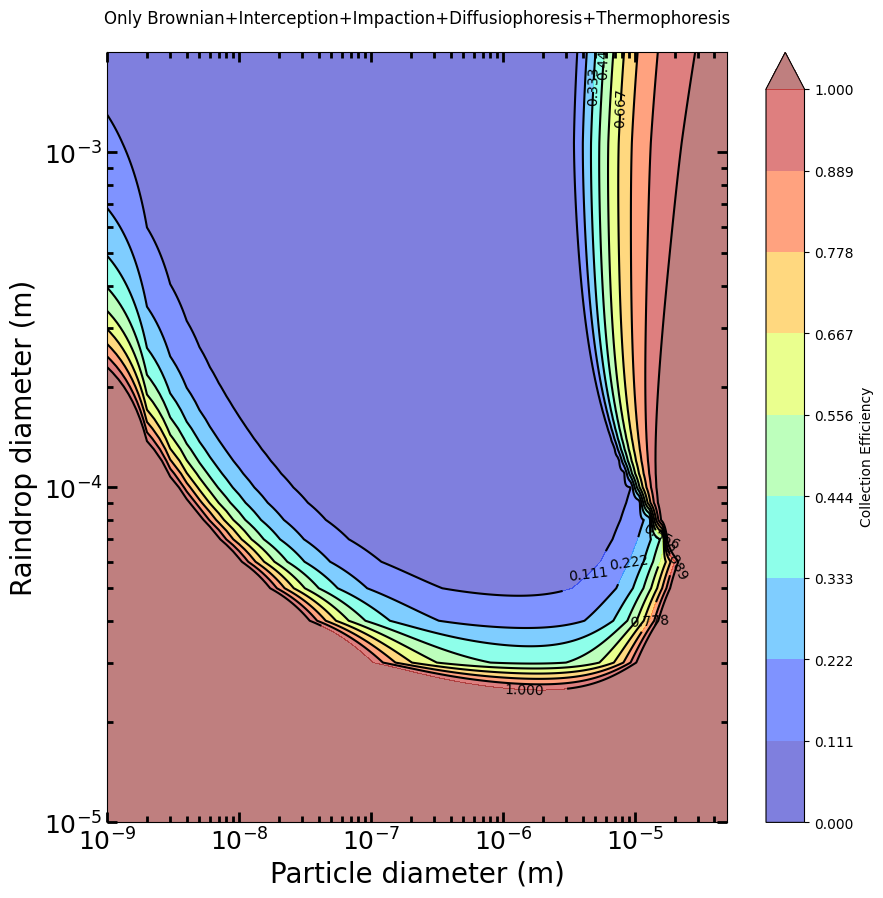

In [17]:
vmin = 0.0
vmax = 1.0
nbLines = 10


fig = plt.figure(figsize=(10,10))
X, Y = np.meshgrid(particleDiameter, raindropD)

CS = plt.contourf(X, Y, allSlinnPh, levels=np.linspace(vmin,vmax,nbLines),extend='max', alpha=0.50, cmap="jet") #plt.cm.hot)
CS2 = plt.contour(X, Y, allSlinnPh, levels=np.linspace(vmin,vmax,nbLines),extend='max', colors='black', linewidth=.25)
plt.clabel(CS2, inline=1, fontsize=10)



# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Collection Efficiency')

plt.xscale('log')
plt.yscale('log')

plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel('Particle diameter (m)', fontsize=20)
plt.ylabel('Raindrop diameter (m)', fontsize=20)

plt.title('Only Brownian+Interception+Impaction+Diffusiophoresis+Thermophoresis\n')
plt.savefig('allSlinnPh_RaindropVtrMethodsCurves.png', dpi=150)

/var/folders/82/klr7dwlx2ns9ssqtzcmlrs140000gr/T/ipykernel_93468/1196272978.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS2 = plt.contour(X, Y, allTot, levels=np.linspace(vmin,vmax,nbLines),extend='max', colors='black', linewidth=.25)


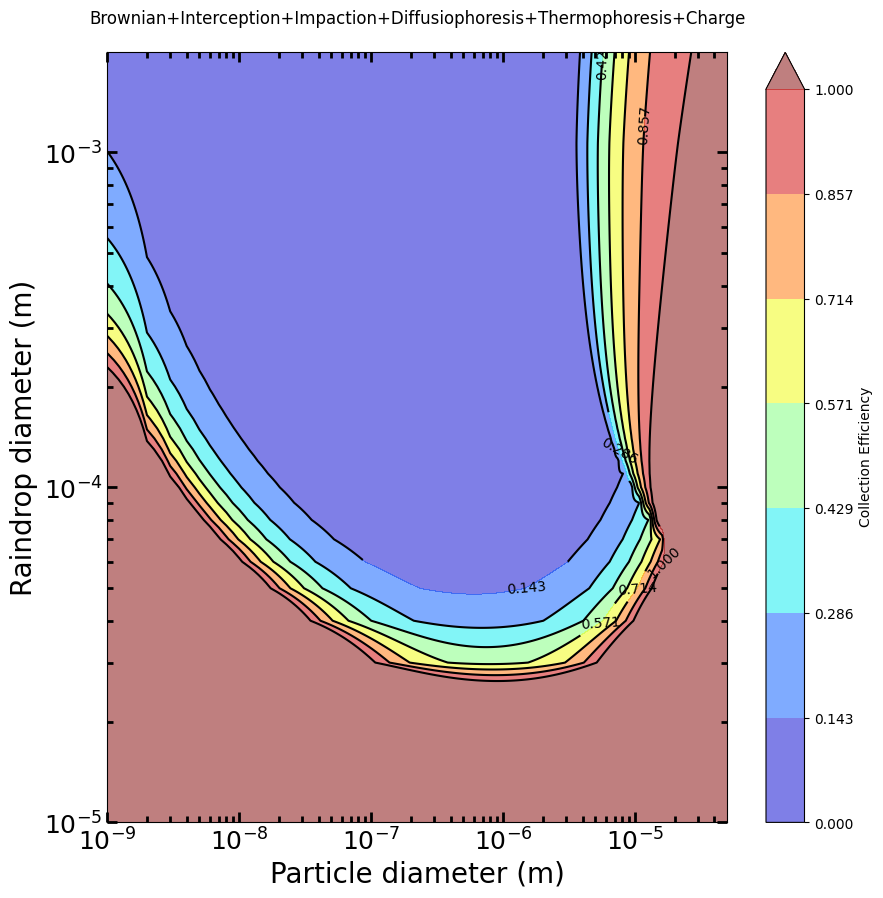

In [18]:
vmin = 0.0
vmax = 1.0
nbLines = 8

fig = plt.figure(figsize=(10,10))
X, Y = np.meshgrid(particleDiameter, raindropD)

CS = plt.contourf(X, Y, allTot, levels=np.linspace(vmin,vmax,nbLines),extend='max', alpha=0.50, cmap="jet") #plt.cm.hot)
CS2 = plt.contour(X, Y, allTot, levels=np.linspace(vmin,vmax,nbLines),extend='max', colors='black', linewidth=.25)
plt.clabel(CS2, inline=1, fontsize=10)


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Collection Efficiency')



plt.xscale('log')
plt.yscale('log')

plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel('Particle diameter (m)', fontsize=20)
plt.ylabel('Raindrop diameter (m)', fontsize=20)

plt.title('Brownian+Interception+Impaction+Diffusiophoresis+Thermophoresis+Charge\n')
plt.savefig('allSlinnPhCharge_RaindropVtrMethodsCurves.png',bbox_inches="tight",  dpi=150)

## The time-dependent removal of aerosol by BCS calculated

### Simple curves

Based on the previous litterature studies, we applied the choices made on simple computation first



Three different rain rates are tested corresponding to 
- drizzle (R = 0.5 mm h−1), 
- moderate rain (R = 2.5 mm h−1), and 
- heavy rain (R = 10 mm h−1).

(choice the same as there https://acp.copernicus.org/articles/22/11381/2022/ )

In [20]:
# Calculate and store the scavenging coefficient in pur Slinn model


### Needed Functions ---------------------------------------------------

#@nb.jit(nopython=True)
### Raindrop terminal velocity ----------------------------------------
def raindropVelocity (D_d, mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0):
    Vrt = 0.0
    T_Air_C = T_Air - 273.15 # [C] Air temperature

    ## --For raindrop diameter 0.5μm < 𝐷𝑑 < 19μm -------------------------
    if (D_d <= 19.0e-6):
        # 1-Calculate the Cunningham correction   ------------------------
        Cc = 1.0 + (2.0 * mfp_Air / D_d) * (1.257 + 0.4 * math.exp(-1.1 * D_d / (2.0 * mfp_Air)))

        # 2-Calculate the Raindrop terminal velocity ------------------------
        Vrt = D_d * D_d * (rho_W - rho_Air) * g0 * Cc / (18.0 * mu_Air)
 
    ## --For raindrop diameter 19μm < 𝐷𝑑 < 1.07mm ------------------------
    elif (D_d <= 1.07e-3):
        # 1-Calculate the Cunningham correction   ------------------------
        Cc = 1.0 + (2.0 * mfp_Air / D_d) * (1.257 + 0.4 * math.exp(-1.1 * D_d / (2.0 * mfp_Air)))

        # 2-Calculate the Reynold’s number   ------------------------
        X = math.log(4.0 * D_d * D_d * D_d * rho_Air * (rho_W - rho_Air) * g0 / (3.0 * mu_Air * mu_Air))

        Y = - 3.18657 \
            + 0.992696 * X \
            - 0.153193e-2 * X * X \
            - 0.987059e-3 * X * X * X \
            - 0.578878e-3 * X * X * X * X \
            + 0.855176e-4 * X * X * X * X * X \
            - 0.327815e-5 * X * X * X * X * X * X   

        Re = Cc * math.exp(Y)

        # 3-Calculate the Raindrop terminal velocity ------------------------
        Vrt = mu_Air * Re / (rho_Air * D_d)

    ## --For raindrop diameter 1.07mm < 𝐷𝑑 < 7mm ------------------------
    elif (D_d <= 7.0e-3):  

        # 1-Calculate the surface tension sigma; the bond number B0; and the ratio of the Davies number to the Bond number N0  ------------------------        
        sigma = 0.0
        if (T_Air_C < 0.0):
            sigma = 75.93 + 0.115  * T_Air_C \
                    + 6.818e-2 * T_Air_C * T_Air_C \
                    + 6.511e-3 * T_Air_C * T_Air_C * T_Air_C \
                    + 2.933e-4 * T_Air_C * T_Air_C * T_Air_C * T_Air_C \
                    + 6.283e-6 * T_Air_C * T_Air_C * T_Air_C * T_Air_C * T_Air_C \
                    + 5.285e-8 * T_Air_C * T_Air_C * T_Air_C * T_Air_C * T_Air_C * T_Air_C
            sigma = 0.001 * sigma
        else:
            rT = (374.0 - T_Air_C) / 647.15
            sigma = 0.2358 * (rT**1.256)
            sigma = sigma * (1 - (0.625 * rT))
            
        B0 = 4.0 * D_d * D_d * (rho_W - rho_Air) * g0  
        B0 = B0 / (3.0 * sigma)
        
        Np = sigma * sigma * sigma * rho_Air * rho_Air 
        Np = Np / (mu_Air * mu_Air * mu_Air * mu_Air * (rho_W - rho_Air) * g0 )

        # 2-Calculate the Reynold’s number   ------------------------
        X = math.log (B0 * Np**(1.0/6.0))
        
        Y = - 5.00015 \
            + 5.23778 * X \
            - 2.04914 * X * X \
            + 0.475294  * X * X * X \
            - 0.542819e-1 * X * X * X * X \
            + 0.238449e-2 * X * X * X * X * X   
        
        Re = math.exp(Y) * (Np**(1.0/6.0))
        
        # 3-Calculate the Raindrop terminal velocity ------------------------
        Vrt = mu_Air * Re / (rho_Air * D_d)
   
    return Vrt

#@nb.jit(nopython=True)
# ---- Cunningham correction factor on particle:       -----------------------------
def cunninghamCorrector (particleDiameter, meanFreePath):
    CC = 1.257 + 0.4 * np.exp(-0.55 *  (particleDiameter / meanFreePath))
    CC = 1.0 + 2.0 * CC * (meanFreePath / particleDiameter)
    return CC

#@nb.jit(nopython=True)
# ---- Raindrop Reynolds number:       -----------------------------
def raindropReynoldsNumber (raindropDiameter, meanFreePath, rho_Air, mu_Air, rho_W, T_Air, g0):
    Vtr = raindropVelocity (raindropDiameter, meanFreePath, rho_Air, mu_Air, rho_W, T_Air, g0)   
    Re = raindropDiameter * Vtr * rho_Air /(2.0 * mu_Air)
    return Re

#@nb.jit(nopython=True)
# ---- Collection Efficiency from Brownian Diffusion ------------------
def collectionEfficiencyBrownian (particleDiameter, raindropDiameter, CC, Re, mu_Air, rho_Air):
    Ddiff = kB * T_Air * CC / (3.0 * pi * mu_Air * particleDiameter)
    Sc = mu_Air / (rho_Air * Ddiff)
    sqrtRe = Re**0.5
    Ebrow = 1.0 + 0.4 * sqrtRe * (Sc**(1.0/3.0)) + 0.16* sqrtRe * (Sc**0.5)
    Ebrow = 4.0 * Ebrow / (Re * Sc)
    return Ebrow
    
#@nb.jit(nopython=True)
# ---- Collection Efficiency from Interception ------------------
def collectionEfficiencyInterception (particleDiameter, raindropDiameter, Re, mu_Air, mu_W):
    EInt = 1.0 + 2.0 * Re**0.5
    EInt = (mu_Air / mu_W) + (EInt * particleDiameter / raindropDiameter) 
    EInt = 4.0 * EInt * particleDiameter / raindropDiameter
    return EInt

#@nb.jit(nopython=True)
# ---- Collection Efficiency from Interception ------------------
# rho_p is the density of the particle
def collectionEfficiencyImpaction (rho_p, particleDiameter, raindropDiameter, CC,  Re, Vtr, Vtp, mu_Air, rho_Air):
    lnRe = math.log(1.0 + Re)

    St2 = 1.2 + (1.0/12.0) * lnRe 
    St2 = St2 / lnRe
    
    tau = 0.0
    tau = (rho_p - rho_Air) * particleDiameter * particleDiameter * CC
    tau = tau / (18.0 * mu_Air)

    St = 0.0
    St = 2.0 * tau * (Vtr - Vtp) / raindropDiameter

    EImp = 0.0   
    if (St > St2):
        EImp = ((St - St2) / (St - St2 + (2.0/3.0)))**(3.0/2.0)  
    
    #print('------------ \n ',EImp, St, St2)
    return EImp

#@nb.jit(nopython=True)
# ---- Collection Efficiency from Diffusiophoresis ------------------
def collectionEfficiencyDiffusiophoresis (P_Air, T_Air, RH, Re, raindropDiameter, Vtr, mu_Air, rho_Air):
    T0 = 273.15 # [K]
    P0 = 101325.0 # [Pa]   
    
    T_Air_C = T_Air - 273.15
    # Surface temperature of raindrops Ts, assumption from Wang et al. (2010)
    Ts = T_Air_C - 3.0    
    
    ka = 418.4e-5 * (1.04645 + (0.017 * T_Air)) # Air thermal conductivity from Pruppacher and Klett (2010)   
    
    Ddiffwater = 0.211e-4 * (P0 / P_Air) * (T_Air / T0)**1.94  # from Pruppacher and Klett (2010)

    beta_dph = (T_Air * Ddiffwater / P_Air) * (Mw / Ma)**0.5
    
    Scw = mu_Air / (rho_Air * Ddiffwater)
    
    # We use the saturation vapour pressure formula from Seinfeld and Pandis (1998)
    # Caution: temperature is in Celsius degrees. p0 are in Pa   
    a0 = 6.107799961
    a1 = 4.436518521e-1
    a2 = 1.428945805e-2
    a3 = 2.650648471e-4
    a4 = 3.031240396e-6
    a5 = 2.034080948e-8
    a6 = 6.136820929e-11
    
    T = Ts #(T must be in Celsius here)
    p0s = 100.0 * (a0 + a1 * T + \
                   a2 * T * T + \
                   a3 * T * T * T + \
                   a4 * T * T * T * T + \
                   a5 * T * T * T * T * T + \
                   a6 * T * T * T * T * T * T )
    
    T = T_Air_C #(T must be in Celsius here)
    p0_Air = 100.0 * (a0 + a1 * T + \
                      a2 * T * T + \
                      a3 * T * T * T + \
                      a4 * T * T * T * T + \
                      a5 * T * T * T * T * T + \
                      a6 * T * T * T * T * T * T )


    EDiff = 4.0 * beta_dph * \
            (2.0 + 0.6 * (Re**0.5) * (Scw**(1.0/3.0))) * \
            ((p0s / (Ts+273.15)) - (p0_Air * RH / (T_Air ))) / \
            (raindropDiameter * Vtr) 

    return EDiff

#@nb.jit(nopython=True)
# ---- Collection Efficiency from Thermophoresis ------------------
def collectionEfficiencyThermophoresis (T_Air, P_Air, kp, particleDiameter, raindropDiameter, CC, Re, Vtr, mu_Air, mfp_Air):
    Cp_Air = 1003.5 #Specific heat capacity of air  (J kg-1 K-1) 
    
    T_Air_C = T_Air - 273.15
    # Surface temperature of raindrops Ts, assumption from Wang et al. (2010)
    Ts = T_Air_C - 3.0    
    
    ka = 418.4e-5 * (1.04645 + (0.017 * T_Air)) # Air thermal conductivity from Pruppacher and Klett (2010)   
    
    Pr = Cp_Air * mu_Air / ka
    
    ld = mfp_Air / raindropDiameter
    
    alpha_th = 2.0 * ka * CC * (ka + (5.0 * ld / kp)) / \
               (5.0 * P_Air * (1.0 + (6.0 * ld)) * ((2.0 * ka) + kp + (10.0 * ld / kp)))
       
    ETh = 4.0 * alpha_th * \
          (2.0 + 0.6 * (Re**0.5) * (Pr**(1.0/3.0)))*(T_Air_C - Ts)/ \
          (raindropDiameter * Vtr)   
    return ETh

#@nb.jit(nopython=True)
# ---- Collection Efficiency from Charge ------------------
def collectionEfficiencyCharge (alpha, particleDiameter, raindropDiameter, CC, Vtr, mu_Air):
    K = 9.0e9     # N.m2.C-2
    a = 0.83e-6 
    
    Qd = a * alpha * raindropDiameter * raindropDiameter
    
    qp = a * alpha * particleDiameter * particleDiameter
    
    ECh = 16.0 * K * Qd * qp * CC / \
          (3.0 * pi * mu_Air * Vtr * raindropDiameter * raindropDiameter * particleDiameter)   
    return ECh



#@nb.jit(nopython=True)
# ---- Total Collection Efficiency SlinnPhiCharge ------------------
# P_Air [Pa] Air pressure
# T_Air [K] Air temperature
def collectionEfficiency_SlinnPhiCharge (raindropDiameter, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air):

    # Constants input (need in def for numba)
    Ra = 287.05 # [J kg-1 K-1] specific gas constant.
    T_Air_C = T_Air - 273.15 # [C] Air temperature   
    Cp_Air = 1003.5 #Specific heat capacity of air  (J kg-1 K-1) 

    # Constante for air viscosity calculation
    S_Air = 120 # [K]
    T0_Air = 296.16 # [K]
    mu0_Air = 1.83e-5 #[kg.m-1.s-1]
    
    
    # ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
    # Density of air [kg.m-3],
    rho_Air = P_Air / (Ra * T_Air) # [kg.m-3], density of air 
    
    # Dynamic viscosity of the air [kg.m-1.s−1]=[Pa.s]
    mu_Air = mu0_Air * ((T0_Air + S_Air) / (T_Air + S_Air)) * pow((T_Air / T0_Air), (3.0 / 2.0))
    
    # Dynamic viscosity of the water [kg.m-1.s−1]=[Pa.s]
    mu_W = A_W * 10.0 ** (B_W/(T_Air - C_W))
    
    # Mean speed of air molecules [m.s-1]
    v_Air = pow(((8.0 * kB * T_Air) / (m_Air * math.pi)), 0.5)
    
    # Mean free path of air molecules, on dry air [m]
    mfp_Air = (2.0 * mu_Air) / (rho_Air * v_Air)    
    
    
    CC = cunninghamCorrector (particleDiameter, mfp_Air)
    
    allTot = np.zeros((len(particleDiameter), len(raindropDiameter)))

    #alltestBr = np.zeros((len(particleDiameter), len(raindropDiameter)))
    #alltestInt = np.zeros((len(particleDiameter), len(raindropDiameter)))
    #alltestIm = np.zeros((len(particleDiameter), len(raindropDiameter)))

    
    allEBr = np.zeros(len(particleDiameter))
    allInt = np.zeros(len(particleDiameter))
    
    for i in range(0, len(raindropDiameter)):
        Re = raindropReynoldsNumber (raindropDiameter[i], mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)
        print(Re, raindropDiameter[i])
        Vr = raindropVelocity (raindropDiameter[i], mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)  
        
        allEBr = collectionEfficiencyBrownian (particleDiameter, raindropDiameter[i], CC, Re, mu_Air, rho_Air)
        allInt = collectionEfficiencyInterception (particleDiameter, raindropDiameter[i], Re, mu_Air, mu_W)
        
        allImp = np.zeros(len(particleDiameter))
        allDiff = np.zeros(len(particleDiameter))

        for j in range(0, len(particleDiameter)):
            Vp = raindropVelocity (particleDiameter[j], mfp_Air, rho_Air, mu_Air, rho_W, T_Air, g0)

            allImp[j] = collectionEfficiencyImpaction (rhoParticle, particleDiameter[j], raindropDiameter[i], CC[j], Re, Vr, Vp, mu_Air, rho_Air)
            allDiff[j] = collectionEfficiencyDiffusiophoresis (P_Air, T_Air, RH, Re, raindropDiameter[i], Vr, mu_Air, rho_Air)    
        
        allTh = collectionEfficiencyThermophoresis(T_Air, P_Air, kpParticle, particleDiameter, raindropDiameter[i], CC, Re, Vr, mu_Air, mfp_Air)
        allCh = collectionEfficiencyCharge(alpha, particleDiameter, raindropDiameter[i], CC, Vr, mu_Air)
        
        allTot[:,i] = (allEBr + allInt + allImp + allDiff + allTh + allCh)  
       # alltestBr[:,i] = allEBr
       # alltestInt[:,i] = allInt   
       # alltestIm[:,i] = allImp

    return allTot

   # return [allTot,alltestBr, alltestInt, alltestIm]
    




#@nb.jit(nopython=True)
def rainDropSize (Rain_Int):  
    '''
    DESCRIPTION: 
        Uniform diameter of raindrop calculated, in meter, with Rain_Int in m.s−1
          
    INPUT PARAMETERS: 
        Rain_Int : rain intensity [m.s−1], np.array
        
    LITERATURE:     
         XXXXX (Jennings SG (1988) The mean free path in air. Journal of Aerosol Science 19:159–166. ?)           

    REVISIONS:
    | Nb | Date (dd/mm/year) | Author         |  What
    -----------------------------------------------------------------
    | 0  | 11/04/2021        | Marianne Seijo | Created the function 
    '''         
    Rain_Int_mm_by_h = Rain_Int *3600.0 /10.0**-3
    return (0.97e-3 * (Rain_Int**0.158) )


    
#@nb.jit(nopython=True)
def scavenging_Calculation (Eeff, Rain_Int, Dp):  
    '''
    DESCRIPTION: 
        Calculate the below cloud scavenging  
        
    
    INPUT PARAMETERS: 
        Eeff : the collection efficiency, np.array
        Rain_Int  :   rain intensity [m.s−1], np.array
        Dp : Diameter of the particles [m], np.array

        
    LITERATURE:     
         Jennings SG (1988) The mean free path in air. Journal of Aerosol Science 19:159–166.    

    REVISIONS:
    | Nb | Date (dd/mm/year) | Author         |  What
    -----------------------------------------------------------------
    | 0  | 11/04/2022        | Marianne Seijo | Created the function 
    '''         
    Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp
    return np.transpose(Scavenging)  




#@nb.jit(nopython=True)
#first order reaction
def WetSettling_ODE (C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

    

In [21]:
import numpy as np

#### Rain Intensity
# Three different rain rates are tested corresponding to 
# drizzle (R = 0.5 mm h−1), moderate rain (R = 2.5 mm h−1), 
# and heavy rain (R = 10 mm h−1)

Rain_Int = np.array([0.5, 2.5, 8.0, 10.0]) #mm h−1

# Uniform diameter of raindrop calculated, in meter, with Rain_Int in mm h−1
Dp = 0.97e-3 * (Rain_Int**0.158) 
print(Dp/2)

[0.00043469 0.00056055 0.00067364 0.00069782]


[0.00086938 0.0011211  0.00139563]
97.93912498599076 0.0008693786985823227
157.77398013467536 0.0011211049126418119
229.94200558419573 0.0013956346209081701


Text(0.5, 1.0, 'Drizzle Scavenging coefficients as a function of aerosol diameter')

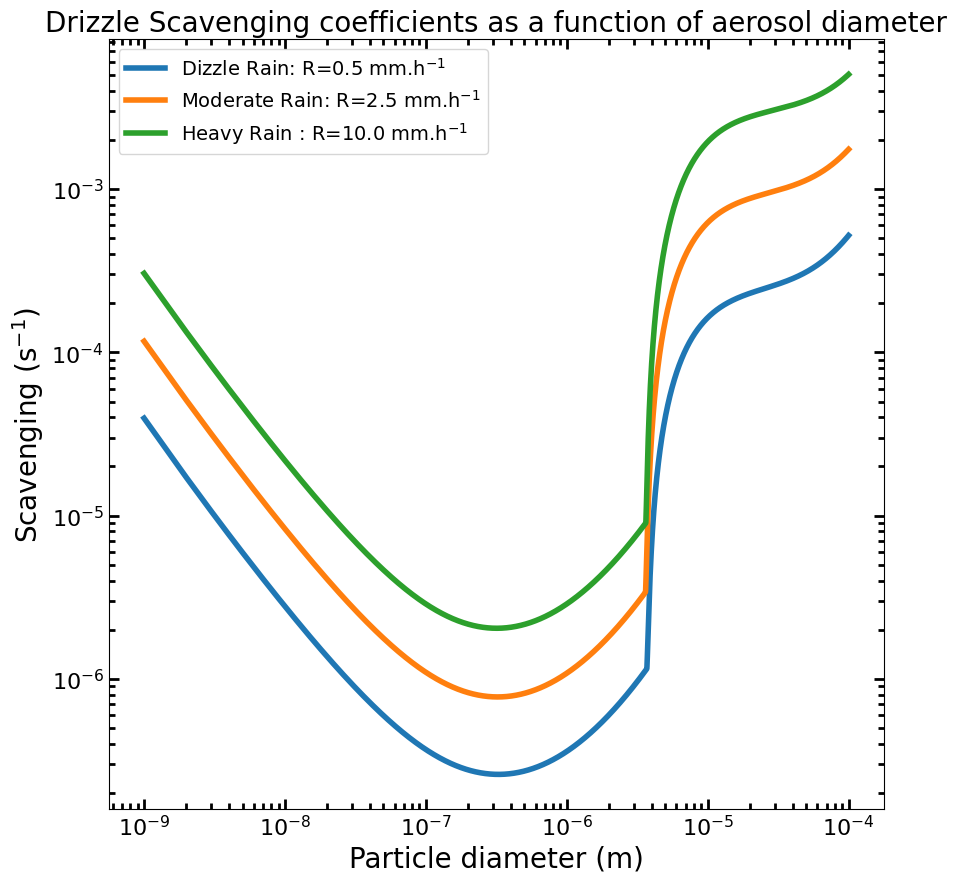

In [22]:
#### Rain Intensity
# Three different rain rates are tested corresponding to 
# drizzle (R = 0.5 mm h−1), moderate rain (R = 2.5 mm h−1), 
# and heavy rain (R = 10 mm h−1)

Rain_Int = np.array([0.5, 2.5, 10.0]) #mm h−1

# Uniform diameter of raindrop calculated, in meter, with Rain_Int in mm h−1
Dp = 0.97e-3 * (Rain_Int**0.158) 
              

Rain_Int = Rain_Int *10.0**-3/3600.0 #m s−1

print(Dp)



# Computation

# Choose of parameters: 
P_Air = 1000.0 * 100.0 #[Pa]
T_Air = 25.0 + 273.15 #[K]
RH = 0.8 
particleDiameter = np.arange(1.0e-9, 1.0e-4, 1.0e-9)
rhoParticle = rhoHDPE
kpParticle = kpHDPE
alpha = 2.0


#Dp=np.array([1e-6, 1e-4, 1e-3])
Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)



# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp


Scavenging = np.transpose(Scavenging)

#----- Size effects -------------------------------
fig = plt.figure(figsize=(10,10))

#plt.plot(particleDiameter,Scavenging[0][:,0],label='Dizzle Rain  ')

plt.plot(particleDiameter,Scavenging[0,:],label='Dizzle Rain: R=0.5 mm.h$^{-1}$', linewidth=4)
plt.plot(particleDiameter,Scavenging[1,:],label='Moderate Rain: R=2.5 mm.h$^{-1}$', linewidth=4)
plt.plot(particleDiameter,Scavenging[2,:],label='Heavy Rain : R=10.0 mm.h$^{-1}$', linewidth=4)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

plt.xlabel('Particle diameter (m)', fontsize=20)
plt.ylabel('Scavenging (s$^{-1}$)', fontsize=20)
plt.legend(loc='upper left', prop={'size': 14})
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Drizzle Scavenging coefficients as a function of aerosol diameter", fontsize=20)


### Usefull: convertion air pressures - altitude_m <a class="anchor" id="5.ConvertionAirePressureAltitude"></a>

In [23]:
#from https://en.wikipedia.org/wiki/Pressure_altitude

# Convert a air pressure (hPa) to altitude (meter)
def airPressureToAltitude(pressure_hPa):
    altitude_m = 44307.694 * (1.0 - (pressure_hPa / 1013.25)**(1.0/5.25530))
    return altitude_m


# Convert an altitude (meter) to air pressure (hPa)
def altitudeToAirPressure(altitude_m):
    pressure_hPa = 1013.25 * (1.0 - (altitude_m / 44307.694))**5.25530
    return pressure_hPa


print(altitudeToAirPressure(1000.0))
print(airPressureToAltitude(954.6))


898.7007513012068
499.8675062184084


[0.0007792  0.00086938 0.00097    0.00108227 0.0011211  0.00120753
 0.00128742 0.00134729 0.00139563]
73.73079780508351 0.0007791951768543228
91.53794080160107 0.0008693786985823227
113.20972159266888 0.00097
138.82228000746193 0.0010822671426552152
147.80056898508332 0.0011211049126418119
168.32322375700835 0.0012075280083207053
187.97921534192926 0.0012874181627891361
203.14640621924838 0.0013472864816921571
215.6687919920619 0.0013956346209081701
[[0.69847679 0.69689734 0.69440264 0.68972008 0.68742429 0.6820731
  0.67700057 0.67319379 0.67013808]
 [0.00361197 0.00321723 0.00287386 0.00258097 0.00249767 0.00233406
  0.0022043  0.00211791 0.00205386]
 [0.00187489 0.0016607  0.00147675 0.00132236 0.00127908 0.00119451
  0.0011278  0.00108353 0.00105078]
 [0.00228329 0.00200672 0.00177127 0.00157439 0.00151907 0.00141118
  0.0013263  0.0012701  0.0012286 ]]
Scavenging:  [[9.33758337e-05 4.82865724e-07 2.50645058e-07 3.05241723e-07]
 [1.67000809e-04 7.70959711e-07 3.97960698e-07 4.80880

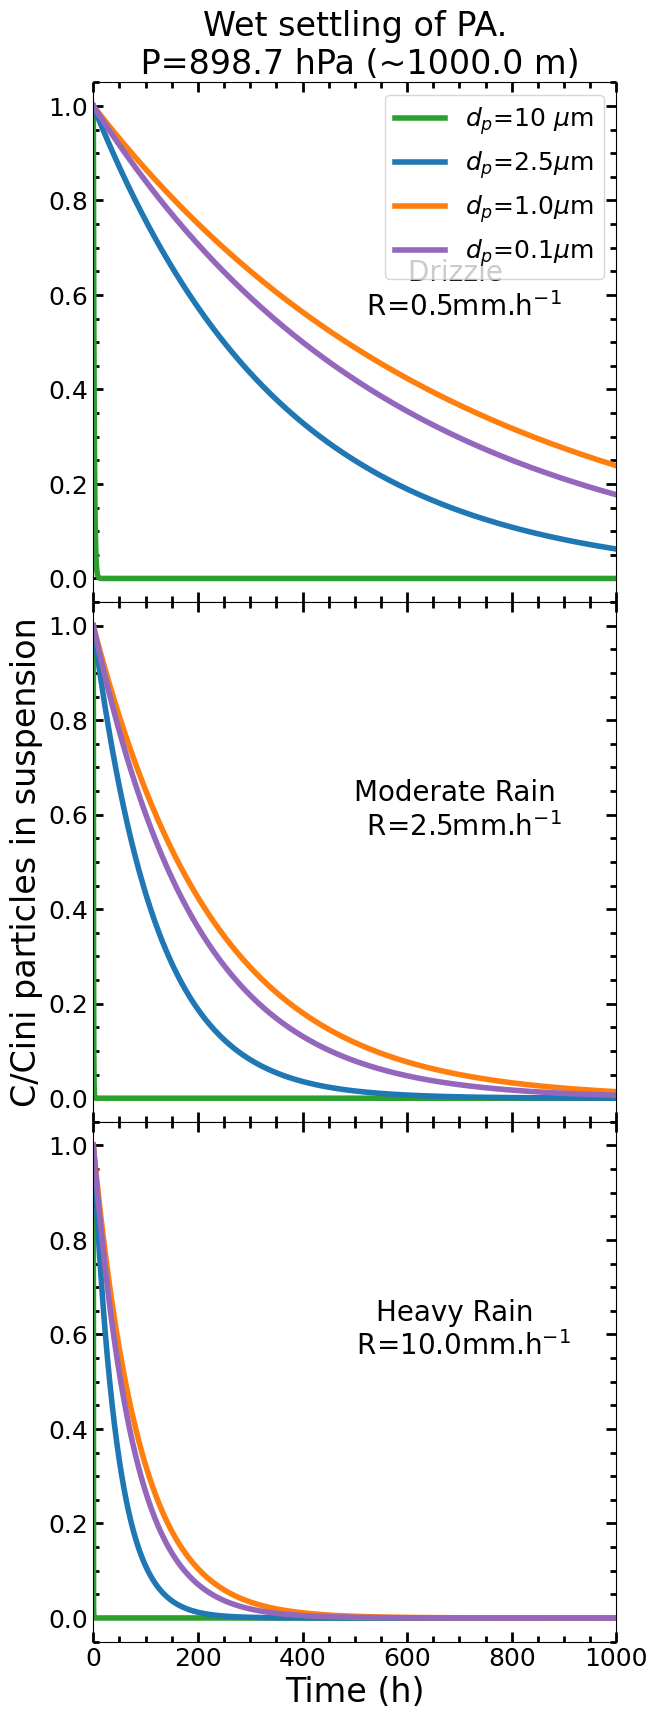

In [44]:
from matplotlib import gridspec
from scipy.integrate import odeint


# Rain Intensity
# Three different rain rates are tested corresponding to 
# drizzle (R = 0.5 mm h−1), moderate rain (R = 2.5 mm h−1), 
# and heavy rain (R = 10 mm h−1)

Rain_Int_mmh = np.array([0.25, 0.5, 1.0, 2.0, 2.5, 4.0, 6.0, 8.0, 10.0]) #mm h−1

Dp = 0.97e-3 * (Rain_Int_mmh**0.158) # Uniform diameter of raindrop calculated needed to express Rain_Int in mm.h-1

print(Dp)

Rain_Int = Rain_Int_mmh *10.0**-3/3600.0 #m s−1


# Particles diameter
dPM10 = 10.0e-6 # [m] Diameter of PM10... 10 :p
dPM2_5 = 2.5e-6 # [m] Diameter of PM2_5
dPM1  =  1.0e-6 # [m] Diameter of PM1
dPM0_1  =  0.1e-6 # [m] Diameter of PM1



# Plastics properties

## Density
#https://omnexus.specialchem.com/polymer-properties/properties/density
rhoPVC = 1580.0 # [kg.m-3], density of PolyVinyl Chloride  (PVC) 
rhoPA  = 1000.0 # [kg.m-3], density of PA
rhoLDPE = 920.0 # [kg.m-3], density of Low Density PolyEthylene (LDPE)
rhoHDPE = 980.0 # [kg.m-3], density of High Density PolyEthylene (HDPE)

## Thermal Conductivity
#From https://cdn.intechopen.com/pdfs/35438/intech-thermal_conductivity_of_nanoparticles_filled_polymers.pdf
kpPVC = 0.19 #(W/m K), Thermal Conductivity at 25°C of PolyVinyl Chloride  (PVC)
kpPA = 0.25 #(W/m K), Thermal Conductivity at 25°C of PA
kpLDPE = 0.30 #(W/m K), Thermal Conductivity at 25°C of Low Density PolyEthylene (LDPE)
kpHDPE = 0.44 #(W/m K), Thermal Conductivity at 25°C of High Density PolyEthylene (HDPE)




# Computation
#------------ HDPE 100 m heigth, 1000 hPa ---------------------------------------

# Choose of parameters: 
P_Air =  898.7 * 100.0 #[Pa] 1000 m heigth, 898.7 hPa
height = 1000.0

#P_Air =  954.6 * 100.0 #[Pa]  500 m heigth, 954.6 hPa
#height = 500

#P_Air = 1001.3 * 100.0 #[Pa]  100 m heigth, 1001.3 hPa
#height = 100

#P_Air = 1012.0 * 100.0 #[Pa]    10 m heigth, 1012.0 hPa
#height = 10








In [66]:
# Used to automatically draw Figure7 parts 
def plotRainIntensitySizeEffect (particleName, Rain_Int_mmh, residenceTimeCdPM10, residenceTimeCdPM2_5, residenceTimeCdPM1, residenceTimeCdPM0_1, legend=True):
    fig = plt.figure(figsize=(10,10))

    #plt.plot(particleDiameter,Scavenging[0][:,0],label='Dizzle Rain  ')
    #plt.fill_between(0, [-10,100], 0.5, color='deepskyblue',  alpha=0.05)
    plt.fill_between([0, 0.5], -10, 100, color='deepskyblue', alpha=0.05)
    plt.fill_between([0.5,4.0],-10, 100, color='deepskyblue', alpha=0.1)
    plt.fill_between([4.0, 8.0], -10, 100, color='deepskyblue', alpha=0.2)
    plt.fill_between([8.0, 40.0], -10, 100, color='deepskyblue', alpha=0.3)


    plt.plot([8.0, 8.0],[-10,100],':', linewidth=2,color='k')
    plt.plot([4.0, 4.0],[-10,100],':', linewidth=2,color='k')
    plt.plot([0.5, 0.5],[-10,100],':', linewidth=2,color='k')


    plt.plot(Rain_Int_mmh, residenceTimeCdPM10, '.-',markersize=18, linewidth=5, label='$d_p$=10 $\mu$m',color='tab:green')
    plt.plot(Rain_Int_mmh, residenceTimeCdPM2_5, '.-',markersize=18,linewidth=5, label='$d_p$=2.5$\mu$m',color='tab:blue')
    plt.plot(Rain_Int_mmh, residenceTimeCdPM1, '.-',markersize=18,linewidth=5, label='$d_p$=1.0$\mu$m', color='tab:orange')
    plt.plot(Rain_Int_mmh, residenceTimeCdPM0_1, '.-',markersize=18,linewidth=5, label='$d_p$=0.1$\mu$m',color='tab:purple')



    #plt.ylabel('Residence Time (h) for '+str(100*(1-limit/Cini))+' % deposition' , fontsize=20)
    plt.xlabel('Rain Intensity (mm.$h^{-1}$)', fontsize=20)
    if (legend):
        plt.legend(loc='center right', prop={'size': 24})
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim([-2.0,max(residenceTimeCdPM1)])
    plt.xlim([0,10.1])
    plt.ylim([-0.9,40.0])


    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.title(particleName+" P="+str(P_Air/100)+' hPa (~'+str(height)+' m)', fontsize=24)

    if days:
        #plt.xlabel('Residence Time (days) for '+str(100*(1-limit/Cini))+' % deposition' , fontsize=20)
        plt.ylabel('Half-life (days)' , fontsize=20)

        plt.title(particleName+"\n P="+str(P_Air/100)+'hPa (~'+str(height)+' m)', fontsize=24)

    plt.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    plt.tick_params(which='major', length=7)
    plt.tick_params(which='minor', length=4)

    #plt.text(2, 30, ''+particleName, rotation='horizontal', fontsize=24)  # Position: (0.04, 0.5)


    plt.savefig('WetSettling_ResidenceTime_RainIntensity_'+particleName+'_'+str(100*(1-limit/Cini))+'.png', bbox_inches="tight", dpi=600)


## HDPE

73.73079780508351 0.0007791951768543228
91.53794080160107 0.0008693786985823227
113.20972159266888 0.00097
138.82228000746193 0.0010822671426552152
147.80056898508332 0.0011211049126418119
168.32322375700835 0.0012075280083207053
187.97921534192926 0.0012874181627891361
203.14640621924838 0.0013472864816921571
215.6687919920619 0.0013956346209081701
[[0.69286096 0.69133592 0.68887431 0.68418833 0.68187983 0.67649402
  0.67138489 0.66754921 0.66446969]
 [0.00347608 0.00310012 0.00277237 0.0024923  0.00241256 0.00225583
  0.00213144 0.00204856 0.00198709]
 [0.00172473 0.0015313  0.00136461 0.00122438 0.00118503 0.00110807
  0.00104729 0.0010069  0.000977  ]
 [0.00188291 0.00166169 0.00147226 0.00131312 0.0012683  0.00118071
  0.00111162 0.00106577 0.00103186]]
Scavenging:  [[9.26250820e-05 4.64699078e-07 2.30570900e-07 2.51716222e-07]
 [1.65668099e-04 7.42897239e-07 3.66951644e-07 3.98198257e-07]
 [2.95908208e-04 1.19088094e-06 5.86170712e-07 6.32412172e-07]
 [5.26817198e-04 1.91904036e-

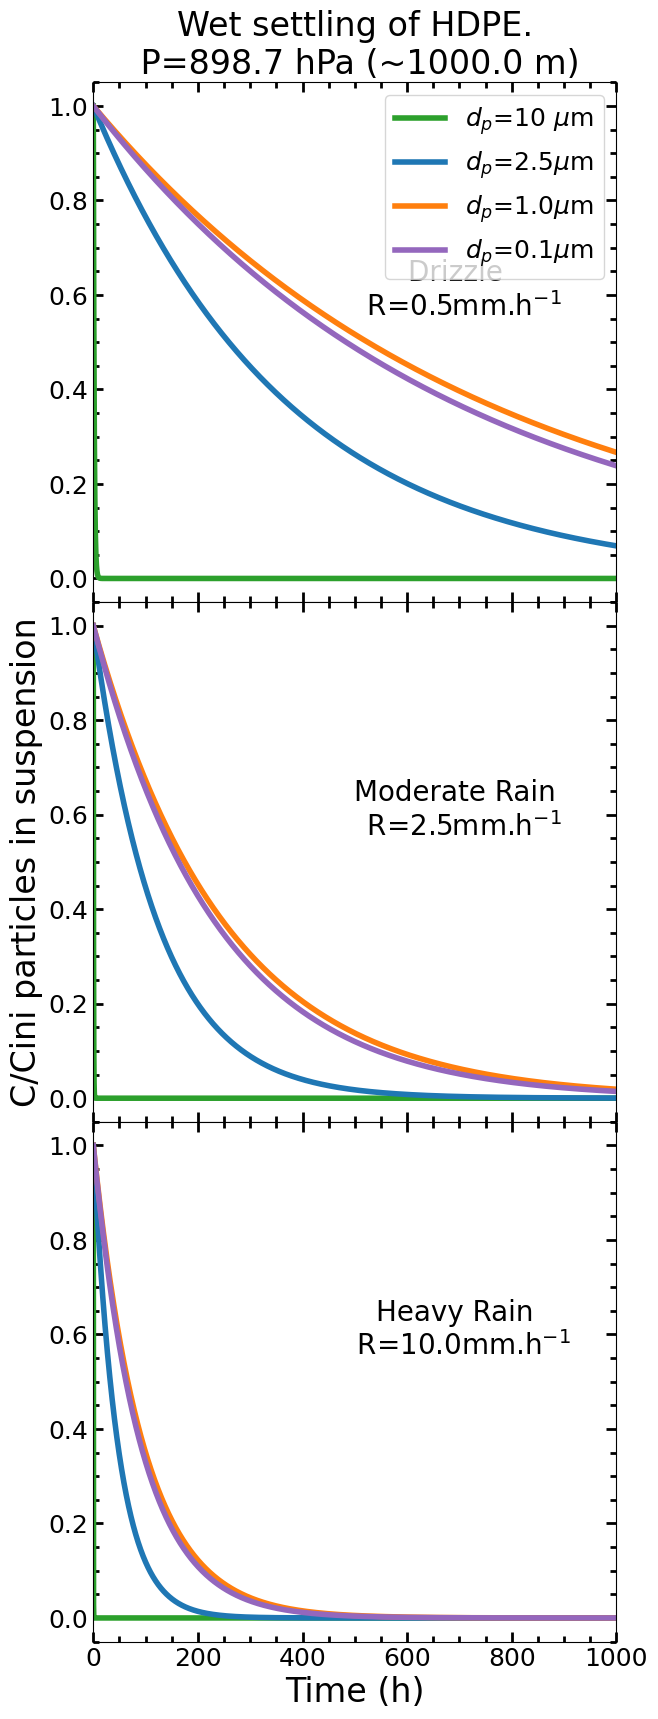

In [73]:
T_Air = 25.0 + 273.15 #[K]
RH = 0.8 
particleDiameter=np.array([dPM10, dPM2_5, dPM1, dPM0_1])
particleName = 'HDPE'
rhoParticle = rhoHDPE
kpParticle = kpHDPE
alpha = 2.0

Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)


print (Eeff)

# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp

Scavenging = np.transpose(Scavenging)
print('Scavenging: ', Scavenging)




#first order reaction
def WetSettling(C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

Cini = 15.0
C0 = [Cini, Cini, Cini, Cini] 
t = np.arange(0.0, 20000.0*3600.0, 3600.0*0.25) # [s] arrange for values of delta t, linspace for a number linspace ;) 

print(Scavenging[0,3])


CdPM10_RI0_25 = odeint(WetSettling,C0[0],t, args=(Scavenging[0,0],))
CdPM2_5_RI0_25 = odeint(WetSettling,C0[1],t, args=(Scavenging[0,1],))
CdPM1_RI0_25 = odeint(WetSettling,C0[2],t, args=(Scavenging[0,2],))
CdPM0_1_RI0_25 = odeint(WetSettling,C0[3],t, args=(Scavenging[0,3],))

CdPM10_drizzle = odeint(WetSettling,C0[0],t, args=(Scavenging[1,0],))
CdPM2_5_drizzle = odeint(WetSettling,C0[1],t, args=(Scavenging[1,1],))
CdPM1_drizzle = odeint(WetSettling,C0[2],t, args=(Scavenging[1,2],))
CdPM0_1_drizzle = odeint(WetSettling,C0[3],t, args=(Scavenging[1,3],))

CdPM10_RI1 = odeint(WetSettling,C0[0],t, args=(Scavenging[2,0],))
CdPM2_5_RI1 = odeint(WetSettling,C0[1],t, args=(Scavenging[2,1],))
CdPM1_RI1 = odeint(WetSettling,C0[2],t, args=(Scavenging[2,2],))
CdPM0_1_RI1 = odeint(WetSettling,C0[3],t, args=(Scavenging[2,3],))


CdPM10_RI2 = odeint(WetSettling,C0[0],t, args=(Scavenging[3,0],))
CdPM2_5_RI2 = odeint(WetSettling,C0[1],t, args=(Scavenging[3,1],))
CdPM1_RI2 = odeint(WetSettling,C0[2],t, args=(Scavenging[3,2],))
CdPM0_1_RI2 = odeint(WetSettling,C0[3],t, args=(Scavenging[3,3],))


CdPM10_moderate = odeint(WetSettling,C0[0],t, args=(Scavenging[4,0],))
CdPM2_5_moderate = odeint(WetSettling,C0[1],t, args=(Scavenging[4,1],))
CdPM1_moderate = odeint(WetSettling,C0[2],t, args=(Scavenging[4,2],))
CdPM0_1_moderate = odeint(WetSettling,C0[3],t, args=(Scavenging[4,3],))

CdPM10_RI4 = odeint(WetSettling,C0[0],t, args=(Scavenging[5,0],))
CdPM2_5_RI4 = odeint(WetSettling,C0[1],t, args=(Scavenging[5,1],))
CdPM1_RI4 = odeint(WetSettling,C0[2],t, args=(Scavenging[5,2],))
CdPM0_1_RI4 = odeint(WetSettling,C0[3],t, args=(Scavenging[5,3],))

CdPM10_RI6 = odeint(WetSettling,C0[0],t, args=(Scavenging[6,0],))
CdPM2_5_RI6 = odeint(WetSettling,C0[1],t, args=(Scavenging[6,1],))
CdPM1_RI6 = odeint(WetSettling,C0[2],t, args=(Scavenging[6,2],))
CdPM0_1_RI6 = odeint(WetSettling,C0[3],t, args=(Scavenging[6,3],))

CdPM10_RI8 = odeint(WetSettling,C0[0],t, args=(Scavenging[7,0],))
CdPM2_5_RI8 = odeint(WetSettling,C0[1],t, args=(Scavenging[7,1],))
CdPM1_RI8 = odeint(WetSettling,C0[2],t, args=(Scavenging[7,2],))
CdPM0_1_RI8 = odeint(WetSettling,C0[3],t, args=(Scavenging[7,3],))

CdPM10_heavy = odeint(WetSettling,C0[0],t, args=(Scavenging[8,0],))
CdPM2_5_heavy = odeint(WetSettling,C0[1],t, args=(Scavenging[8,1],))
CdPM1_heavy = odeint(WetSettling,C0[2],t, args=(Scavenging[8,2],))
CdPM0_1_heavy = odeint(WetSettling,C0[3],t, args=(Scavenging[8,3],))




#print(CdPM10_drizzle)
## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots




#----- Size effects -------------------------------
def PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzlet, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    title, pictureName):
    fig, (figDrizzle, figModerate, figHeavy) = plt.subplots(3, 1, figsize=(6.75, 20.25), sharex=True, sharey=True)

    figDrizzle.set_title(title,fontsize=24)

    figDrizzle.plot(th,CdPM10_drizzle/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figDrizzle.plot(th,CdPM2_5_drizzle/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figDrizzle.plot(th,CdPM1_drizzle/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figDrizzle.plot(th,CdPM0_1_drizzle/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')

    figDrizzle.legend(loc="upper right", fontsize=18 )

    figDrizzle.set_xlim([0,1000])
    figDrizzle.tick_params(top=True, right=True, which='both', direction='in',width=2,labelsize=18 )
    figDrizzle.tick_params(which='major', length=7)
    figDrizzle.tick_params(which='minor', length=4)
    figDrizzle.text(0.7, 0.6, "Drizzle \n R=0.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figDrizzle.transAxes, fontsize=20)

    figModerate.plot(th,CdPM10_moderate/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figModerate.plot(th,CdPM2_5_moderate/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figModerate.plot(th,CdPM1_moderate/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figModerate.plot(th,CdPM0_1_moderate/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')


    figModerate.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figModerate.tick_params(which='major', length=7)
    figModerate.tick_params(which='minor', length=4)
    figModerate.text(0.7, 0.6, "Moderate Rain \n R=2.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figModerate.transAxes, fontsize=20)

    figHeavy.plot(th,CdPM10_heavy/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figHeavy.plot(th,CdPM2_5_heavy/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figHeavy.plot(th,CdPM1_heavy/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figHeavy.plot(th,CdPM0_1_heavy/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')    
    
    
    figHeavy.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figHeavy.tick_params(which='major', length=7)
    figHeavy.tick_params(which='minor', length=4)
    figHeavy.text(0.7, 0.6, "Heavy Rain \n R=10.0mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figHeavy.transAxes, fontsize=20)

    figModerate.set_ylabel('C/Cini particles in suspension' , fontsize=24)
    figHeavy.set_xlabel('Time (h)' , fontsize=24)


    #plt.setp(figModerate.get_xticklabels(), visible=True)

    fig.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

    figDrizzle.minorticks_on()


    plt.savefig(pictureName, dpi=150)
    
    
PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzle, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    'Wet settling of '+particleName+'.\n P='+str(P_Air/100)+' hPa (~'+str(height)+' m)', 
                    'WetSettling_SizeEffects_RainIntensity_'+particleName+'_'+str(height)+'m.png')
    



[0.09375    0.05208333 0.03125    0.02083333 0.02083333 0.01041667
 0.01041667 0.01041667 0.01041667]
[17.27083333 10.80208333  6.73958333  4.1875      3.58333333  2.58333333
  1.94791667  1.58333333  1.35416667]
[34.80208333 21.86458333 13.6875      8.51041667  7.29166667  5.25
  3.94791667  3.22916667  2.76041667]
[31.875      20.15625    12.6875      7.9375      6.8125      4.92708333
  3.71875     3.05208333  2.61458333]
[ 0.25  0.5   1.    2.    2.5   4.    6.    8.   10.  ]


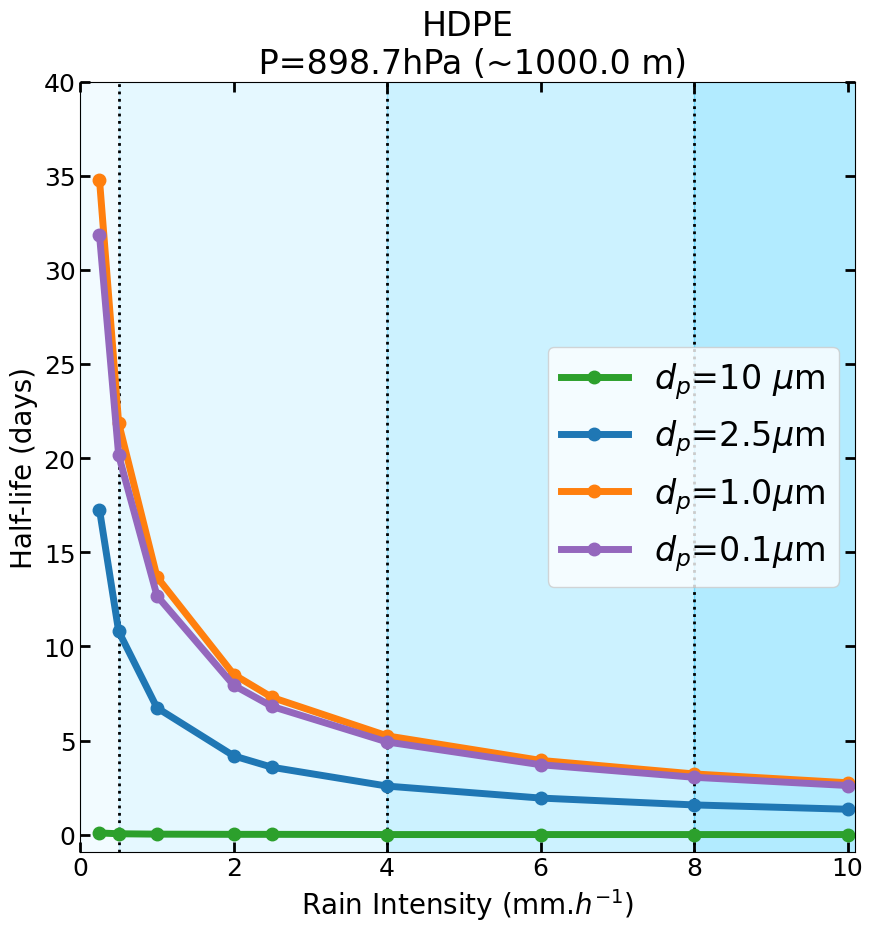

In [74]:
import numpy as np

limit = 0.5*Cini
days = True

residenceTimeCdPM10 = np.array([])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI0_25 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_drizzle <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI1 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI2 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_moderate <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI4 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI6 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI8 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_heavy <= limit)])
if days:
    residenceTimeCdPM10 = residenceTimeCdPM10 /24.0
print(residenceTimeCdPM10)


residenceTimeCdPM2_5 = np.array([])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI0_25 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_drizzle <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI1 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI2 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_moderate <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI4 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI6 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI8 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_heavy <= limit)])
if days:
    residenceTimeCdPM2_5 = residenceTimeCdPM2_5 /24.0
print(residenceTimeCdPM2_5)



residenceTimeCdPM1 = np.array([])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI0_25 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_drizzle <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI1 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI2 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_moderate <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI4 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI6 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI8 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_heavy <= limit)])
if days:
    residenceTimeCdPM1 = residenceTimeCdPM1 /24.0
print(residenceTimeCdPM1)

residenceTimeCdPM0_1 = np.array([])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI0_25 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_drizzle <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI1 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI2 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_moderate <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI4 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI6 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI8 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_heavy <= limit)])
if days:
    residenceTimeCdPM0_1 = residenceTimeCdPM0_1 /24.0
print(residenceTimeCdPM0_1)


print(Rain_Int_mmh)

plotRainIntensitySizeEffect (particleName, Rain_Int_mmh, residenceTimeCdPM10, residenceTimeCdPM2_5, residenceTimeCdPM1, residenceTimeCdPM0_1)




## PA

73.73079780508351 0.0007791951768543228
91.53794080160107 0.0008693786985823227
113.20972159266888 0.00097
138.82228000746193 0.0010822671426552152
147.80056898508332 0.0011211049126418119
168.32322375700835 0.0012075280083207053
187.97921534192926 0.0012874181627891361
203.14640621924838 0.0013472864816921571
215.6687919920619 0.0013956346209081701
[[0.69847679 0.69689734 0.69440264 0.68972008 0.68742429 0.6820731
  0.67700057 0.67319379 0.67013808]
 [0.00361197 0.00321723 0.00287386 0.00258097 0.00249767 0.00233406
  0.0022043  0.00211791 0.00205386]
 [0.00187489 0.0016607  0.00147675 0.00132236 0.00127908 0.00119451
  0.0011278  0.00108353 0.00105078]
 [0.00228329 0.00200672 0.00177127 0.00157439 0.00151907 0.00141118
  0.0013263  0.0012701  0.0012286 ]]
Scavenging:  [[9.33758337e-05 4.82865724e-07 2.50645058e-07 3.05241723e-07]
 [1.67000809e-04 7.70959711e-07 3.97960698e-07 4.80880438e-07]
 [2.98282920e-04 1.23447425e-06 6.34341355e-07 7.60853813e-07]
 [5.31076577e-04 1.98731974e-0

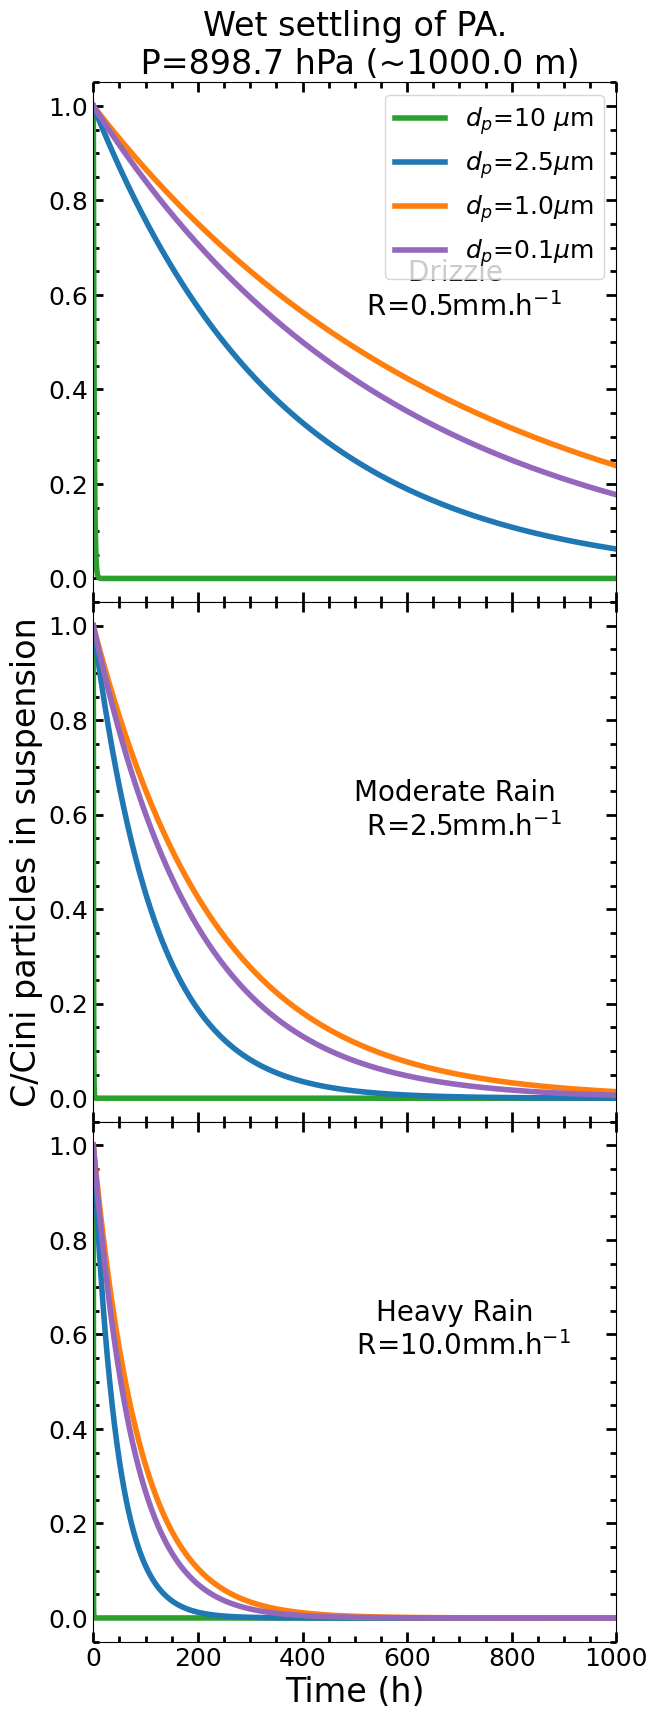

In [67]:
T_Air = 25.0 + 273.15 #[K]
RH = 0.8 
particleDiameter=np.array([dPM10, dPM2_5, dPM1, dPM0_1])
particleName = 'PA'
rhoParticle = rhoPA
kpParticle = kpPA
alpha = 2.0

Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)


print (Eeff)

# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp

Scavenging = np.transpose(Scavenging)
print('Scavenging: ', Scavenging)




#first order reaction
def WetSettling(C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

Cini = 15.0
C0 = [Cini, Cini, Cini, Cini] 
t = np.arange(0.0, 20000.0*3600.0, 3600.0*0.25) # [s] arrange for values of delta t, linspace for a number linspace ;) 

print(Scavenging[0,3])


CdPM10_RI0_25 = odeint(WetSettling,C0[0],t, args=(Scavenging[0,0],))
CdPM2_5_RI0_25 = odeint(WetSettling,C0[1],t, args=(Scavenging[0,1],))
CdPM1_RI0_25 = odeint(WetSettling,C0[2],t, args=(Scavenging[0,2],))
CdPM0_1_RI0_25 = odeint(WetSettling,C0[3],t, args=(Scavenging[0,3],))

CdPM10_drizzle = odeint(WetSettling,C0[0],t, args=(Scavenging[1,0],))
CdPM2_5_drizzle = odeint(WetSettling,C0[1],t, args=(Scavenging[1,1],))
CdPM1_drizzle = odeint(WetSettling,C0[2],t, args=(Scavenging[1,2],))
CdPM0_1_drizzle = odeint(WetSettling,C0[3],t, args=(Scavenging[1,3],))

CdPM10_RI1 = odeint(WetSettling,C0[0],t, args=(Scavenging[2,0],))
CdPM2_5_RI1 = odeint(WetSettling,C0[1],t, args=(Scavenging[2,1],))
CdPM1_RI1 = odeint(WetSettling,C0[2],t, args=(Scavenging[2,2],))
CdPM0_1_RI1 = odeint(WetSettling,C0[3],t, args=(Scavenging[2,3],))


CdPM10_RI2 = odeint(WetSettling,C0[0],t, args=(Scavenging[3,0],))
CdPM2_5_RI2 = odeint(WetSettling,C0[1],t, args=(Scavenging[3,1],))
CdPM1_RI2 = odeint(WetSettling,C0[2],t, args=(Scavenging[3,2],))
CdPM0_1_RI2 = odeint(WetSettling,C0[3],t, args=(Scavenging[3,3],))


CdPM10_moderate = odeint(WetSettling,C0[0],t, args=(Scavenging[4,0],))
CdPM2_5_moderate = odeint(WetSettling,C0[1],t, args=(Scavenging[4,1],))
CdPM1_moderate = odeint(WetSettling,C0[2],t, args=(Scavenging[4,2],))
CdPM0_1_moderate = odeint(WetSettling,C0[3],t, args=(Scavenging[4,3],))

CdPM10_RI4 = odeint(WetSettling,C0[0],t, args=(Scavenging[5,0],))
CdPM2_5_RI4 = odeint(WetSettling,C0[1],t, args=(Scavenging[5,1],))
CdPM1_RI4 = odeint(WetSettling,C0[2],t, args=(Scavenging[5,2],))
CdPM0_1_RI4 = odeint(WetSettling,C0[3],t, args=(Scavenging[5,3],))

CdPM10_RI6 = odeint(WetSettling,C0[0],t, args=(Scavenging[6,0],))
CdPM2_5_RI6 = odeint(WetSettling,C0[1],t, args=(Scavenging[6,1],))
CdPM1_RI6 = odeint(WetSettling,C0[2],t, args=(Scavenging[6,2],))
CdPM0_1_RI6 = odeint(WetSettling,C0[3],t, args=(Scavenging[6,3],))

CdPM10_RI8 = odeint(WetSettling,C0[0],t, args=(Scavenging[7,0],))
CdPM2_5_RI8 = odeint(WetSettling,C0[1],t, args=(Scavenging[7,1],))
CdPM1_RI8 = odeint(WetSettling,C0[2],t, args=(Scavenging[7,2],))
CdPM0_1_RI8 = odeint(WetSettling,C0[3],t, args=(Scavenging[7,3],))

CdPM10_heavy = odeint(WetSettling,C0[0],t, args=(Scavenging[8,0],))
CdPM2_5_heavy = odeint(WetSettling,C0[1],t, args=(Scavenging[8,1],))
CdPM1_heavy = odeint(WetSettling,C0[2],t, args=(Scavenging[8,2],))
CdPM0_1_heavy = odeint(WetSettling,C0[3],t, args=(Scavenging[8,3],))




#print(CdPM10_drizzle)
## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots




#----- Size effects -------------------------------
def PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzlet, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    title, pictureName):
    fig, (figDrizzle, figModerate, figHeavy) = plt.subplots(3, 1, figsize=(6.75, 20.25), sharex=True, sharey=True)

    figDrizzle.set_title(title,fontsize=24)

    figDrizzle.plot(th,CdPM10_drizzle/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figDrizzle.plot(th,CdPM2_5_drizzle/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figDrizzle.plot(th,CdPM1_drizzle/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figDrizzle.plot(th,CdPM0_1_drizzle/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')

    figDrizzle.legend(loc="upper right", fontsize=18 )

    figDrizzle.set_xlim([0,1000])
    figDrizzle.tick_params(top=True, right=True, which='both', direction='in',width=2,labelsize=18 )
    figDrizzle.tick_params(which='major', length=7)
    figDrizzle.tick_params(which='minor', length=4)
    figDrizzle.text(0.7, 0.6, "Drizzle \n R=0.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figDrizzle.transAxes, fontsize=20)

    figModerate.plot(th,CdPM10_moderate/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figModerate.plot(th,CdPM2_5_moderate/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figModerate.plot(th,CdPM1_moderate/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figModerate.plot(th,CdPM0_1_moderate/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')


    figModerate.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figModerate.tick_params(which='major', length=7)
    figModerate.tick_params(which='minor', length=4)
    figModerate.text(0.7, 0.6, "Moderate Rain \n R=2.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figModerate.transAxes, fontsize=20)

    figHeavy.plot(th,CdPM10_heavy/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figHeavy.plot(th,CdPM2_5_heavy/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figHeavy.plot(th,CdPM1_heavy/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figHeavy.plot(th,CdPM0_1_heavy/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')    
    
    
    figHeavy.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figHeavy.tick_params(which='major', length=7)
    figHeavy.tick_params(which='minor', length=4)
    figHeavy.text(0.7, 0.6, "Heavy Rain \n R=10.0mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figHeavy.transAxes, fontsize=20)

    figModerate.set_ylabel('C/Cini particles in suspension' , fontsize=24)
    figHeavy.set_xlabel('Time (h)' , fontsize=24)


    #plt.setp(figModerate.get_xticklabels(), visible=True)

    fig.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

    figDrizzle.minorticks_on()


    plt.savefig(pictureName, dpi=150)
    
    
PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzle, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    'Wet settling of '+particleName+'.\n P='+str(P_Air/100)+' hPa (~'+str(height)+' m)', 
                    'WetSettling_SizeEffects_RainIntensity_'+particleName+'_'+str(height)+'m.png')
    



[0.09375    0.05208333 0.03125    0.02083333 0.02083333 0.01041667
 0.01041667 0.01041667 0.01041667]
[16.61458333 10.40625     6.5         4.04166667  3.45833333  2.5
  1.875       1.53125     1.3125    ]
[32.01041667 20.16666667 12.65625     7.88541667  6.76041667  4.875
  3.66666667  3.          2.5625    ]
[26.29166667 16.6875     10.55208333  6.625       5.6875      4.125
  3.125       2.5625      2.1875    ]
[ 0.25  0.5   1.    2.    2.5   4.    6.    8.   10.  ]


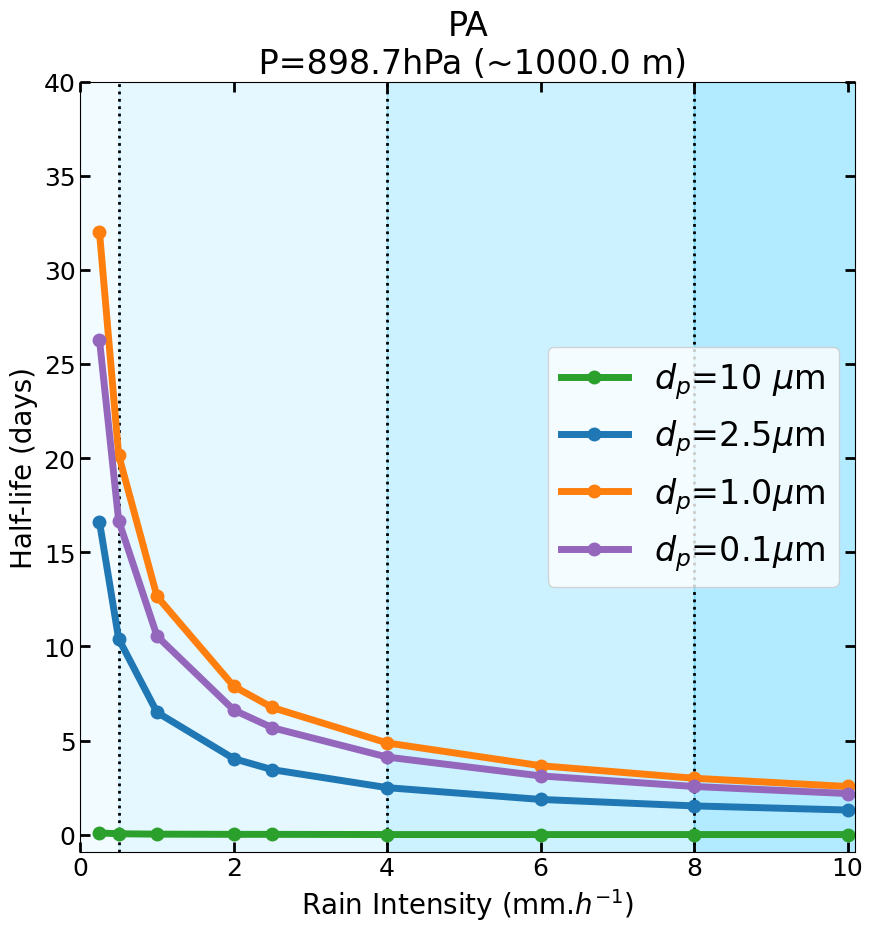

In [68]:
import numpy as np

limit = 0.5*Cini
days = True

residenceTimeCdPM10 = np.array([])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI0_25 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_drizzle <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI1 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI2 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_moderate <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI4 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI6 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI8 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_heavy <= limit)])
if days:
    residenceTimeCdPM10 = residenceTimeCdPM10 /24.0
print(residenceTimeCdPM10)


residenceTimeCdPM2_5 = np.array([])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI0_25 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_drizzle <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI1 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI2 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_moderate <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI4 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI6 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI8 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_heavy <= limit)])
if days:
    residenceTimeCdPM2_5 = residenceTimeCdPM2_5 /24.0
print(residenceTimeCdPM2_5)



residenceTimeCdPM1 = np.array([])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI0_25 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_drizzle <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI1 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI2 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_moderate <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI4 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI6 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI8 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_heavy <= limit)])
if days:
    residenceTimeCdPM1 = residenceTimeCdPM1 /24.0
print(residenceTimeCdPM1)

residenceTimeCdPM0_1 = np.array([])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI0_25 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_drizzle <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI1 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI2 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_moderate <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI4 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI6 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI8 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_heavy <= limit)])
if days:
    residenceTimeCdPM0_1 = residenceTimeCdPM0_1 /24.0
print(residenceTimeCdPM0_1)


print(Rain_Int_mmh)

plotRainIntensitySizeEffect (particleName, Rain_Int_mmh, residenceTimeCdPM10, residenceTimeCdPM2_5, residenceTimeCdPM1, residenceTimeCdPM0_1)




## PVC

73.73079780508351 0.0007791951768543228
91.53794080160107 0.0008693786985823227
113.20972159266888 0.00097
138.82228000746193 0.0010822671426552152
147.80056898508332 0.0011211049126418119
168.32322375700835 0.0012075280083207053
187.97921534192926 0.0012874181627891361
203.14640621924838 0.0013472864816921571
215.6687919920619 0.0013956346209081701
[[0.80408372 0.80195243 0.79927101 0.79510356 0.79320798 0.78885614
  0.78478169 0.78174336 0.77931276]
 [0.00370227 0.00329483 0.00294093 0.00263944 0.00255374 0.00238551
  0.00225218 0.00216343 0.00209767]
 [0.00197468 0.00174644 0.00155086 0.00138697 0.00134103 0.00125137
  0.0011807  0.00113384 0.00109919]
 [0.00254935 0.00223535 0.00196888 0.00174664 0.00168427 0.00156279
  0.00146735 0.00140423 0.00135766]]
Scavenging:  [[1.07493890e-04 4.94937588e-07 2.63984478e-07 3.40809796e-07]
 [1.92175658e-04 7.89554843e-07 4.18508334e-07 5.35668414e-07]
 [3.43329473e-04 1.26328476e-06 6.66176994e-07 8.45739992e-07]
 [6.12220655e-04 2.03233513e-

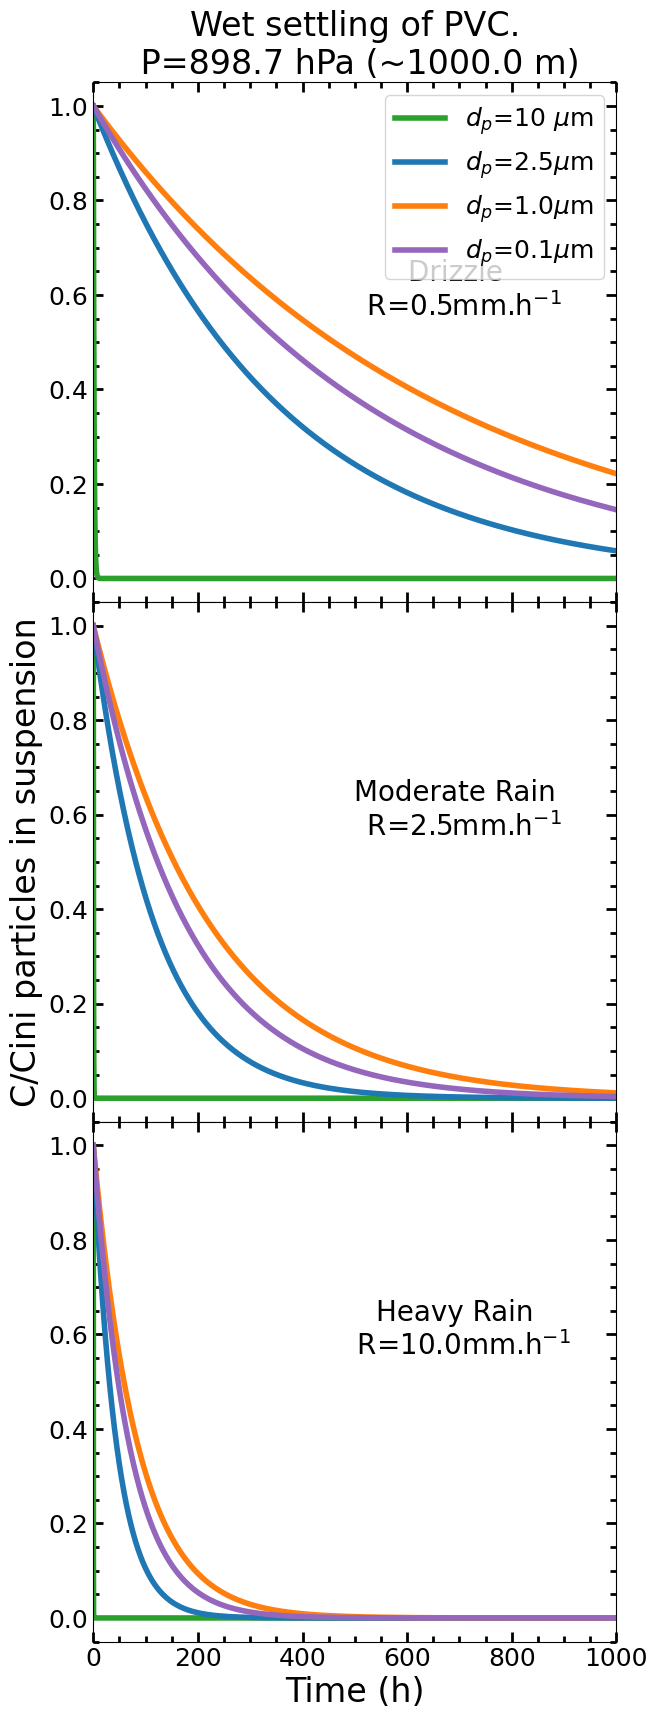

In [69]:
T_Air = 25.0 + 273.15 #[K]
RH = 0.8 
particleDiameter=np.array([dPM10, dPM2_5, dPM1, dPM0_1])
particleName = 'PVC'
rhoParticle = rhoPVC
kpParticle = kpPVC
alpha = 2.0

Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)


print (Eeff)

# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp

Scavenging = np.transpose(Scavenging)
print('Scavenging: ', Scavenging)




#first order reaction
def WetSettling(C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

Cini = 15.0
C0 = [Cini, Cini, Cini, Cini] 
t = np.arange(0.0, 20000.0*3600.0, 3600.0*0.25) # [s] arrange for values of delta t, linspace for a number linspace ;) 

print(Scavenging[0,3])


CdPM10_RI0_25 = odeint(WetSettling,C0[0],t, args=(Scavenging[0,0],))
CdPM2_5_RI0_25 = odeint(WetSettling,C0[1],t, args=(Scavenging[0,1],))
CdPM1_RI0_25 = odeint(WetSettling,C0[2],t, args=(Scavenging[0,2],))
CdPM0_1_RI0_25 = odeint(WetSettling,C0[3],t, args=(Scavenging[0,3],))

CdPM10_drizzle = odeint(WetSettling,C0[0],t, args=(Scavenging[1,0],))
CdPM2_5_drizzle = odeint(WetSettling,C0[1],t, args=(Scavenging[1,1],))
CdPM1_drizzle = odeint(WetSettling,C0[2],t, args=(Scavenging[1,2],))
CdPM0_1_drizzle = odeint(WetSettling,C0[3],t, args=(Scavenging[1,3],))

CdPM10_RI1 = odeint(WetSettling,C0[0],t, args=(Scavenging[2,0],))
CdPM2_5_RI1 = odeint(WetSettling,C0[1],t, args=(Scavenging[2,1],))
CdPM1_RI1 = odeint(WetSettling,C0[2],t, args=(Scavenging[2,2],))
CdPM0_1_RI1 = odeint(WetSettling,C0[3],t, args=(Scavenging[2,3],))


CdPM10_RI2 = odeint(WetSettling,C0[0],t, args=(Scavenging[3,0],))
CdPM2_5_RI2 = odeint(WetSettling,C0[1],t, args=(Scavenging[3,1],))
CdPM1_RI2 = odeint(WetSettling,C0[2],t, args=(Scavenging[3,2],))
CdPM0_1_RI2 = odeint(WetSettling,C0[3],t, args=(Scavenging[3,3],))


CdPM10_moderate = odeint(WetSettling,C0[0],t, args=(Scavenging[4,0],))
CdPM2_5_moderate = odeint(WetSettling,C0[1],t, args=(Scavenging[4,1],))
CdPM1_moderate = odeint(WetSettling,C0[2],t, args=(Scavenging[4,2],))
CdPM0_1_moderate = odeint(WetSettling,C0[3],t, args=(Scavenging[4,3],))

CdPM10_RI4 = odeint(WetSettling,C0[0],t, args=(Scavenging[5,0],))
CdPM2_5_RI4 = odeint(WetSettling,C0[1],t, args=(Scavenging[5,1],))
CdPM1_RI4 = odeint(WetSettling,C0[2],t, args=(Scavenging[5,2],))
CdPM0_1_RI4 = odeint(WetSettling,C0[3],t, args=(Scavenging[5,3],))

CdPM10_RI6 = odeint(WetSettling,C0[0],t, args=(Scavenging[6,0],))
CdPM2_5_RI6 = odeint(WetSettling,C0[1],t, args=(Scavenging[6,1],))
CdPM1_RI6 = odeint(WetSettling,C0[2],t, args=(Scavenging[6,2],))
CdPM0_1_RI6 = odeint(WetSettling,C0[3],t, args=(Scavenging[6,3],))

CdPM10_RI8 = odeint(WetSettling,C0[0],t, args=(Scavenging[7,0],))
CdPM2_5_RI8 = odeint(WetSettling,C0[1],t, args=(Scavenging[7,1],))
CdPM1_RI8 = odeint(WetSettling,C0[2],t, args=(Scavenging[7,2],))
CdPM0_1_RI8 = odeint(WetSettling,C0[3],t, args=(Scavenging[7,3],))

CdPM10_heavy = odeint(WetSettling,C0[0],t, args=(Scavenging[8,0],))
CdPM2_5_heavy = odeint(WetSettling,C0[1],t, args=(Scavenging[8,1],))
CdPM1_heavy = odeint(WetSettling,C0[2],t, args=(Scavenging[8,2],))
CdPM0_1_heavy = odeint(WetSettling,C0[3],t, args=(Scavenging[8,3],))




#print(CdPM10_drizzle)
## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots




#----- Size effects -------------------------------
def PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzlet, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    title, pictureName):
    fig, (figDrizzle, figModerate, figHeavy) = plt.subplots(3, 1, figsize=(6.75, 20.25), sharex=True, sharey=True)

    figDrizzle.set_title(title,fontsize=24)

    figDrizzle.plot(th,CdPM10_drizzle/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figDrizzle.plot(th,CdPM2_5_drizzle/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figDrizzle.plot(th,CdPM1_drizzle/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figDrizzle.plot(th,CdPM0_1_drizzle/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')

    figDrizzle.legend(loc="upper right", fontsize=18 )

    figDrizzle.set_xlim([0,1000])
    figDrizzle.tick_params(top=True, right=True, which='both', direction='in',width=2,labelsize=18 )
    figDrizzle.tick_params(which='major', length=7)
    figDrizzle.tick_params(which='minor', length=4)
    figDrizzle.text(0.7, 0.6, "Drizzle \n R=0.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figDrizzle.transAxes, fontsize=20)

    figModerate.plot(th,CdPM10_moderate/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figModerate.plot(th,CdPM2_5_moderate/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figModerate.plot(th,CdPM1_moderate/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figModerate.plot(th,CdPM0_1_moderate/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')


    figModerate.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figModerate.tick_params(which='major', length=7)
    figModerate.tick_params(which='minor', length=4)
    figModerate.text(0.7, 0.6, "Moderate Rain \n R=2.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figModerate.transAxes, fontsize=20)

    figHeavy.plot(th,CdPM10_heavy/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figHeavy.plot(th,CdPM2_5_heavy/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figHeavy.plot(th,CdPM1_heavy/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figHeavy.plot(th,CdPM0_1_heavy/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')    
    
    
    figHeavy.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figHeavy.tick_params(which='major', length=7)
    figHeavy.tick_params(which='minor', length=4)
    figHeavy.text(0.7, 0.6, "Heavy Rain \n R=10.0mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figHeavy.transAxes, fontsize=20)

    figModerate.set_ylabel('C/Cini particles in suspension' , fontsize=24)
    figHeavy.set_xlabel('Time (h)' , fontsize=24)


    #plt.setp(figModerate.get_xticklabels(), visible=True)

    fig.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

    figDrizzle.minorticks_on()


    plt.savefig(pictureName, dpi=150)
    
    
PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzle, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    'Wet settling of '+particleName+'.\n P='+str(P_Air/100)+' hPa (~'+str(height)+' m)', 
                    'WetSettling_SizeEffects_RainIntensity_'+particleName+'_'+str(height)+'m.png')
    



[0.08333333 0.05208333 0.03125    0.02083333 0.02083333 0.01041667
 0.01041667 0.01041667 0.01041667]
[16.21875    10.16666667  6.35416667  3.94791667  3.38541667  2.4375
  1.84375     1.5         1.28125   ]
[30.39583333 19.17708333 12.05208333  7.52083333  6.44791667  4.64583333
  3.5         2.86458333  2.44791667]
[23.54166667 14.97916667  9.48958333  5.96875     5.13541667  3.72916667
  2.82291667  2.3125      1.98958333]
[ 0.25  0.5   1.    2.    2.5   4.    6.    8.   10.  ]


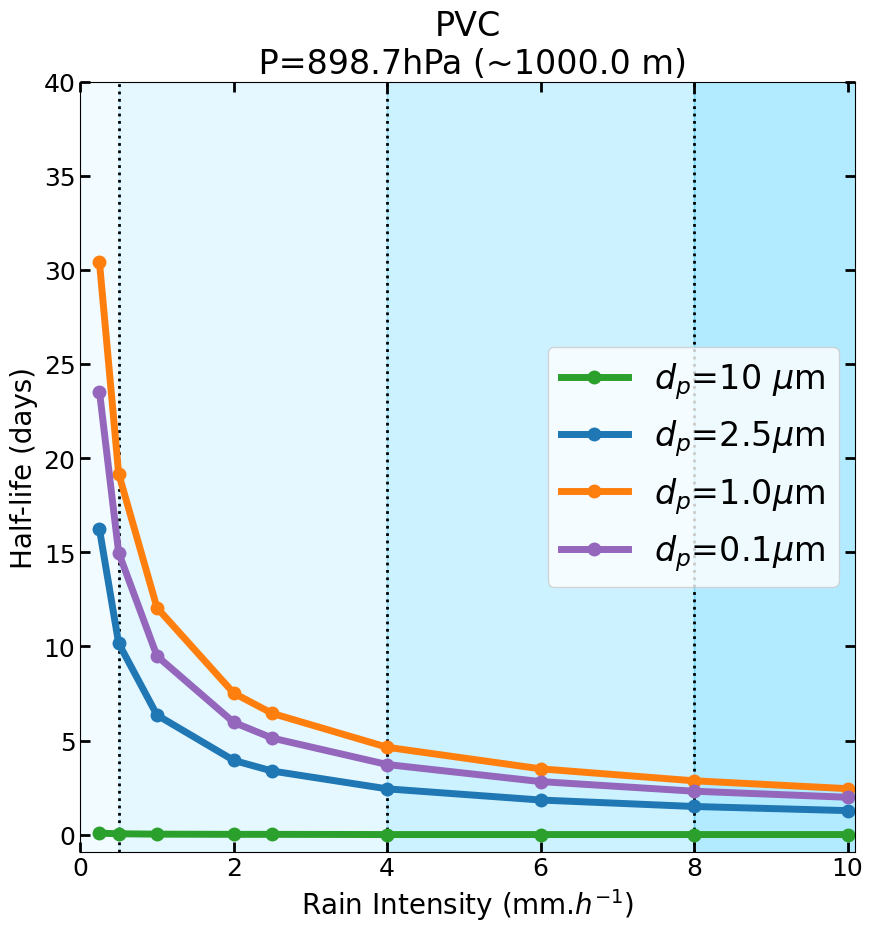

In [70]:
import numpy as np

limit = 0.5*Cini
days = True

residenceTimeCdPM10 = np.array([])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI0_25 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_drizzle <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI1 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI2 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_moderate <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI4 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI6 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI8 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_heavy <= limit)])
if days:
    residenceTimeCdPM10 = residenceTimeCdPM10 /24.0
print(residenceTimeCdPM10)


residenceTimeCdPM2_5 = np.array([])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI0_25 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_drizzle <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI1 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI2 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_moderate <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI4 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI6 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI8 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_heavy <= limit)])
if days:
    residenceTimeCdPM2_5 = residenceTimeCdPM2_5 /24.0
print(residenceTimeCdPM2_5)



residenceTimeCdPM1 = np.array([])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI0_25 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_drizzle <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI1 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI2 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_moderate <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI4 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI6 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI8 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_heavy <= limit)])
if days:
    residenceTimeCdPM1 = residenceTimeCdPM1 /24.0
print(residenceTimeCdPM1)

residenceTimeCdPM0_1 = np.array([])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI0_25 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_drizzle <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI1 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI2 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_moderate <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI4 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI6 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI8 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_heavy <= limit)])
if days:
    residenceTimeCdPM0_1 = residenceTimeCdPM0_1 /24.0
print(residenceTimeCdPM0_1)


print(Rain_Int_mmh)

plotRainIntensitySizeEffect (particleName, Rain_Int_mmh, residenceTimeCdPM10, residenceTimeCdPM2_5, residenceTimeCdPM1, residenceTimeCdPM0_1)




## LDPE

73.73079780508351 0.0007791951768543228
91.53794080160107 0.0008693786985823227
113.20972159266888 0.00097
138.82228000746193 0.0010822671426552152
147.80056898508332 0.0011211049126418119
168.32322375700835 0.0012075280083207053
187.97921534192926 0.0012874181627891361
203.14640621924838 0.0013472864816921571
215.6687919920619 0.0013956346209081701
[[0.6753109  0.67389799 0.67149195 0.66675622 0.66439713 0.65888244
  0.65364321 0.64970712 0.64654595]
 [0.0035613  0.00317361 0.0028361  0.00254801 0.00246604 0.00230501
  0.00217726 0.00209218 0.00202909]
 [0.0018189  0.0016125  0.00143502 0.00128594 0.00124413 0.00116241
  0.00109792 0.0010551  0.00102341]
 [0.00213399 0.00187821 0.00166002 0.00147728 0.00142589 0.0013256
  0.00124662 0.00119429 0.00115562]]
Scavenging:  [[9.02789029e-05 4.76091559e-07 2.43159600e-07 2.85282586e-07]
 [1.61489367e-04 7.60507669e-07 3.86411183e-07 4.50084944e-07]
 [2.88441558e-04 1.21825512e-06 6.16419206e-07 7.13066405e-07]
 [5.13394669e-04 1.96194123e-0

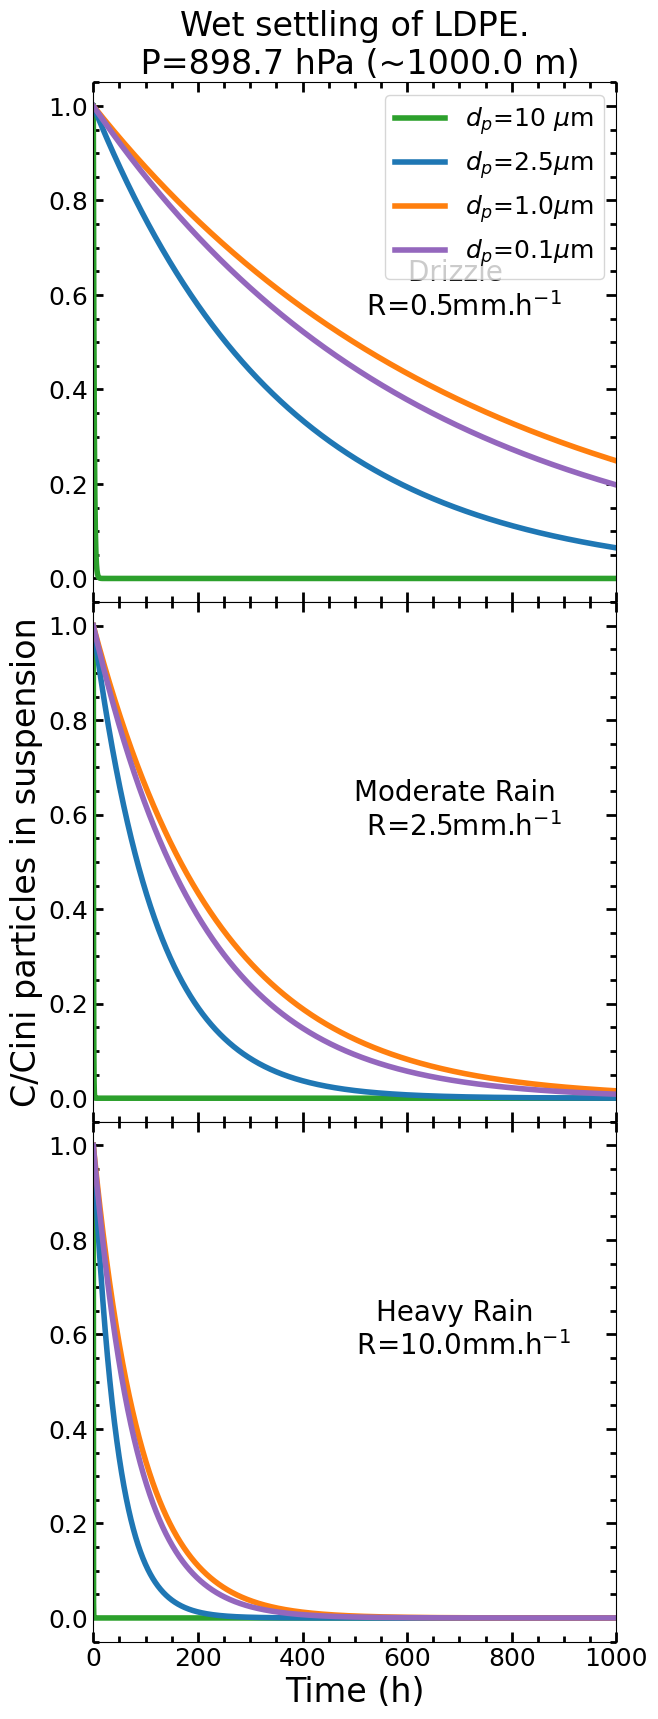

In [71]:
T_Air = 25.0 + 273.15 #[K]
RH = 0.8 
particleDiameter=np.array([dPM10, dPM2_5, dPM1, dPM0_1])
particleName = 'LDPE'
rhoParticle = rhoLDPE
kpParticle = kpLDPE
alpha = 2.0

Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)


print (Eeff)

# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp

Scavenging = np.transpose(Scavenging)
print('Scavenging: ', Scavenging)




#first order reaction
def WetSettling(C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

Cini = 15.0
C0 = [Cini, Cini, Cini, Cini] 
t = np.arange(0.0, 20000.0*3600.0, 3600.0*0.25) # [s] arrange for values of delta t, linspace for a number linspace ;) 

print(Scavenging[0,3])


CdPM10_RI0_25 = odeint(WetSettling,C0[0],t, args=(Scavenging[0,0],))
CdPM2_5_RI0_25 = odeint(WetSettling,C0[1],t, args=(Scavenging[0,1],))
CdPM1_RI0_25 = odeint(WetSettling,C0[2],t, args=(Scavenging[0,2],))
CdPM0_1_RI0_25 = odeint(WetSettling,C0[3],t, args=(Scavenging[0,3],))

CdPM10_drizzle = odeint(WetSettling,C0[0],t, args=(Scavenging[1,0],))
CdPM2_5_drizzle = odeint(WetSettling,C0[1],t, args=(Scavenging[1,1],))
CdPM1_drizzle = odeint(WetSettling,C0[2],t, args=(Scavenging[1,2],))
CdPM0_1_drizzle = odeint(WetSettling,C0[3],t, args=(Scavenging[1,3],))

CdPM10_RI1 = odeint(WetSettling,C0[0],t, args=(Scavenging[2,0],))
CdPM2_5_RI1 = odeint(WetSettling,C0[1],t, args=(Scavenging[2,1],))
CdPM1_RI1 = odeint(WetSettling,C0[2],t, args=(Scavenging[2,2],))
CdPM0_1_RI1 = odeint(WetSettling,C0[3],t, args=(Scavenging[2,3],))


CdPM10_RI2 = odeint(WetSettling,C0[0],t, args=(Scavenging[3,0],))
CdPM2_5_RI2 = odeint(WetSettling,C0[1],t, args=(Scavenging[3,1],))
CdPM1_RI2 = odeint(WetSettling,C0[2],t, args=(Scavenging[3,2],))
CdPM0_1_RI2 = odeint(WetSettling,C0[3],t, args=(Scavenging[3,3],))


CdPM10_moderate = odeint(WetSettling,C0[0],t, args=(Scavenging[4,0],))
CdPM2_5_moderate = odeint(WetSettling,C0[1],t, args=(Scavenging[4,1],))
CdPM1_moderate = odeint(WetSettling,C0[2],t, args=(Scavenging[4,2],))
CdPM0_1_moderate = odeint(WetSettling,C0[3],t, args=(Scavenging[4,3],))

CdPM10_RI4 = odeint(WetSettling,C0[0],t, args=(Scavenging[5,0],))
CdPM2_5_RI4 = odeint(WetSettling,C0[1],t, args=(Scavenging[5,1],))
CdPM1_RI4 = odeint(WetSettling,C0[2],t, args=(Scavenging[5,2],))
CdPM0_1_RI4 = odeint(WetSettling,C0[3],t, args=(Scavenging[5,3],))

CdPM10_RI6 = odeint(WetSettling,C0[0],t, args=(Scavenging[6,0],))
CdPM2_5_RI6 = odeint(WetSettling,C0[1],t, args=(Scavenging[6,1],))
CdPM1_RI6 = odeint(WetSettling,C0[2],t, args=(Scavenging[6,2],))
CdPM0_1_RI6 = odeint(WetSettling,C0[3],t, args=(Scavenging[6,3],))

CdPM10_RI8 = odeint(WetSettling,C0[0],t, args=(Scavenging[7,0],))
CdPM2_5_RI8 = odeint(WetSettling,C0[1],t, args=(Scavenging[7,1],))
CdPM1_RI8 = odeint(WetSettling,C0[2],t, args=(Scavenging[7,2],))
CdPM0_1_RI8 = odeint(WetSettling,C0[3],t, args=(Scavenging[7,3],))

CdPM10_heavy = odeint(WetSettling,C0[0],t, args=(Scavenging[8,0],))
CdPM2_5_heavy = odeint(WetSettling,C0[1],t, args=(Scavenging[8,1],))
CdPM1_heavy = odeint(WetSettling,C0[2],t, args=(Scavenging[8,2],))
CdPM0_1_heavy = odeint(WetSettling,C0[3],t, args=(Scavenging[8,3],))




#print(CdPM10_drizzle)
## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots




#----- Size effects -------------------------------
def PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzlet, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    title, pictureName):
    fig, (figDrizzle, figModerate, figHeavy) = plt.subplots(3, 1, figsize=(6.75, 20.25), sharex=True, sharey=True)

    figDrizzle.set_title(title,fontsize=24)

    figDrizzle.plot(th,CdPM10_drizzle/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figDrizzle.plot(th,CdPM2_5_drizzle/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figDrizzle.plot(th,CdPM1_drizzle/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figDrizzle.plot(th,CdPM0_1_drizzle/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')

    figDrizzle.legend(loc="upper right", fontsize=18 )

    figDrizzle.set_xlim([0,1000])
    figDrizzle.tick_params(top=True, right=True, which='both', direction='in',width=2,labelsize=18 )
    figDrizzle.tick_params(which='major', length=7)
    figDrizzle.tick_params(which='minor', length=4)
    figDrizzle.text(0.7, 0.6, "Drizzle \n R=0.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figDrizzle.transAxes, fontsize=20)

    figModerate.plot(th,CdPM10_moderate/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figModerate.plot(th,CdPM2_5_moderate/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figModerate.plot(th,CdPM1_moderate/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figModerate.plot(th,CdPM0_1_moderate/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')


    figModerate.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figModerate.tick_params(which='major', length=7)
    figModerate.tick_params(which='minor', length=4)
    figModerate.text(0.7, 0.6, "Moderate Rain \n R=2.5mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figModerate.transAxes, fontsize=20)

    figHeavy.plot(th,CdPM10_heavy/C0[0],label='$d_p$=10 $\mu$m',linewidth=4, color='tab:green')
    figHeavy.plot(th,CdPM2_5_heavy/C0[1],label='$d_p$=2.5$\mu$m',linewidth=4,color='tab:blue')
    figHeavy.plot(th,CdPM1_heavy/C0[2],label='$d_p$=1.0$\mu$m',linewidth=4,color='tab:orange')
    figHeavy.plot(th,CdPM0_1_heavy/C0[3],label='$d_p$=0.1$\mu$m',linewidth=4, color='tab:purple')    
    
    
    figHeavy.tick_params(top=True, right=True, which='both', direction='in', width=2,labelsize=18 )
    figHeavy.tick_params(which='major', length=7)
    figHeavy.tick_params(which='minor', length=4)
    figHeavy.text(0.7, 0.6, "Heavy Rain \n R=10.0mm.h$^{-1}$", 
                    horizontalalignment='center', verticalalignment='center', 
                    transform=figHeavy.transAxes, fontsize=20)

    figModerate.set_ylabel('C/Cini particles in suspension' , fontsize=24)
    figHeavy.set_xlabel('Time (h)' , fontsize=24)


    #plt.setp(figModerate.get_xticklabels(), visible=True)

    fig.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

    figDrizzle.minorticks_on()


    plt.savefig(pictureName, dpi=150)
    
    
PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzle, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    'Wet settling of '+particleName+'.\n P='+str(P_Air/100)+' hPa (~'+str(height)+' m)', 
                    'WetSettling_SizeEffects_RainIntensity_'+particleName+'_'+str(height)+'m.png')
    



[0.09375    0.05208333 0.03125    0.02083333 0.02083333 0.01041667
 0.01041667 0.01041667 0.01041667]
[16.85416667 10.55208333  6.59375     4.09375     3.51041667  2.53125
  1.90625     1.55208333  1.33333333]
[33.         20.77083333 13.02083333  8.10416667  6.94791667  5.01041667
  3.77083333  3.08333333  2.63541667]
[28.125      17.83333333 11.26041667  7.0625      6.0625      4.38541667
  3.32291667  2.71875     2.33333333]
[ 0.25  0.5   1.    2.    2.5   4.    6.    8.   10.  ]


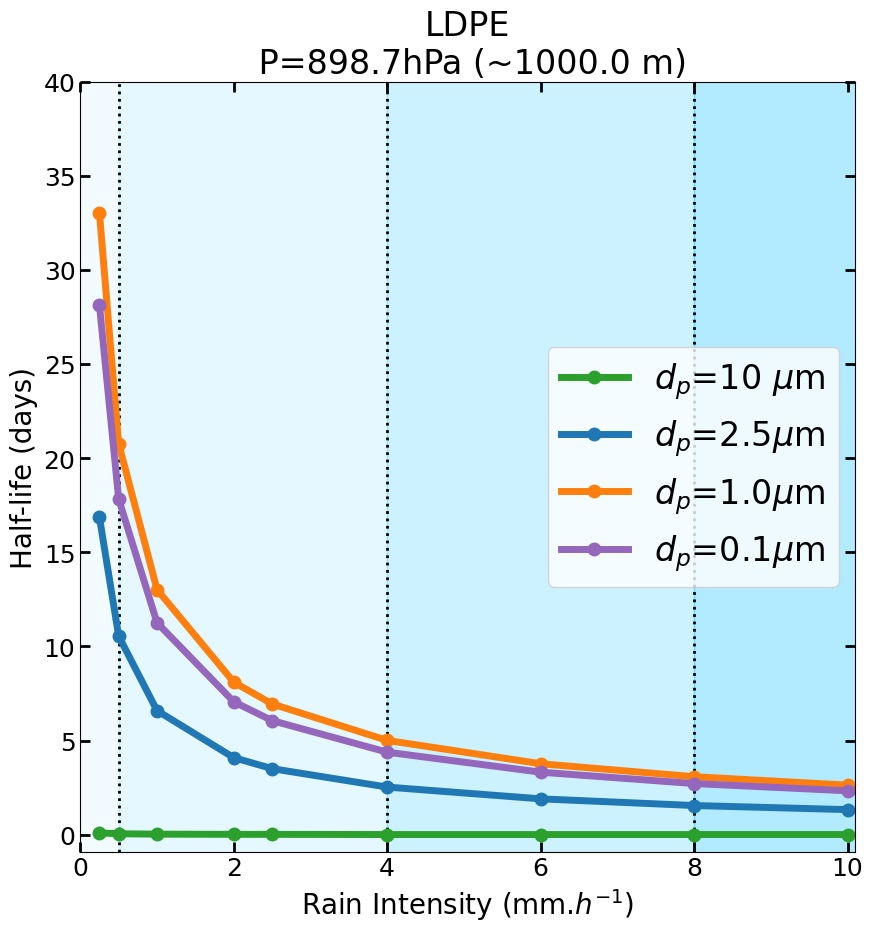

In [72]:
import numpy as np

limit = 0.5*Cini
days = True

residenceTimeCdPM10 = np.array([])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI0_25 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_drizzle <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI1 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI2 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_moderate <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI4 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI6 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_RI8 <= limit)])
residenceTimeCdPM10 = np.append(residenceTimeCdPM10, th[np.argmax(CdPM10_heavy <= limit)])
if days:
    residenceTimeCdPM10 = residenceTimeCdPM10 /24.0
print(residenceTimeCdPM10)


residenceTimeCdPM2_5 = np.array([])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI0_25 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_drizzle <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI1 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI2 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_moderate <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI4 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI6 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_RI8 <= limit)])
residenceTimeCdPM2_5 = np.append(residenceTimeCdPM2_5, th[np.argmax(CdPM2_5_heavy <= limit)])
if days:
    residenceTimeCdPM2_5 = residenceTimeCdPM2_5 /24.0
print(residenceTimeCdPM2_5)



residenceTimeCdPM1 = np.array([])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI0_25 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_drizzle <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI1 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI2 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_moderate <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI4 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI6 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_RI8 <= limit)])
residenceTimeCdPM1 = np.append(residenceTimeCdPM1, th[np.argmax(CdPM1_heavy <= limit)])
if days:
    residenceTimeCdPM1 = residenceTimeCdPM1 /24.0
print(residenceTimeCdPM1)

residenceTimeCdPM0_1 = np.array([])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI0_25 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_drizzle <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI1 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI2 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_moderate <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI4 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI6 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_RI8 <= limit)])
residenceTimeCdPM0_1 = np.append(residenceTimeCdPM0_1, th[np.argmax(CdPM0_1_heavy <= limit)])
if days:
    residenceTimeCdPM0_1 = residenceTimeCdPM0_1 /24.0
print(residenceTimeCdPM0_1)


print(Rain_Int_mmh)

plotRainIntensitySizeEffect (particleName, Rain_Int_mmh, residenceTimeCdPM10, residenceTimeCdPM2_5, residenceTimeCdPM1, residenceTimeCdPM0_1)




73.66068873989796 0.0007791951768543228
91.45222947783623 0.0008693786985823227
113.10590584189119 0.00097
138.71790718934136 0.0010822671426552152
147.69217806919923 0.0011211049126418119
168.20508750264023 0.0012075280083207053
187.85119340662413 0.0012874181627891361
203.01051281395522 0.0013472864816921571
215.52630190908133 0.0013956346209081701
[[0.67462485 0.67322067 0.67082245 0.66613236 0.66377682 0.65826676
  0.6530291  0.64909312 0.64593161]
 [0.00356521 0.0031771  0.00283922 0.00255063 0.00246856 0.00230736
  0.00217948 0.00209432 0.00203117]
 [0.00182064 0.00161404 0.0014364  0.00128705 0.00124519 0.00116339
  0.00109884 0.00105599 0.00102427]
 [0.00213408 0.00187829 0.00166008 0.0014772  0.0014258  0.0013255
  0.00124651 0.00119418 0.00115552]]
2.852945098724135e-07


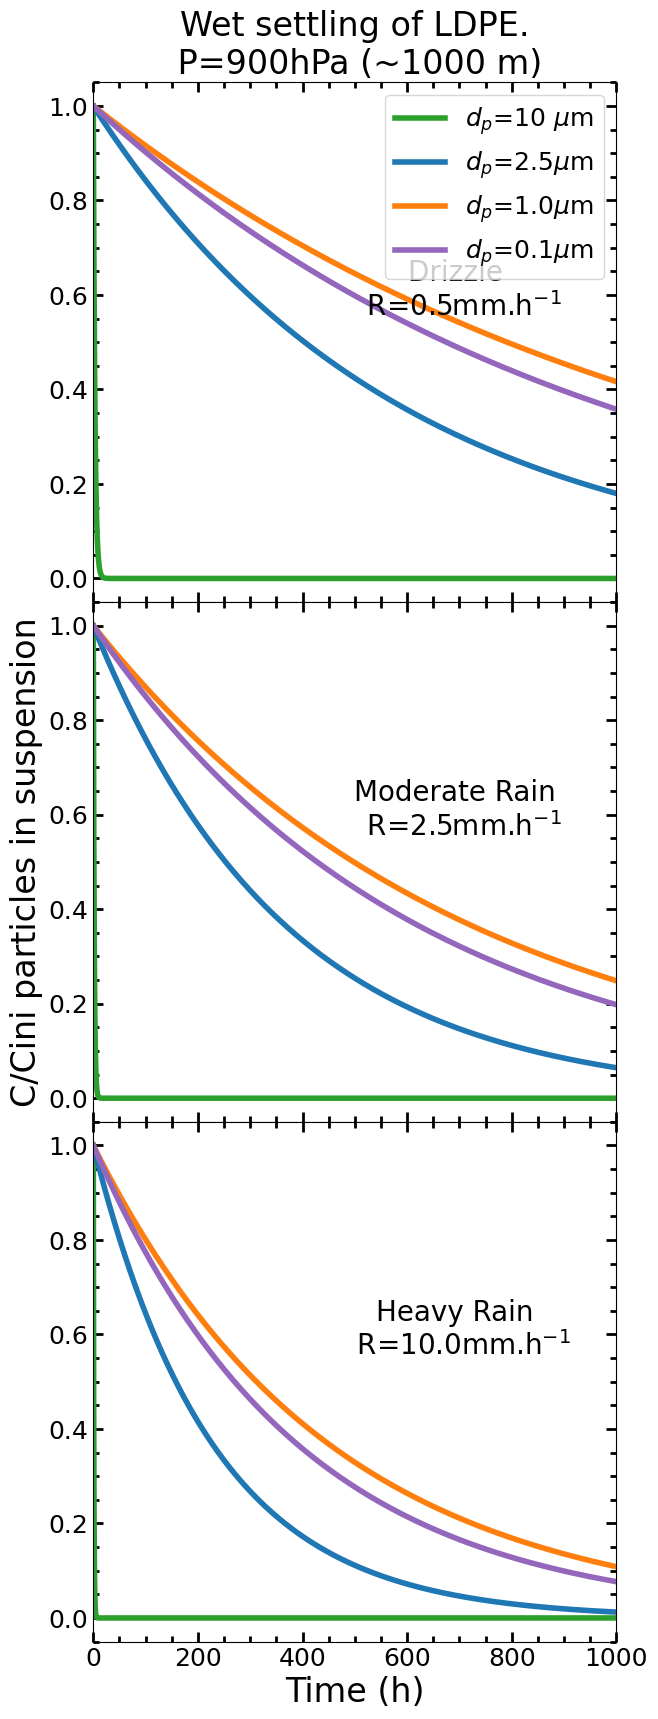

In [29]:
# ------------ LDPE 1000 m heigth, 900 hPa ---------------------------------------

P_Air = 900.0 * 100.0 #[Pa]
T_Air = 25.0 + 273.15 #[K]

RH = 0.8 
particleDiameter=np.array([dPM10, dPM2_5, dPM1, dPM0_1])
rhoParticle = rhoLDPE
kpParticle = kpLDPE
alpha = 2.0

Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)


print (Eeff)

# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp
Scavenging = np.transpose(Scavenging)


#first order reaction
def WetSettling(C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

C0 = [15.0, 15.0, 15.0, 15.0] 
t = np.arange(0.0, 1000.0*3600.0, 3600.0*0.25) # [s] arrange for values of delta t, linspace for a number linspace ;) 

print(Scavenging[0,3])
CdPM10_drizzle = odeint(WetSettling,C0[0],t, args=(Scavenging[0,0],))
CdPM2_5_drizzle = odeint(WetSettling,C0[1],t, args=(Scavenging[0,1],))
CdPM1_drizzle = odeint(WetSettling,C0[2],t, args=(Scavenging[0,2],))
CdPM0_1_drizzle = odeint(WetSettling,C0[3],t, args=(Scavenging[0,3],))

CdPM10_moderate = odeint(WetSettling,C0[0],t, args=(Scavenging[1,0],))
CdPM2_5_moderate = odeint(WetSettling,C0[1],t, args=(Scavenging[1,1],))
CdPM1_moderate = odeint(WetSettling,C0[2],t, args=(Scavenging[1,2],))
CdPM0_1_moderate = odeint(WetSettling,C0[3],t, args=(Scavenging[1,3],))

CdPM10_heavy = odeint(WetSettling,C0[0],t, args=(Scavenging[2,0],))
CdPM2_5_heavy = odeint(WetSettling,C0[1],t, args=(Scavenging[2,1],))
CdPM1_heavy = odeint(WetSettling,C0[2],t, args=(Scavenging[2,2],))
CdPM0_1_heavy = odeint(WetSettling,C0[3],t, args=(Scavenging[2,3],))

## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots


PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzle, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    'Wet settling of LDPE.\n P=900hPa (~1000 m)', 
                    'WetSettling_SizeEffects_RainIntensity_HDPE_1000m.png')

plt.savefig('WetSettling_LDPE_1000m.png', bbox_inches="tight", dpi=600)


73.66068873989796 0.0007791951768543228
91.45222947783623 0.0008693786985823227
113.10590584189119 0.00097
138.71790718934136 0.0010822671426552152
147.69217806919923 0.0011211049126418119
168.20508750264023 0.0012075280083207053
187.85119340662413 0.0012874181627891361
203.01051281395522 0.0013472864816921571
215.52630190908133 0.0013956346209081701
[[0.80362265 0.80149501 0.79881664 0.79467766 0.79278354 0.78843275
  0.78435746 0.78131779 0.77888583]
 [0.00370623 0.00329836 0.00294408 0.00264207 0.00255628 0.00238788
  0.00225441 0.00216559 0.00209976]
 [0.00197645 0.00174802 0.00155226 0.00138808 0.00134211 0.00125235
  0.00118163 0.00113473 0.00110005]
 [0.00254918 0.00223521 0.00196875 0.00174636 0.00168399 0.0015625
  0.00146707 0.00140397 0.0013574 ]]
3.4078713749995253e-07


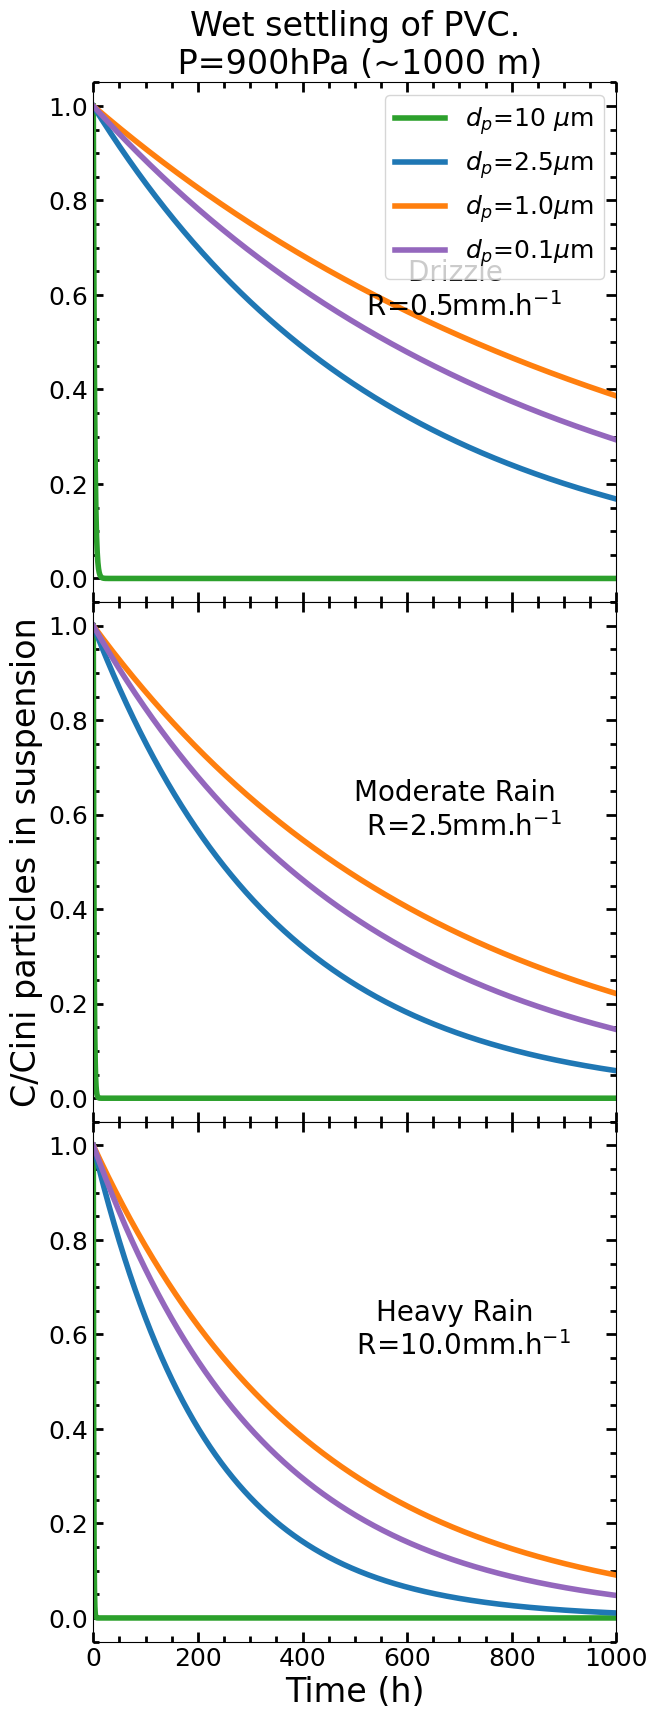

In [30]:


#------------ PVC 1000 m heigth, 900 hPa ---------------------------------------

P_Air = 900.0 * 100.0 #[Pa]
T_Air = 25.0 + 273.15 #[K]

RH = 0.8 
particleDiameter=np.array([dPM10, dPM2_5, dPM1, dPM0_1])
rhoParticle = rhoPVC
kpParticle = kpPVC
alpha = 2.0

Eeff = collectionEfficiency_SlinnPhiCharge(Dp, RH, 
                                         particleDiameter, rhoParticle, kpParticle,
                                         alpha,
                                         P_Air, T_Air)


print (Eeff)

# Scavenging coefficient
Scavenging = (3.0 / 2.0) * Eeff * Rain_Int / Dp
Scavenging = np.transpose(Scavenging)


#first order reaction
def WetSettling(C, t, Scavenging):
    dCdt = -Scavenging * C    
    return dCdt

C0 = [15.0, 15.0, 15.0, 15.0] 
t = np.arange(0.0, 1000.0*3600.0, 3600.0*0.25) # [s] arrange for values of delta t, linspace for a number linspace ;) 

print(Scavenging[0,3])
CdPM10_drizzle = odeint(WetSettling,C0[0],t, args=(Scavenging[0,0],))
CdPM2_5_drizzle = odeint(WetSettling,C0[1],t, args=(Scavenging[0,1],))
CdPM1_drizzle = odeint(WetSettling,C0[2],t, args=(Scavenging[0,2],))
CdPM0_1_drizzle = odeint(WetSettling,C0[3],t, args=(Scavenging[0,3],))

CdPM10_moderate = odeint(WetSettling,C0[0],t, args=(Scavenging[1,0],))
CdPM2_5_moderate = odeint(WetSettling,C0[1],t, args=(Scavenging[1,1],))
CdPM1_moderate = odeint(WetSettling,C0[2],t, args=(Scavenging[1,2],))
CdPM0_1_moderate = odeint(WetSettling,C0[3],t, args=(Scavenging[1,3],))

CdPM10_heavy = odeint(WetSettling,C0[0],t, args=(Scavenging[2,0],))
CdPM2_5_heavy = odeint(WetSettling,C0[1],t, args=(Scavenging[2,1],))
CdPM1_heavy = odeint(WetSettling,C0[2],t, args=(Scavenging[2,2],))
CdPM0_1_heavy = odeint(WetSettling,C0[3],t, args=(Scavenging[2,3],))

## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots


PlotWetSettling(th, 
                    CdPM10_drizzle, CdPM2_5_drizzle, CdPM1_drizzle, CdPM0_1_drizzle,
                    CdPM10_moderate, CdPM2_5_moderate, CdPM1_moderate, CdPM0_1_moderate, 
                    CdPM10_heavy, CdPM2_5_heavy, CdPM1_heavy, CdPM0_1_heavy,
                    'Wet settling of PVC.\n P=900hPa (~1000 m)', 
                    'WetSettling_SizeEffects_RainIntensity_PVC_1000m.png')


plt.savefig('WetSettling_PVC_1000m.png', bbox_inches="tight", dpi=600)



### Residence Time



https://www.nature.com/articles/s41467-020-17201-9

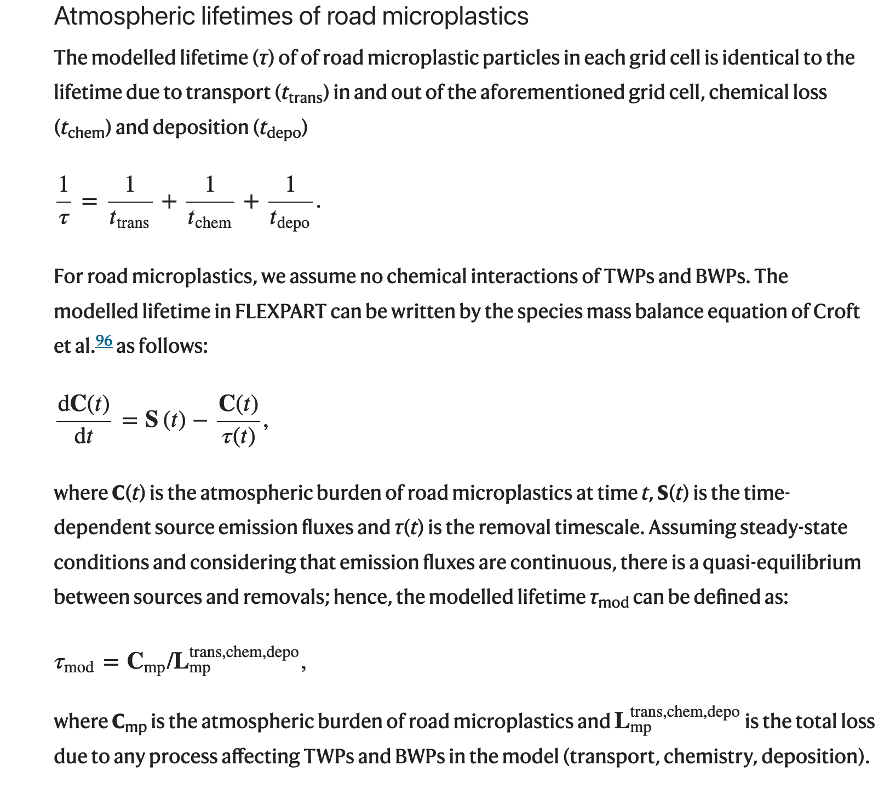

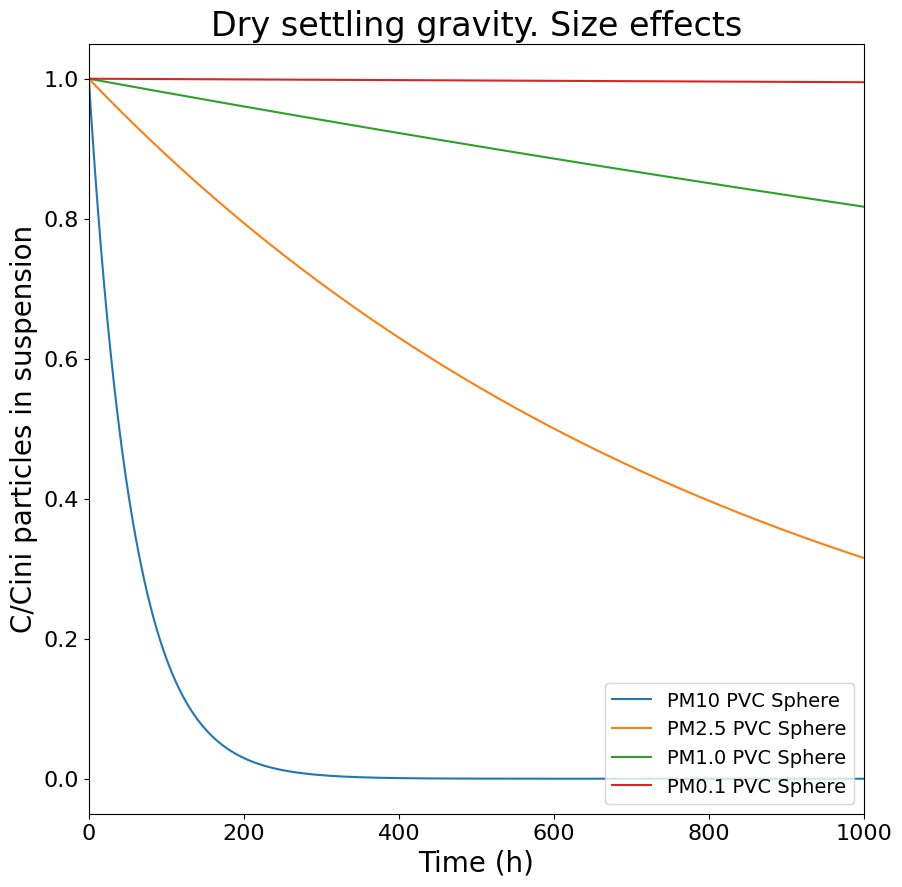

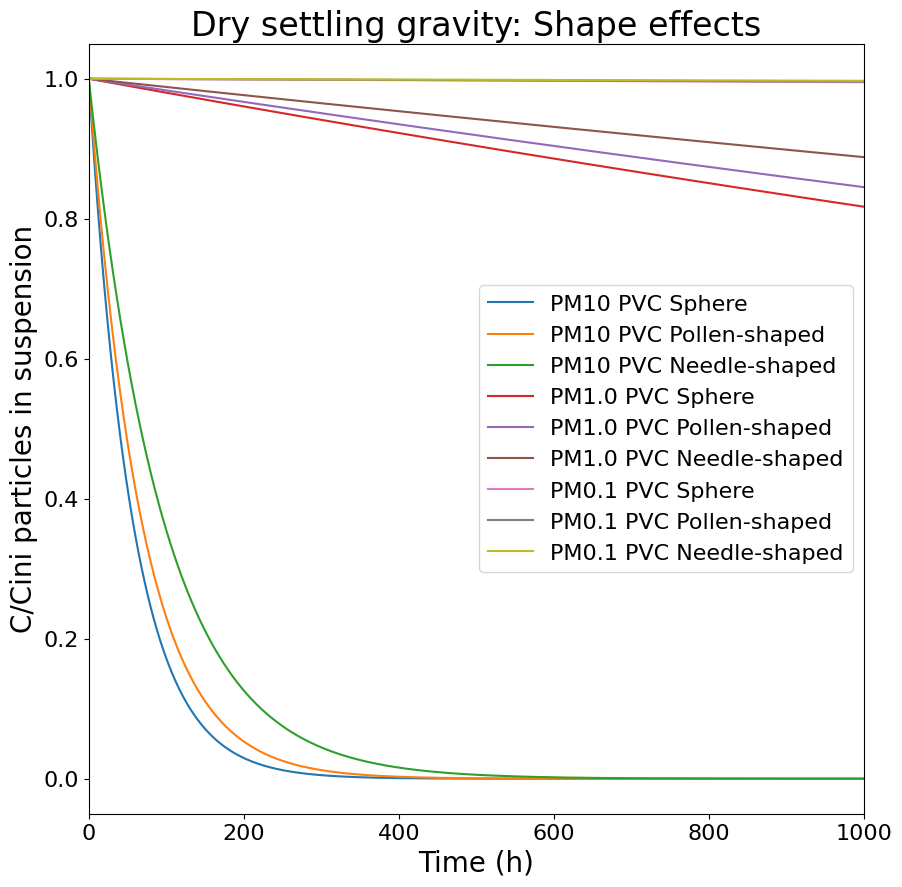

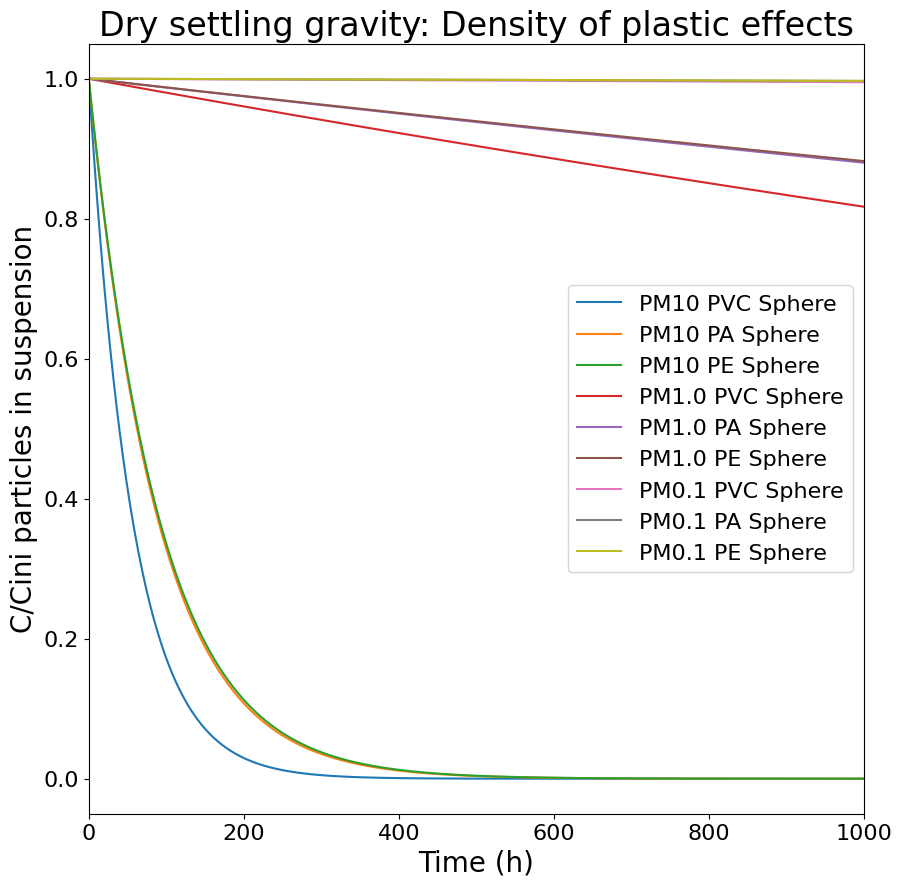

In [32]:
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

import matplotlib.pyplot as plt



# Constants:
# ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
muAir = 1.789e-5 # [kg−1.s−1], dynamic viscosity of the air (Heigth, Temp dependent)
rhoAir = 1.1438 # [kg.m-3], density of air (Heigth, Temp dependent)
g0 = 9.81 # [m.s-2] gravitational acceleration on earth (Heigth dependent)
mfpAir = 6.609e-8 # [m] Mean free path on dry air, here at 23 C, 1 atm, from Jennings, S, 1988


# ___ Particles constants. Some parameters depend on Temperature and pressure
rhoPVC = 1580.0 # [kg.m-3], density of PVC
rhoPA  = 1000.0 # [kg.m-3], density of PA
rhoPE  =  980.0 # [kg.m-3], density of PE

# dPM1000 = 1.0e-3 # [m] Diameter of PM10... 10 :p >50 micrometer
# dPM100 = 100.0e-6 # [m] Diameter of PM10... 10 :p >50 micrometer
dPM10 = 10.0e-6 # [m] Diameter of PM10... 10 :p
dPM2_5 = 2.5e-6 # [m] Diameter of PM2_5
dPM1  =  1.0e-6 # [m] Diameter of PM1
dPM0_1  =  0.1e-6 # [m] Diameter of PM1



    
# Constant for Cunningham correction, here from Jennings, S, 1988
A1 = 1.257
A2 = 0.400
A3 = 1.100



#--- Time line
t = np.arange(0.0, 3600000, 3600.0) # [s] arrange for values of delta t, linspace for a number linspace ;) 


C0 = [15.0, 15.0, 15.0, 15.0] 


'''
Pollen-shaped (rugosity): 1.2 
Spherical shape : 1.0
Plate-shaped : 1.5
Cube-shaped : 1.3
Needle-shaped : 1.7 
'''


h = 1000.0 # Maximum heigth of settling, here the heigth of the boundary layer ~ 1000 m


def wetSettling(C, t, d, h, rho, shape):
    
    # Calculate the settling velocity
    kg = np.multiply(d,d) 
    kg = kg * g0 / (18.0 * muAir)
    k = np.multiply(kg, (rho - rhoAir))


    # Calculate the Cunningham correction
    Kn = np.divide((2.0 * mfpAir), d)
    Cc = 1.0 + Kn * (A1 + A2 * np.exp(np.divide(-A3, Kn)))

    elt = np.multiply(k, Cc)  # [m.s-1] / [m] The Boundary layer heigth
    elt  = elt / (h * shape)
    dCdt = -elt * C # [C * s-1]
    return dCdt


d = [dPM10, dPM2_5, dPM1, dPM0_1] # All diameter of interest


CspherePVC = odeint(wetSettling, C0, t, args=(d, h, rhoPVC, 1.0))
CpollenPVC = odeint(wetSettling, C0, t, args=(d, h, rhoPVC, 1.2))
CneedlePVC = odeint(wetSettling, C0, t, args=(d, h, rhoPVC, 1.7))

CspherePA = odeint(wetSettling, C0, t, args=(d, h, rhoPA, 1.0))
CspherePE = odeint(wetSettling, C0, t, args=(d, h, rhoPE, 1.0))


## -------- Plot data --------------------------------

th = t/3600.0 # Transform seconds to hours for plots

#----- Size effects -------------------------------
fig = plt.figure(figsize=(10,10))

plt.plot(th,CspherePVC[:,0]/15.0,label='PM10 PVC Sphere')
plt.plot(th,CspherePVC[:,1]/15.0,label='PM2.5 PVC Sphere')
plt.plot(th,CspherePVC[:,2]/15.0,label='PM1.0 PVC Sphere')
plt.plot(th,CspherePVC[:,3]/15.0,label='PM0.1 PVC Sphere')

plt.xlabel('Time (h)', fontsize=20)
plt.ylabel('C/Cini particles in suspension', fontsize=20)
plt.legend(loc='lower right', prop={'size': 14})
plt.xlim([0,1000])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Dry settling gravity. Size effects", fontsize=24)
plt.savefig('DrySettling_Size.png', dpi=150)


#----- Shape effects -------------------------------
fig = plt.figure(figsize=(10,10))

plt.plot(th,CspherePVC[:,0]/15.0,label='PM10 PVC Sphere')
plt.plot(th,CpollenPVC[:,0]/15.0,label='PM10 PVC Pollen-shaped')
plt.plot(th,CneedlePVC[:,0]/15.0,label='PM10 PVC Needle-shaped')

plt.plot(th,CspherePVC[:,2]/15.0,label='PM1.0 PVC Sphere')
plt.plot(th,CpollenPVC[:,2]/15.0,label='PM1.0 PVC Pollen-shaped')
plt.plot(th,CneedlePVC[:,2]/15.0,label='PM1.0 PVC Needle-shaped')

plt.plot(th,CspherePVC[:,3]/15.0,label='PM0.1 PVC Sphere')
plt.plot(th,CpollenPVC[:,3]/15.0,label='PM0.1 PVC Pollen-shaped')
plt.plot(th,CneedlePVC[:,3]/15.0,label='PM0.1 PVC Needle-shaped')

plt.xlabel('Time (h)', fontsize=20)
plt.ylabel('C/Cini particles in suspension', fontsize=20)
plt.xlim([0,1000])
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Dry settling gravity: Shape effects", fontsize=24)
plt.savefig('DrySettling_Shape.png', dpi=150)


#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,10))
plt.plot(th,CspherePVC[:,0]/15.0,label='PM10 PVC Sphere')
plt.plot(th,CspherePA[:,0]/15.0,label='PM10 PA Sphere')
plt.plot(th,CspherePE[:,0]/15.0,label='PM10 PE Sphere')

plt.plot(th,CspherePVC[:,2]/15.0,label='PM1.0 PVC Sphere')
plt.plot(th,CspherePA[:,2]/15.0,label='PM1.0 PA Sphere')
plt.plot(th,CspherePE[:,2]/15.0,label='PM1.0 PE Sphere')

plt.plot(th,CspherePVC[:,3]/15.0,label='PM0.1 PVC Sphere')
plt.plot(th,CspherePA[:,3]/15.0,label='PM0.1 PA Sphere')
plt.plot(th,CspherePE[:,3]/15.0,label='PM0.1 PE Sphere')

plt.xlabel('Time (h)', fontsize=20)
plt.ylabel('C/Cini particles in suspension', fontsize=20)
plt.xlim([0,1000])
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Dry settling gravity: Density of plastic effects", fontsize=24)
plt.savefig('DrySettling_Plastics.png', dpi=150)


    

## 2. In cloud scavenging . <a class="anchor" id="8.InCloudScavenging"></a>

In [33]:
import math
import numpy as np

T = 298.15 # [K] Temperature 
#T = 273.15 # [K] Temperature 

# Constants:
# ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
muAir = 1.789e-5 # [kg−1.s−1], dynamic viscosity of the air (Heigth, Temp dependent)
rhoAir = 1.1438 # [kg.m-3], density of air (Heigth, Temp dependent)
g0 = 9.81 # [m.s-2] gravitational acceleration on earth (Heigth dependent)
mfpAir = 6.609e-8 # [m] Mean free path on dry air, here at 23 C, 1 atm, from Jennings, S, 1988
R = 8.314462# [J.K-1] Perfect gas constant

Mw = 0.01802 #[kg.mol-1] molar mass of water
rho_W = 997.1 #[kg.m-3], density of Water at T = 298.15 K
sigma_W = 0.072 #[Nm−1] surface tension of Water at 298.15 K


# From https://static-content.springer.com/esm/art%3A10.1038%2Fs41561-022-01051-9/MediaObjects/41561_2022_1051_MOESM1_ESM.pdf
# At T= 273.15K
T = 273.15
Mw = 0.018015 #[kg.mol-1] molar mass of water
rho_W = 999.87 #[kg.m-3], density of Water at T = 273.15 K
sigma_W = 0.0756 #[Nm−1] surface tension of Water at 273.15 K




A = 4.0*Mw*sigma_W/(R*rho_W)
print('A=', A)

A = A/T

#------Particles parameters-----------------------
pd = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
               5.5, 6.0, 8.0, 8.5, 9.0, 9.5])
pd = pd*1.0e-9
particleDiameters = np.concatenate((pd, 10.0*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e2*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e3*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e4*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e5*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e6*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e7*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e8*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e9*pd))



def criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W):
    teta = np.radians(teta)    
    r = (particleDiameters/2.0)
    A = 2.0 * Mw * sigma_W / (R * rho_W)
    A = A / T
    wettability = (1.0-np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(r)))
    Sc = np.exp(A / r) + wettability 

    return Sc


teta = 0.0
Sc0 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 2.0
Sc02 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 4.0
Sc04 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 6.0
Sc06 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 8.0
Sc08 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 12.0
Sc12 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 0.0
Sc0 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 5.0
Sc05 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 10.0
Sc10 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 15.0
Sc15 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)


teta = 50.0
Sc50 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 60.0
Sc60 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 70.0
Sc70 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 80.0
Sc80 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 90.0
Sc90 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)


A= 6.552972757297716e-07


In [34]:
def findDiameterScInClouds(Sc, particleDiameters, RH):
    # Trouvez l'indice de la première occurrence de Sc <= 100.
    first_index = np.where(Sc <= RH)[0]
    if any(first_index):
        print( particleDiameters[first_index[0]] )
        return particleDiameters[first_index[0]]        
    else:
        print('No particle in the domain')
        return None  # Si aucune valeur ne satisfait la condition.    
    
print("--PVC-----")
teta = 92.10
ScPVC = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)
findDiameterScInClouds(ScPVC, particleDiameters, 100)
findDiameterScInClouds(ScPVC, particleDiameters, 101)

print("--ABS-----")
teta = 94.54
ScABS = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

print("--PMMA-----")
teta = 83.87
ScPMMA = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

print("--PC-----")
teta = 81.71
ScPC = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

print("--PET-----")
teta = 69.50
ScPET = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)
print("   RH=100.0")
findDiameterScInClouds(ScPET, particleDiameters, 100)
print("   RH=101.0")
findDiameterScInClouds(ScPET, particleDiameters, 101)

print("--PE-----")
teta = 64.30
ScPE = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)
print("   RH=100.0")
findDiameterScInClouds(ScPE, particleDiameters, 100)
print("   RH=101.0")
findDiameterScInClouds(ScPE, particleDiameters, 101)
#display(ScPE)
print("--PS-----")
teta = 57.90 
ScPS = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)
print("   RH=100.0")
findDiameterScInClouds(ScPS, particleDiameters, 100)
print("   RH=101.0")
findDiameterScInClouds(ScPS, particleDiameters, 101)



--PVC-----
1e-09
1e-09
--ABS-----
--PMMA-----
--PC-----
--PET-----
   RH=100.0
1e-09
   RH=101.0
1e-09
--PE-----
   RH=100.0
1e-09
   RH=101.0
1e-09
--PS-----
   RH=100.0
1e-09
   RH=101.0
1e-09


1e-09

### When a fixed saturation S exists, all particles whose critical saturation Sc exceeds S come to a stable equilibrium size at the appropriate point on their Köhler curve.     
### All particles whose Sc is below S become activated and grow indefinitely as long as S > Sc.

Text(0.0055, 1.032, 'S=1.03')

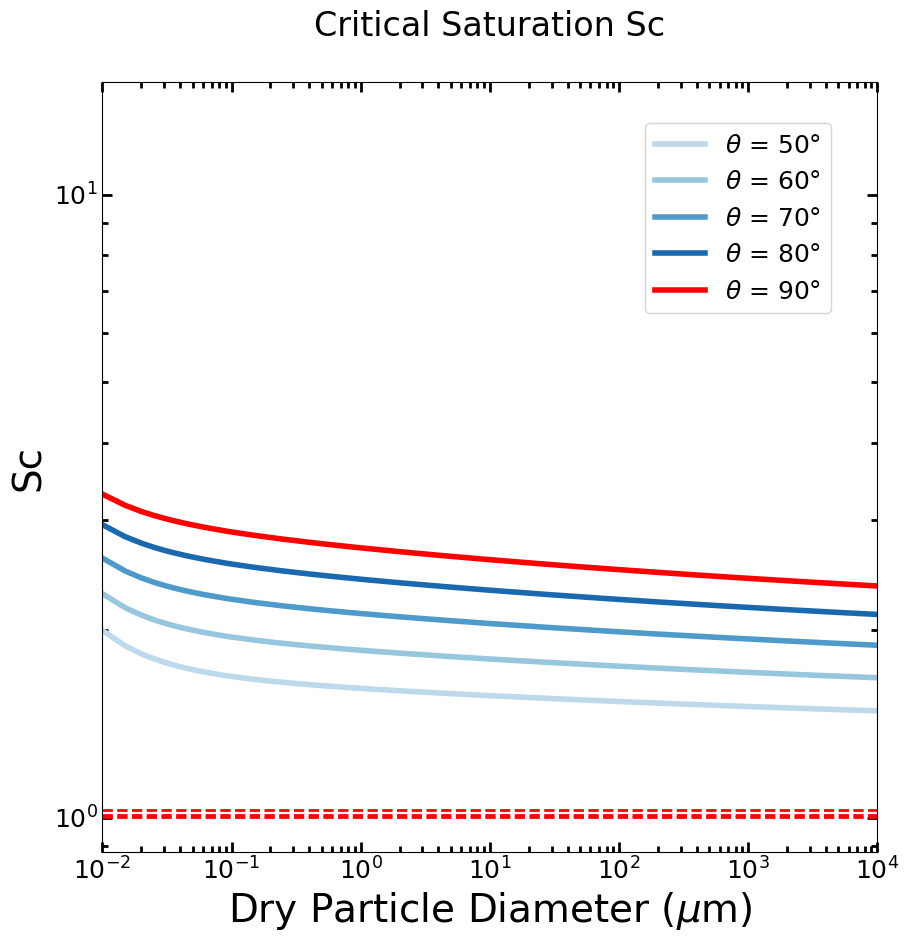

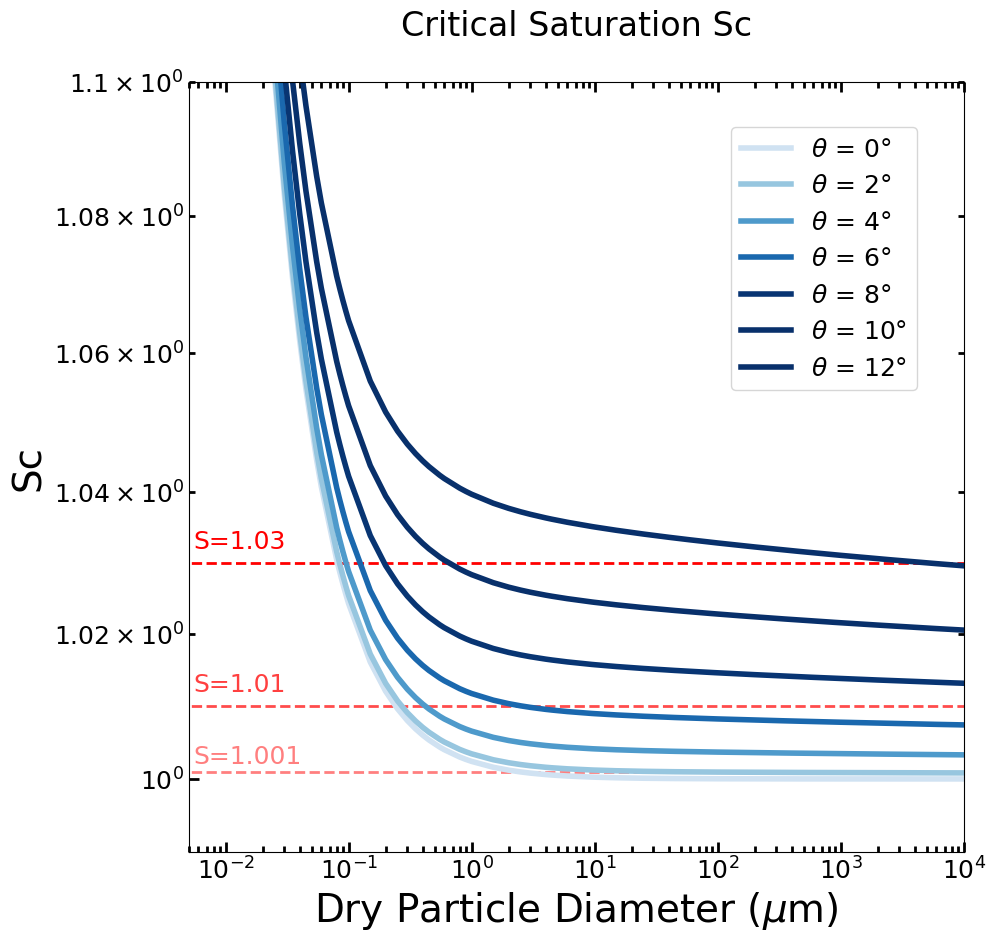

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt

pi = math.pi


#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,10))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))

plt.plot([1.0e-3, 1.0e5], [1.001, 1.001], '--', linewidth=2, color = 'r')
plt.plot([1.0e-3, 1.0e5], [1.010, 1.010], '--', linewidth=2, color = 'r')
plt.plot([1.0e-3, 1.0e5], [1.030, 1.030], '--', linewidth=2, color = 'r')
#plt.plot([1.0e-3, 1.0e5], [201.0, 201.0], ':', linewidth=4, color = 'k')


#plt.plot(particleDiameters*1e6/2.0, Sc0,  linewidth=4, label=r'$\theta$ = 0°', color = cmapBlue(50))
#plt.plot(particleDiameters*1e6/2.0, Sc05,linewidth=4, label=r'$\theta$ = 5°', color = cmapBlue(100))
#plt.plot(particleDiameters*1e6/2.0, Sc10,linewidth=4, label=r'$\theta$ = 10°', color = cmapBlue(150))
#plt.plot(particleDiameters*1e6/2.0, Sc15,linewidth=4, label=r'$\theta$ = 15°', color = cmapBlue(200))


plt.plot(particleDiameters*1e6, Sc50, linewidth=4, label=r'$\theta$ = 50°', color = cmapBlue(70))
plt.plot(particleDiameters*1e6, Sc60, linewidth=4, label=r'$\theta$ = 60°', color = cmapBlue(100))
plt.plot(particleDiameters*1e6, Sc70, linewidth=4, label=r'$\theta$ = 70°', color = cmapBlue(150))
plt.plot(particleDiameters*1e6, Sc80, linewidth=4, label=r'$\theta$ = 80°', color = cmapBlue(200))
plt.plot(particleDiameters*1e6, Sc90, linewidth=4, label=r'$\theta$ = 90°', color = 'r')


plt.xscale('log')
plt.yscale('log')
#plt.ylim([500.0e-1,100.0e2])

#plt.ylim([90.0,200.0])
plt.xlim([1.0e-2,1.0e4])

#plt.ylim([0.99,1.1])



# Add labels and title
plt.xlabel(r'Dry Particle Diameter ($\mu$m)', fontsize=28)
#plt.ylabel('RH %', fontsize=28)
plt.ylabel('Sc', fontsize=28)

plt.title("Critical Saturation Sc\n" , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 0.7e-0 # x-coordinate of the legend
legend_y = 0.7e-0  # y-coordinate of the legend
plt.legend(fontsize=18, loc=(legend_x, legend_y))

#plt.savefig('CriticalSaturationCurves_Wettability_plastics.png', bbox_inches="tight", dpi=150)


#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,10))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))




plt.plot([1.0e-3, 1.0e5], [1.001, 1.001], '--', linewidth=2, color = 'r', alpha=0.5)
plt.plot([1.0e-3, 1.0e5], [1.010, 1.010], '--', linewidth=2, color = 'r', alpha=0.7)
plt.plot([1.0e-3, 1.0e5], [1.030, 1.030], '--', linewidth=2, color = 'r', alpha=1.0)
#plt.plot([1.0e-3, 1.0e5], [201.0, 201.0], ':', linewidth=4, color = 'k')


plt.plot(particleDiameters*1e6, Sc0,  linewidth=4, label=r'$\theta$ = 0°', color = cmapBlue(50))
plt.plot(particleDiameters*1e6, Sc02, linewidth=4, label=r'$\theta$ = 2°', color = cmapBlue(100))
plt.plot(particleDiameters*1e6, Sc04, linewidth=4, label=r'$\theta$ = 4°', color = cmapBlue(150))
plt.plot(particleDiameters*1e6, Sc06, linewidth=4, label=r'$\theta$ = 6°', color = cmapBlue(200))
plt.plot(particleDiameters*1e6, Sc08, linewidth=4, label=r'$\theta$ = 8°', color = cmapBlue(250))
plt.plot(particleDiameters*1e6, Sc10, linewidth=4, label=r'$\theta$ = 10°', color = cmapBlue(300))
plt.plot(particleDiameters*1e6, Sc12, linewidth=4, label=r'$\theta$ = 12°', color = cmapBlue(350))

#plt.plot(particleDiameters*1e6/2.0, Sc05,linewidth=4, label=r'$\theta$ = 5°', color = cmapBlue(100))
#plt.plot(particleDiameters*1e6/2.0, Sc10,linewidth=4, label=r'$\theta$ = 10°', color = cmapBlue(150))
#plt.plot(particleDiameters*1e6/2.0, Sc15,linewidth=4, label=r'$\theta$ = 15°', color = cmapBlue(200))





plt.xscale('log')
plt.yscale('log')
#plt.ylim([500.0e-1,100.0e2])

#plt.ylim([90.0,200.0])
plt.xlim([5.0e-3,1.0e4])

plt.ylim([0.99,1.1])



# Add labels and title
plt.xlabel(r'Dry Particle Diameter ($\mu$m)', fontsize=28)
#plt.ylabel('RH %', fontsize=28)
plt.ylabel('Sc', fontsize=28)

plt.title("Critical Saturation Sc\n" , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 0.7e-0 # x-coordinate of the legend
legend_y = 0.6e-0  # y-coordinate of the legend
plt.legend(fontsize=18, loc=(legend_x, legend_y))

plt.text(5.5e-3, 1.002e0, r'S=1.001', rotation='horizontal', fontsize=18, color = 'r', alpha=0.5)  # Position: (0.04, 0.5)
plt.text(5.5e-3, 1.012e0, r'S=1.01', rotation='horizontal', fontsize=18, color = 'r', alpha=0.75)  # Position: (0.04, 0.5)
plt.text(5.5e-3, 1.032e0, r'S=1.03', rotation='horizontal', fontsize=18, color = 'r', alpha=1.0)  # Position: (0.04, 0.5)


#plt.savefig('CriticalSaturationCurves_Wettability_Zoom.png', bbox_inches="tight", dpi=150)


# Water saturation required to activate particles containing slightly soluble components (SSCs): hygroscopy, solubility and deliquescence relative humidity (DRH) impact

## Figure 1 from https://acp.copernicus.org/preprints/8/5939/2008/acpd-8-5939-2008.pdf
## Petters and Kreidenweis, Atmos. Chem. Phys. Discuss., 8, 5939–5955, 2008 
## see also https://acp.copernicus.org/articles/8/6273/2008/acp-8-6273-2008.pdf

### 0 < Ci < ${\infty}$ : the solubility (m3.m-3) ). 0 is not soluble, ${\infty}$ is totally soluble <br> 0 < ki < ${\infty}$ : The hygroscopicity. The value of κ increases with increasing hygroscopicity. Thus, κ will be 0 for a non-hygroscopic particle, above 1 for more hygroscopic particles and up to around 1.5 for the most hygroscopic particles such as NaCl  From https://acp.copernicus.org/articles/19/1505/2019/. 

ki:0.1;Ci0.1; Excel:1.100, Us:  1.642455404340848
ki:0.5;Ci0.1; Excel:0.166, Us:  0.23142149610435592
ki:0.5;Ciinfini; Excel:0.166, Us:  0.23142149610435592



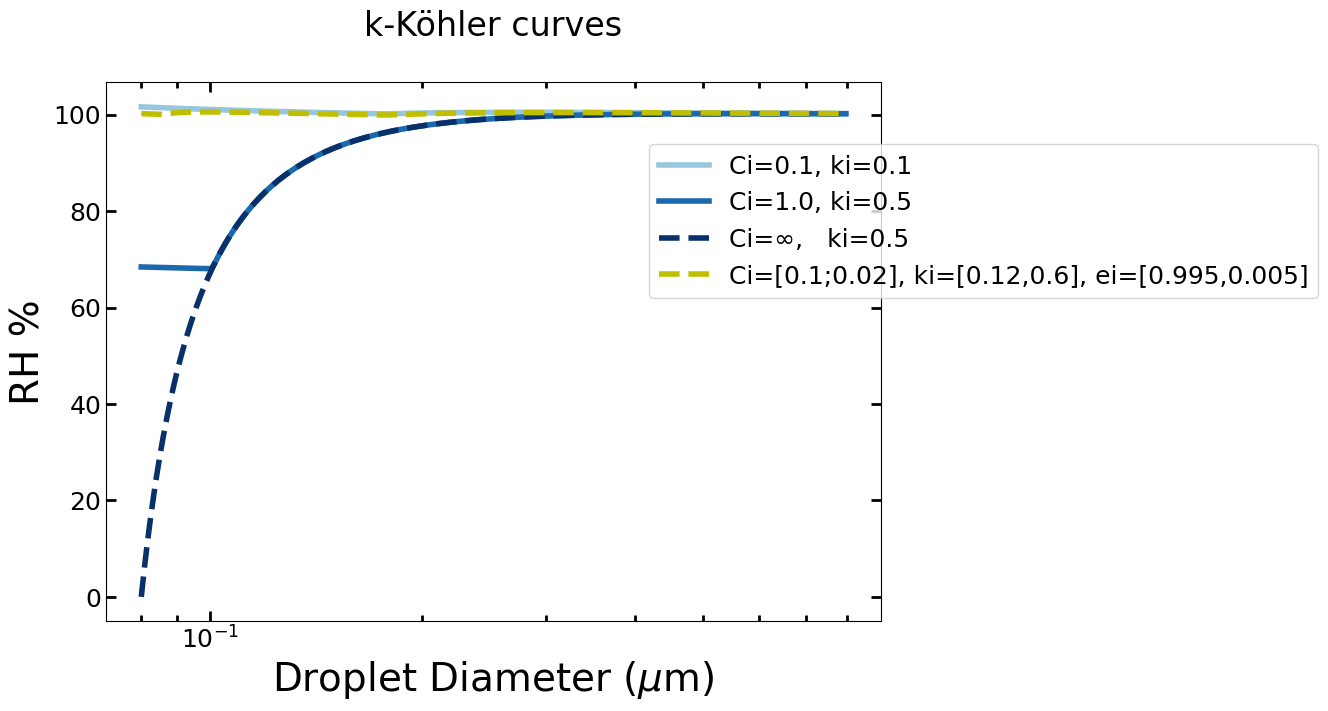

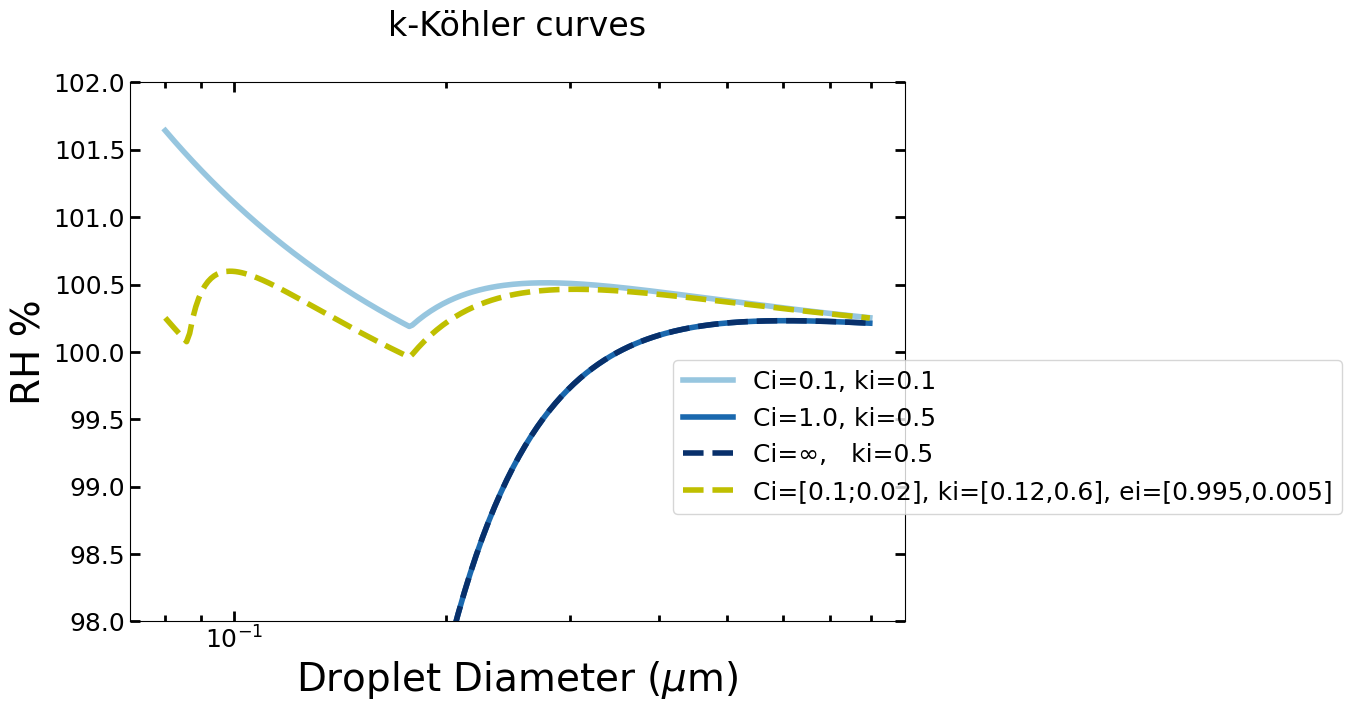

In [36]:
# Import necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt



# From https://acp.copernicus.org/preprints/8/5939/2008/acpd-8-5939-2008.pdf
# Definition of the function Sc; see Table 2 for details
#Find the maximum critical solubility for CCN
def Saturation_Solubility (Dd, ki, Ci, ei, T=298.15, sigma=0.072, gmax=10, g = (1.0 + 1.0e-11), inc=1.01):
    A = 8.69251e-6 * sigma / T
    
    # Initialize
    Sc = 0  
    RH = np.array([])
    Droplet_Diameter = np.array([])
    Dd3 = Dd**3.0
    
    def S(D, k, A):
        D3=D**3
        result = D3 - Dd3
        result = result / (D3 - (Dd3 * (1.0 - k)))
        result = result * math.exp(A / D)                   
        return result

    
    # Iterate while g is less than or equal to gmax
    while g <= gmax:
        xi = Ci * ((g ** 3.0) - 1.0) / ei
        Hi = np.where(xi < 1, xi, 1)
        k = np.sum(ki * ei * Hi)
        
        DropDiam = g * Dd
        Svalue = S(DropDiam, k, A)
        
        Sc = max(Svalue, Sc)
        RH = np.append(RH, Svalue)
        Droplet_Diameter = np.append(Droplet_Diameter,DropDiam)
        
        g *= inc

    return Sc, RH, Droplet_Diameter

    
    
# Test with Excel fils from the author:
# https://github.com/mdpetters/kappa
                                
Dd = 80.0e-9

ki = np.array([0.1])   # hygroscopy
Ci = np.array([0.1])   # Solubility
ei = np.array([1.0])   # Volume fraction                             

Sc_ki01_Ci01, RH_ki01_Ci01, dropletSize = Saturation_Solubility(Dd, ki, Ci, ei)
print("ki:0.1;Ci0.1; Excel:1.100, Us: ", (Sc_ki01_Ci01 -1)*100)


ki = np.array([0.5])
Ci = np.array([1.0])
ei = np.array([1.0])                                

Sc_ki05_Ci1, RH_ki05_Ci1, dropletSize = Saturation_Solubility(Dd, ki, Ci, ei)
print("ki:0.5;Ci0.1; Excel:0.166, Us: ", (Sc_ki05_Ci1 -1)*100)
 
    
ki = np.array([0.5])
Ci = np.array([np.inf])
ei = np.array([1.0])                                

Sc_ki05_Ciinf, RH_ki05_Ciinf, dropletSize = Saturation_Solubility(Dd, ki, Ci, ei)
print("ki:0.5;Ciinfini; Excel:0.166, Us: ", (Sc_ki05_Ciinf -1)*100)
    
ki = np.array([0.12, 0.6])
Ci = np.array([0.1, 0.02])
ei = np.array([0.995, 0.005])                                

Sc_mixed, RH_mixed, dropletSize = Saturation_Solubility(Dd, ki, Ci, ei)
    
print()

                                

    
#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,7))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))


plt.plot(dropletSize*1e6, RH_ki01_Ci01*100,  linewidth=4, label=r'Ci=0.1, ki=0.1', color = cmapBlue(100))
plt.plot(dropletSize*1e6, RH_ki05_Ci1*100,  linewidth=4, label=r'Ci=1.0, ki=0.5', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_ki05_Ciinf*100,"--",  linewidth=4, label='Ci=\u221E,   ki=0.5', color = cmapBlue(300))
plt.plot(dropletSize*1e6, RH_mixed*100,"--",  linewidth=4, label='Ci=[0.1;0.02], ki=[0.12,0.6], ei=[0.995,0.005]', color = "y")

plt.xscale('log')

# Add labels and title
plt.xlabel(r'Droplet Diameter ($\mu$m)', fontsize=28)
plt.ylabel('RH %', fontsize=28)

plt.title("k-Köhler curves\n" , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 0.7e-0 # x-coordinate of the legend
legend_y = 0.6e-0  # y-coordinate of the legend
plt.legend(fontsize=18, loc=(legend_x, legend_y))    


#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,7))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))


plt.plot(dropletSize*1e6, RH_ki01_Ci01*100,  linewidth=4, label=r'Ci=0.1, ki=0.1', color = cmapBlue(100))
plt.plot(dropletSize*1e6, RH_ki05_Ci1*100,  linewidth=4, label=r'Ci=1.0, ki=0.5', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_ki05_Ciinf*100,"--",  linewidth=4, label='Ci=\u221E,   ki=0.5', color = cmapBlue(300))
plt.plot(dropletSize*1e6, RH_mixed*100,"--",  linewidth=4, label='Ci=[0.1;0.02], ki=[0.12,0.6], ei=[0.995,0.005]', color = "y")


plt.xscale('log')

plt.ylim([98.0,102.0])
#plt.xlim([5.0e-3,1.0e4])




# Add labels and title
plt.xlabel(r'Droplet Diameter ($\mu$m)', fontsize=28)
plt.ylabel('RH %', fontsize=28)

plt.title("k-Köhler curves\n" , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 0.7e-0 # x-coordinate of the legend
legend_y = 0.2e-0  # y-coordinate of the legend
plt.legend(fontsize=18, loc=(legend_x, legend_y))    





### Plastics particles surounded by salt NaCl. 
### Data of NaCl from https://acp.copernicus.org/articles/8/6273/2008/acp-8-6273-2008.pdf table 1 Petters and Kreidenweis (2007)

## N.b.: surface fraction = volumeFraction **(2/3)

---------------> 65.46892916115695
---------------> 59.159123893959844
---------------> 47.537797105585106
---------------> 33.11750365791231
---------------> 14.645119690875395
---------------> 0.0
[196.54651483 180.4569082  153.64089715 126.8248861  105.37207726
 100.00887505]



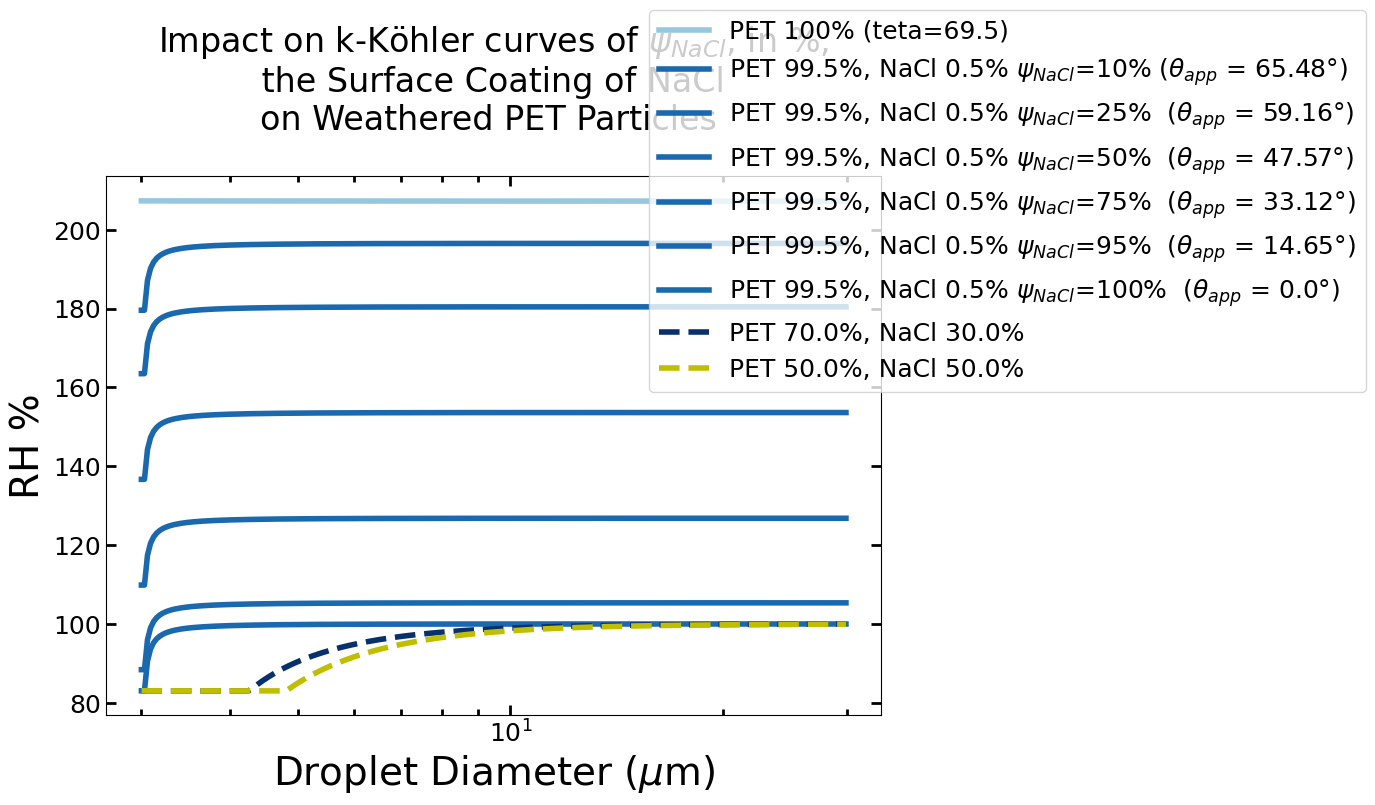

In [37]:
# Import necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt



# From https://acp.copernicus.org/preprints/8/5939/2008/acpd-8-5939-2008.pdf
# Definition of the function Sc; see Table 2 for details
# Find the maximum critical solubility for CCN
# Input: Dd: the dry diameter of the particle,
def Saturation_Solubility (Dd, ki, Ci, ei, T=298.15, sigma=0.072, gmax=10, g = (1.0 + 1.0e-11), inc=1.01):
    A = 8.69251e-6 * sigma / T
    
    # Initialize
    Sc = 0  
    RH = np.array([])
    Droplet_Diameter = np.array([])
    Dd3 = Dd**3.0
    
    def S(D, k, A):
        D3 = D**3
        result = D3 - Dd3
        result = result / (D3 - (Dd3 * (1.0 - k)))
        result = result * exp(A / D)                   
        return result

    
    # Iterate while g is less than or equal to gmax
    while g <= gmax:
        xi = Ci * ((g ** 3.0) - 1.0) / ei
        Hi = np.where(xi < 1, xi, 1)
        k = np.sum(ki * ei * Hi)
        
        DropDiam = g * Dd
        Svalue = S(DropDiam, k, A)
        
        Sc = max(Svalue, Sc)
        RH = np.append(RH, Svalue)
        Droplet_Diameter = np.append(Droplet_Diameter,DropDiam)
        
        g *= inc

    return Sc, RH, Droplet_Diameter

def criticalSaturation_Wettability (Dd, teta, T=298.15, sigma=0.072, gmax=10, g = (1.0 + 1.0e-11), inc=1.01):    
    r = (Dd/2.0)
    A = 8.69251e-6 * sigma / T
    

    # Initialize
    Sc = 0  
    RH = np.array([])
    Droplet_Diameter = np.array([])
    
    def S(D, A, teta):
        teta = np.radians(teta)    

        wettability = (1.0-np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(r)))
        return np.exp(A / r) + wettability

    # Iterate while g is less than or equal to gmax
    while g <= gmax:
        xi = Ci * ((g ** 3.0) - 1.0) / ei
        Hi = np.where(xi < 1, xi, 1)
        k = np.sum(ki * ei * Hi)
        
        DropDiam = g * Dd
        Svalue = S(DropDiam, A, teta)
        
        Sc = max(Svalue, Sc)
        RH = np.append(RH, Svalue)
        Droplet_Diameter = np.append(Droplet_Diameter,DropDiam)
        
        g *= inc    
    
    return Sc, RH, Droplet_Diameter


# The Cassie eqn (5) is used to calculate the contact angle of a
# pure liquid on a heterogeneous, flat, rigid and chemically inert
# surface
def cassie_equation(fraction_surface, theta_intrinsic):
    # Convert angles to radians
    theta_rad = np.radians(theta_intrinsic)
    
    # Calculate cosines of angles
    cos_theta = np.cos(theta_rad)
    
    # Calculate Cassie equation
    cos_theta_apparent = np.sum(fraction_surface * cos_theta) 
    
    # Convert back to degrees
    theta_apparent = np.degrees(np.arccos(cos_theta_apparent))
    
    return theta_apparent




def Saturation_Solubility_Wettability (Dd, ki, Ci, ei, teta, T=298.15, sigma=0.072, gmax=10, g = (1.0 + 1.0e-11), inc=1.01):

    A = 8.69251e-6 * sigma / T
            
    
    # Initialize
    Sc = 0  
    RH = np.array([])
    Droplet_Diameter = np.array([])
    Dd3 = Dd**3.0
    
    def S(D, k, A, teta):
        teta = np.radians(teta)    

        D3 = D**3
        result = D3 - Dd3
        result = result / (D3 - (Dd3 * (1.0 - k)))
        result = result * math.exp(A / D)
        wettability = (1.0 - np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(Dd/2.0)))
        return (result + wettability)

    
    # Iterate while g is less than or equal to gmax
    while g <= gmax:
        xi = Ci * ((g ** 3.0) - 1.0) / ei
        Hi = np.where(xi < 1, xi, 1)
        k = np.sum(ki * ei * Hi)
        
        DropDiam = g * Dd
        Svalue = S(DropDiam, k, A, teta)
        
        Sc = max(Svalue, Sc)
        RH = np.append(RH, Svalue)
        Droplet_Diameter = np.append(Droplet_Diameter,DropDiam)
        
        g *= inc

    return Sc, RH, Droplet_Diameter


Dd = 3.0e-6


# PET
ki_PET = 0.0   # nSI,  
Ci_PET = 0.0    # m3.m-3, 
teta_PET = 69.50 

# NaCl
ki_NaCl = 1.28    # SI, Hygroscopicity parameter κappa, Data from Petters, M. D. and Kreidenweis, S. M., Atmos. Chem. Phys., 7, 1961–1971, 2007, http://www.atmos-chem-phys.net/7/1961/2007/.
Ci_NaCl = 1.6e-1  # m3.m-3, Solubility, Data from Sullivan R. C., Moore M., Petters, M. D., Kreidenweis S. M., Roberts G. C., and Prather, K. A.: Calcium mineral dust particles as CCN
teta_NaCl = 0.0  # degree

ki = np.array([ki_PET])
Ci = np.array([Ci_PET])
tetai = np.array([teta_PET]) 
ei = np.array([1.0])               # Volume fraction                  
Sc_NaCl_0p, RH_NaCl_0p, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, tetai)


ki = np.array([ki_PET, ki_NaCl])
Ci = np.array([Ci_PET, Ci_NaCl])

ei = np.array([0.995, 0.005])          # Volume fraction 

tetai = np.array([teta_PET, teta_NaCl]) 

surface_fraction = np.array([0.9, 0.1])
teta_apparent_S10 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S10)
Sc_NaCl_05p_S10, RH_NaCl_05p_S10, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta_apparent_S10)

surface_fraction = np.array([0.75, 0.25])
teta_apparent_S25 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S25)
Sc_NaCl_05p_S25, RH_NaCl_05p_S25, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta_apparent_S25)
 
surface_fraction = np.array([0.50, 0.50])
teta_apparent_S50 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S50)
Sc_NaCl_05p_S50, RH_NaCl_05p_S50, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta_apparent_S50)
    
surface_fraction = np.array([0.25, 0.75])
teta_apparent_S75 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S75)
Sc_NaCl_05p_S75, RH_NaCl_05p_S75, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta_apparent_S75)
       
surface_fraction = np.array([0.05, 0.95])
teta_apparent_S95 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S95)
Sc_NaCl_05p_S95, RH_NaCl_05p_S95, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta_apparent_S95)
    
surface_fraction = np.array([0.0, 1.0])
teta_apparent_S100 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S100)
Sc_NaCl_05p_S100, RH_NaCl_05p_S100, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta_apparent_S100)
      
Sc_NaCl_05p_S10 = np.array([Sc_NaCl_05p_S10, Sc_NaCl_05p_S25, Sc_NaCl_05p_S50, Sc_NaCl_05p_S75, Sc_NaCl_05p_S95, Sc_NaCl_05p_S100])
print (Sc_NaCl_05p_S10*100)    
    
ki = np.array([ki_PET, ki_NaCl])
Ci = np.array([Ci_PET, Ci_NaCl])
#tetai = np.array([teta_PET, teta_NaCl]) 
tetai = np.array([teta_NaCl]) 
ei = np.array([0.70, 0.30])                                
Sc_NaCl_30p, RH_NaCl_30p, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, tetai)

ki = np.array([ki_PET, ki_NaCl])
Ci = np.array([Ci_PET, Ci_NaCl])
#tetai = np.array([teta_PET, teta_NaCl]) 
tetai = np.array([teta_NaCl]) 
ei = np.array([0.50, 0.50])                                
Sc_NaCl_50p, RH_NaCl_50p, dropletSize = Saturation_Solubility_Wettability(Dd, ki, Ci, ei, tetai)
     
print()

                            
    
#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,7))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))


plt.plot(dropletSize*1e6, RH_NaCl_0p*100, linewidth=4, label=r'PET 100% (teta=69.5)', color = cmapBlue(100))
plt.plot(dropletSize*1e6, RH_NaCl_05p_S10*100, linewidth=4, label=r'PET 99.5%, NaCl 0.5% $\psi_{NaCl}$=10% ($\theta_{app}$ = 65.48°)', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_NaCl_05p_S25*100, linewidth=4, label=r'PET 99.5%, NaCl 0.5% $\psi_{NaCl}$=25%  ($\theta_{app}$ = 59.16°)', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_NaCl_05p_S50*100, linewidth=4, label=r'PET 99.5%, NaCl 0.5% $\psi_{NaCl}$=50%  ($\theta_{app}$ = 47.57°)', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_NaCl_05p_S75*100, linewidth=4, label=r'PET 99.5%, NaCl 0.5% $\psi_{NaCl}$=75%  ($\theta_{app}$ = 33.12°)', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_NaCl_05p_S95*100, linewidth=4, label=r'PET 99.5%, NaCl 0.5% $\psi_{NaCl}$=95%  ($\theta_{app}$ = 14.65°)', color = cmapBlue(200))
plt.plot(dropletSize*1e6, RH_NaCl_05p_S100*100, linewidth=4, label=r'PET 99.5%, NaCl 0.5% $\psi_{NaCl}$=100%  ($\theta_{app}$ = 0.0°)', color = cmapBlue(200))



plt.plot(dropletSize*1e6, RH_NaCl_30p*100,"--",  linewidth=4, label='PET 70.0%, NaCl 30.0%', color = cmapBlue(300))
plt.plot(dropletSize*1e6, RH_NaCl_50p*100,"--",  linewidth=4, label='PET 50.0%, NaCl 50.0%', color = "y")

plt.xscale('log')

# Add labels and title
plt.xlabel(r'Droplet Diameter ($\mu$m)', fontsize=28)
plt.ylabel('RH %', fontsize=28)

plt.title("Impact on k-Köhler curves of $\psi_{NaCl}$, in %,"+
          "\n the Surface Coating of NaCl "+
          "\non Weathered PET Particles \n " , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 0.7e-0 # x-coordinate of the legend
legend_y = 0.6e-0  # y-coordinate of the legend
plt.legend(fontsize=18, loc=(legend_x, legend_y))    


    




## Only Sc

A= 6.552972757297716e-07
---------------> 59.159123893959844
---------------> 47.537797105585106
---------------> 33.11750365791231
---------------> 14.645119690875395
---------------> 0.0
---------------> 59.159123893959844
---------------> 47.537797105585106
---------------> 33.11750365791231
---------------> 14.645119690875395
---------------> 0.0
---------------> 49.567713101007215
---------------> 40.03075589503077
---------------> 28.01195153384584
---------------> 12.427279367580248
[7.23385373 3.70559126 2.66237864 2.18910729 1.92262128 1.75398523
 1.63754067 1.55320638 1.43862314 1.39819792 1.29345499 1.27597346
 1.26068978 1.24716802 1.23514223 1.16260206 1.12859359 1.10898456
 1.09627485 1.0873883  1.08084741 1.07583212 1.06867399 1.06603404
 1.05892139 1.05769063 1.05660362 1.05563703 1.05477198 1.04940917
 1.04680911 1.04527289 1.0442543  1.04352554 1.04297522 1.04254247
 1.04189967 1.04165214 1.04093889 1.04080573 1.04068473 1.04057407
 1.04047226 1.03975606 1.03931842 1.

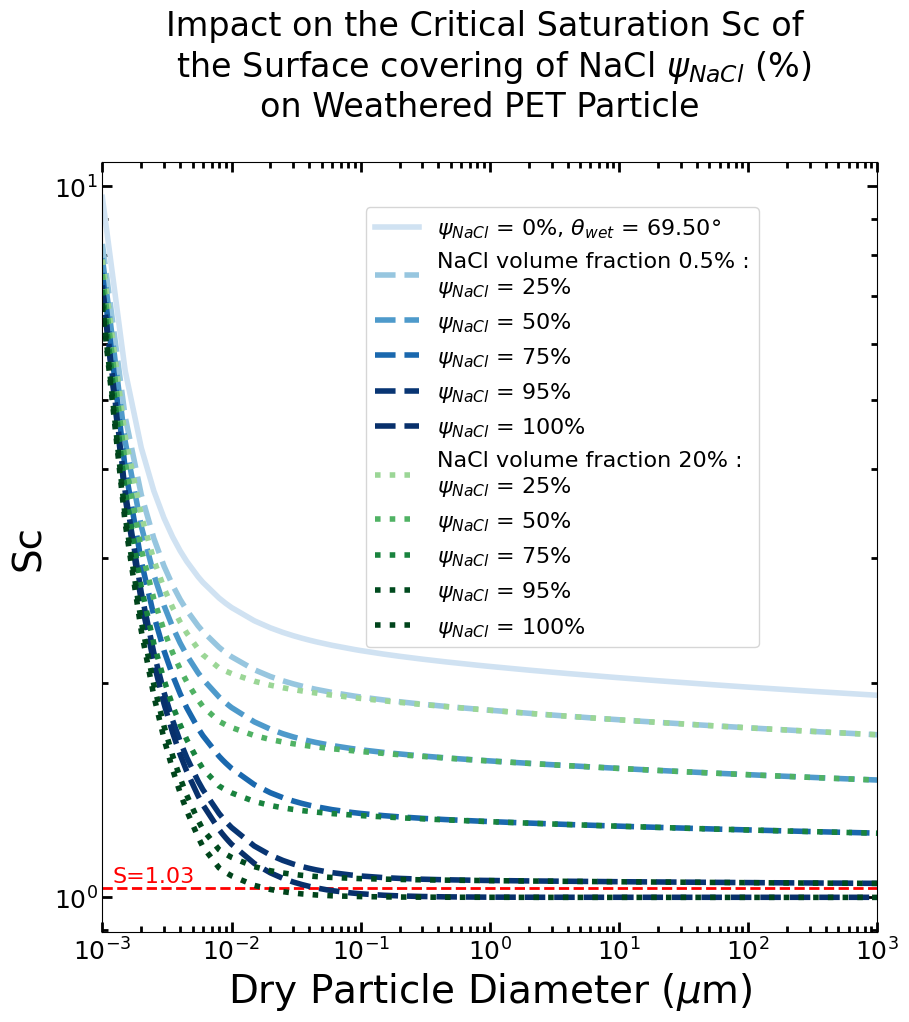

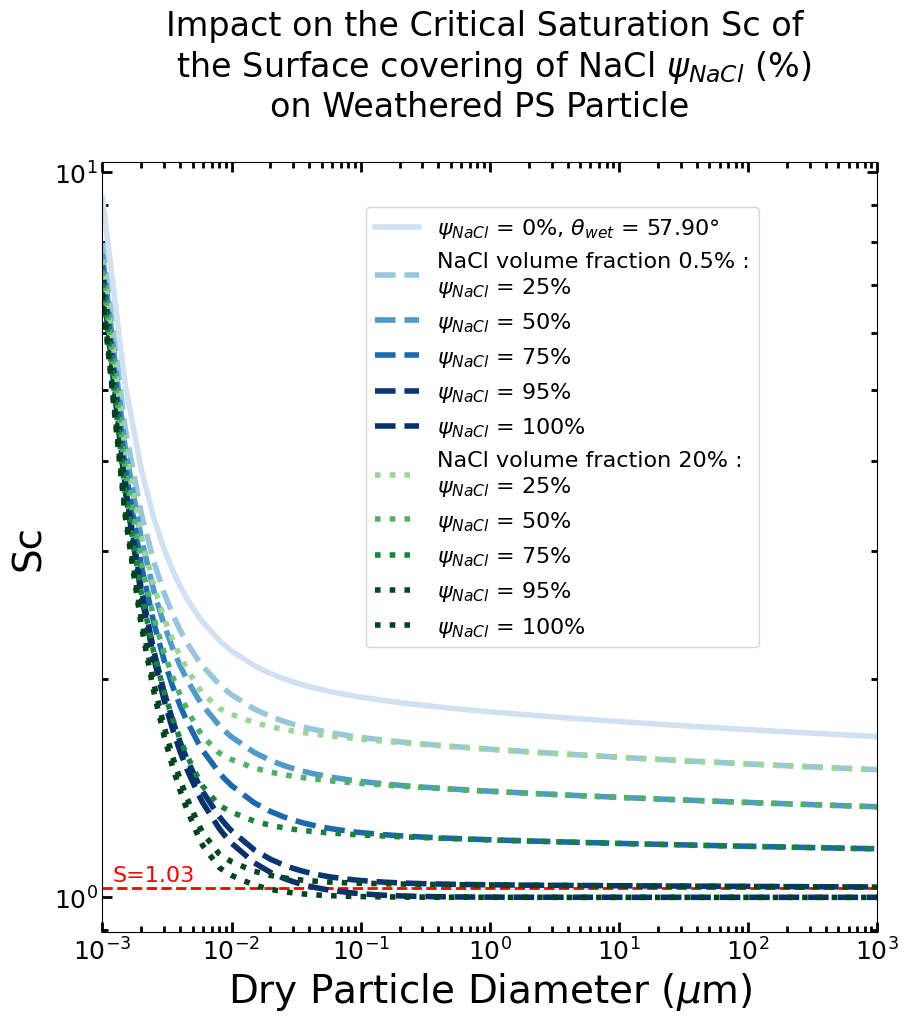

In [75]:
# The Cassie eqn (5) is used to calculate the contact angle of a
# pure liquid on a heterogeneous, flat, rigid and chemically inert
# surface
def cassie_equation(fraction_surface, theta_intrinsic):
    # Convert angles to radians
    theta_rad = np.radians(theta_intrinsic)
    
    # Calculate cosines of angles
    cos_theta = np.cos(theta_rad)
    
    # Calculate Cassie equation
    cos_theta_apparent = np.sum(fraction_surface * cos_theta) 
    
    # Convert back to degrees
    theta_apparent = np.degrees(np.arccos(cos_theta_apparent))
    
    return theta_apparent



def Saturation_Solubility_Wettability(Dd, ki, Ci, ei, teta, T=298.15, sigma=0.072, gmax=10, g=(1.0 + 1.0e-11), inc=1.01):

    A = 8.69251e-6 * sigma / T

    # Initialize
    Sc = np.zeros_like(Dd)
    Dd3 = Dd**3.0

    def S(D, k, A, teta):
        teta = np.radians(teta)

        D3 = D**3
        result = D3 - Dd3
        result = result / (D3 - (Dd3 * (1.0 - k)))
        result = result * np.exp(A / D)
        wettability = (1.0 - np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(Dd/2.0)))
        return (result + wettability)

    # Iterate while g is less than or equal to gmax
    while g <= gmax:
        xi = Ci * ((g ** 3.0) - 1.0) / ei
        Hi = np.where(xi < 1, xi, 1)
        k = np.sum(ki * ei * Hi)

        DropDiam = g * Dd
        Svalue = S(DropDiam, k, A, teta)

        Sc = np.maximum(Svalue, Sc)

        g *= inc

    return Sc

A = 4.0*Mw*sigma_W/(R*rho_W)
print('A=', A)

A = A/T

#------Particles parameters-----------------------
pd = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
               5.5, 6.0, 8.0, 8.5, 9.0, 9.5])
pd = pd*1.0e-9
particleDiameters = np.concatenate((pd, 10.0*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e2*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e3*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e4*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e5*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e6*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e7*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e8*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e9*pd))


Dd = 3.0e-6


# PET
ki_PET = 0.0   # nSI,  
Ci_PET = 0.0    # m3.m-3, 
teta_PET = 69.50 


# PS
ki_PS = 0.0   # nSI,  
Ci_PS = 0.0    # m3.m-3, 
teta_PS = 57.90 


# NaCl
ki_NaCl = 1.28    # SI, Hygroscopicity parameter κappa, Data from Petters, M. D. and Kreidenweis, S. M., Atmos. Chem. Phys., 7, 1961–1971, 2007, http://www.atmos-chem-phys.net/7/1961/2007/.
Ci_NaCl = 1.6e-1  # m3.m-3, Solubility, Data from Sullivan R. C., Moore M., Petters, M. D., Kreidenweis S. M., Roberts G. C., and Prather, K. A.: Calcium mineral dust particles as CCN
teta_NaCl = 0.0  # degree

#----------PET DATA AND PICTURE ------------------------
# Only PET
ki = np.array([ki_PET])
Ci = np.array([Ci_PET])
tetai = np.array([teta_PET]) 
ei = np.array([1.0])               # Volume fraction                  
Sc_NaCl_0p = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, tetai)


# Mixture values
ki = np.array([ki_PET, ki_NaCl])
Ci = np.array([Ci_PET, Ci_NaCl])


ei = np.array([0.995, 0.005])          # Volume fraction 
tetai = np.array([teta_PET, teta_NaCl]) 

# 25% NaCl
surface_fraction = np.array([0.75, 0.25])
teta_apparent_S25 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S25)
Sc_NaCl_05p_S25 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S25)

# 50% NaCl
surface_fraction = np.array([0.5, 0.5])
teta_apparent_S50 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S50)
Sc_NaCl_05p_S50 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S50)

# 75% NaCl
surface_fraction = np.array([0.25, 0.75])
teta_apparent_S75 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S75)
Sc_NaCl_05p_S75 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S75)

# 95% NaCl
surface_fraction = np.array([0.05, 0.95])
teta_apparent_S95 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S95)
Sc_NaCl_05p_S95 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S95)

# 100% NaCl
surface_fraction = np.array([0.0, 1.0])
teta_apparent_S100 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S100)
Sc_NaCl_05p_S100 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S100)


ei = np.array([0.80, 0.20])          #Volume fraction  
tetai = np.array([teta_PET, teta_NaCl]) 

# 25% NaCl
surface_fraction = np.array([0.75, 0.25])
teta_apparent_S25 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S25)
Sc_NaCl_20p_S25 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S25)

# 50% NaCl
surface_fraction = np.array([0.5, 0.5])
teta_apparent_S50 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S50)
Sc_NaCl_20p_S50 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S50)

# 75% NaCl
surface_fraction = np.array([0.25, 0.75])
teta_apparent_S75 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S75)
Sc_NaCl_20p_S75 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S75)

# 95% NaCl
surface_fraction = np.array([0.05, 0.95])
teta_apparent_S95 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S95)
Sc_NaCl_20p_S95 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S95)

# 100% NaCl
surface_fraction = np.array([0.0, 1.0])
teta_apparent_S100 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S100)
Sc_NaCl_20p_S100 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S100)

 #----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,10))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')
#cmapRed = plt.get_cmap('Reds')


#plt.plot([1.0e-3, 1.0e5], [1.001, 1.001], '--', linewidth=2, color = 'r', alpha=0.5)
#plt.plot([1.0e-3, 1.0e5], [1.010, 1.010], '--', linewidth=2, color = 'r', alpha=0.7)
plt.plot([1.0e-3, 1.0e5], [1.030, 1.030], '--', linewidth=2, color = 'r', alpha=1.0)

plt.plot(particleDiameters*1e6, Sc_NaCl_0p,  linewidth=4, label=r'$\psi_{NaCl}$ = 0%, $\theta_{wet}$ = 69.50°', color = cmapBlue(50))


plt.plot(particleDiameters*1e6, Sc_NaCl_05p_S25, '--', linewidth=4, label='NaCl volume fraction 0.5% :\n'+r'$\psi_{NaCl}$ = 25%', color = cmapBlue(100))
plt.plot(particleDiameters*1e6, Sc_NaCl_05p_S50, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 50%', color = cmapBlue(150))
plt.plot(particleDiameters*1e6, Sc_NaCl_05p_S75, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 75%', color = cmapBlue(200))
plt.plot(particleDiameters*1e6, Sc_NaCl_05p_S95, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 95%', color = cmapBlue(250))
plt.plot(particleDiameters*1e6, Sc_NaCl_05p_S100, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 100%', color = cmapBlue(300))

plt.plot(particleDiameters*1e6, Sc_NaCl_20p_S25, ':', linewidth=4, label='NaCl volume fraction 20% :\n'+r'$\psi_{NaCl}$ = 25%', color = cmapGreen(100))
plt.plot(particleDiameters*1e6, Sc_NaCl_20p_S50, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 50%', color = cmapGreen(150))
plt.plot(particleDiameters*1e6, Sc_NaCl_20p_S75, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 75%', color = cmapGreen(200))
plt.plot(particleDiameters*1e6, Sc_NaCl_20p_S95, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 95%', color = cmapGreen(250))
plt.plot(particleDiameters*1e6, Sc_NaCl_20p_S100, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 100%', color = cmapGreen(300))

plt.xscale('log')
plt.yscale('log')


plt.xlim([1.0e-3,1.0e3])


# Add labels and title
plt.xlabel(r'Dry Particle Diameter ($\mu$m)', fontsize=28)
#plt.ylabel('RH %', fontsize=28)
plt.ylabel('Sc', fontsize=28)


plt.title("Impact on the Critical Saturation Sc of "+
          "\n the Surface covering of NaCl $\psi_{NaCl}$ (%) \n"+
          "on Weathered PET Particle  \n " , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 3.4e-1 # x-coordinate of the legend
legend_y = 0.37  # y-coordinate of the legend
plt.legend(fontsize=16, loc=(legend_x, legend_y))

#plt.text(5.5e-3, 1.002e0, r'S=1.001', rotation='horizontal', fontsize=18, color = 'r', alpha=0.5)  # Position: (0.04, 0.5)
#plt.text(5.5e-3, 1.012e0, r'S=1.01', rotation='horizontal', fontsize=18, color = 'r', alpha=0.75)  # Position: (0.04, 0.5)
plt.text(1.2e-3, 1.052e0, r'S=1.03', rotation='horizontal', fontsize=16, color = 'r', alpha=1.0)  # Position: (0.04, 0.5)

plt.savefig('CriticalSaturationPE_MoisteringAndWettabilit.png', bbox_inches="tight", dpi=600)


#----------PS DATA AND PICTURE ------------------------

# Only PS
ki = np.array([ki_PS])
Ci = np.array([Ci_PS])
tetai = np.array([teta_PS]) 
ei = np.array([1.0])               # Volume fraction                  
Sc_NaCl_PS_0p = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, tetai)


# Mixture values

ki = np.array([ki_PS, ki_NaCl])
Ci = np.array([Ci_PS, Ci_NaCl])


ei = np.array([0.995, 0.005])          # Volume fraction 
tetai = np.array([teta_PS, teta_NaCl]) 


# 25% NaCl
surface_fraction = np.array([0.75, 0.25])
teta_apparent_S25 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S25)
Sc_NaCl_PS_05p_S25 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S25)

# 50% NaCl
surface_fraction = np.array([0.5, 0.5])
teta_apparent_S50 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S50)
Sc_NaCl_PS_05p_S50 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S50)

# 75% NaCl
surface_fraction = np.array([0.25, 0.75])
teta_apparent_S75 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S75)
Sc_NaCl_PS_05p_S75 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S75)

# 95% NaCl
surface_fraction = np.array([0.05, 0.95])
teta_apparent_S95 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S95)
Sc_NaCl_PS_05p_S95 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S95)

print(Sc_NaCl_PS_05p_S95)
# 100% NaCl
surface_fraction = np.array([0.0, 1.0])
teta_apparent_S100 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S100)
Sc_NaCl_PS_05p_S100 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S100)




ei = np.array([0.80, 0.20])          #Volume fraction  
tetai = np.array([teta_PS, teta_NaCl]) 


# 25% NaCl
surface_fraction = np.array([0.75, 0.25])
teta_apparent_S25 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S25)
Sc_NaCl_PS_20p_S25 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S25)

# 50% NaCl
surface_fraction = np.array([0.5, 0.5])
teta_apparent_S50 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S50)
Sc_NaCl_PS_20p_S50 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S50)

# 75% NaCl
surface_fraction = np.array([0.25, 0.75])
teta_apparent_S75 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S75)
Sc_NaCl_PS_20p_S75 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S75)

# 95% NaCl
surface_fraction = np.array([0.05, 0.95])
teta_apparent_S95 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S95)
Sc_NaCl_PS_20p_S95 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S95)

# 100% NaCl
surface_fraction = np.array([0.0, 1.0])
teta_apparent_S100 = cassie_equation (surface_fraction, tetai)
print("--------------->", teta_apparent_S100)
Sc_NaCl_PS_20p_S100 = Saturation_Solubility_Wettability(particleDiameters, ki, Ci, ei, teta_apparent_S100)


 #----- Figure PS plot --------------------
fig = plt.figure(figsize=(10,10))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')
#cmapRed = plt.get_cmap('Reds')

plt.plot([1.0e-3, 1.0e5], [1.030, 1.030], '--', linewidth=2, color = 'r', alpha=1.0)

plt.plot(particleDiameters*1e6, Sc_NaCl_PS_0p,  linewidth=4, label=r'$\psi_{NaCl}$ = 0%, $\theta_{wet}$ = 57.90°', color = cmapBlue(50))


plt.plot(particleDiameters*1e6, Sc_NaCl_PS_05p_S25, '--', linewidth=4, label='NaCl volume fraction 0.5% :\n'+r'$\psi_{NaCl}$ = 25%', color = cmapBlue(100))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_05p_S50, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 50%', color = cmapBlue(150))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_05p_S75, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 75%', color = cmapBlue(200))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_05p_S95, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 95%', color = cmapBlue(250))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_05p_S100, '--', linewidth=4, label=r'$\psi_{NaCl}$ = 100%', color = cmapBlue(300))

plt.plot(particleDiameters*1e6, Sc_NaCl_PS_20p_S25, ':', linewidth=4, label='NaCl volume fraction 20% :\n'+r'$\psi_{NaCl}$ = 25%', color = cmapGreen(100))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_20p_S50, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 50%', color = cmapGreen(150))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_20p_S75, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 75%', color = cmapGreen(200))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_20p_S95, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 95%', color = cmapGreen(250))
plt.plot(particleDiameters*1e6, Sc_NaCl_PS_20p_S100, ':', linewidth=4, label=r'$\psi_{NaCl}$ = 100%', color = cmapGreen(300))


plt.xscale('log')
plt.yscale('log')
#plt.ylim([500.0e-1,100.0e2])


plt.xlim([1.0e-3,1.0e3])


# Add labels and title
plt.xlabel(r'Dry Particle Diameter ($\mu$m)', fontsize=28)
#plt.ylabel('RH %', fontsize=28)
plt.ylabel('Sc', fontsize=28)


plt.title("Impact on the Critical Saturation Sc of "+
          "\n the Surface covering of NaCl $\psi_{NaCl}$ (%) \n"+
          "on Weathered PS Particle  \n " , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates

plt.legend(fontsize=16, loc=(legend_x, legend_y))

#plt.text(5.5e-3, 1.002e0, r'S=1.001', rotation='horizontal', fontsize=18, color = 'r', alpha=0.5)  # Position: (0.04, 0.5)
#plt.text(5.5e-3, 1.012e0, r'S=1.01', rotation='horizontal', fontsize=18, color = 'r', alpha=0.75)  # Position: (0.04, 0.5)
plt.text(1.2e-3, 1.052e0, r'S=1.03', rotation='horizontal', fontsize=16, color = 'r', alpha=1.0)  # Position: (0.04, 0.5)

plt.savefig('CriticalSaturationPS_MoisteringAndWettabilit.png', bbox_inches="tight", dpi=600)



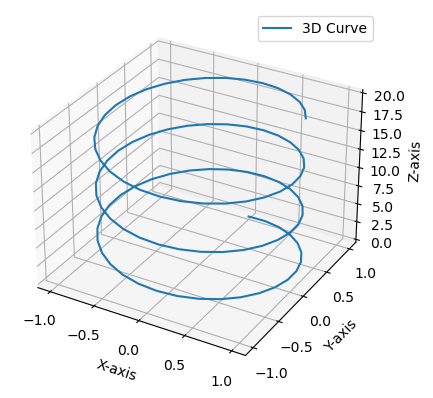

In [686]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some example data
t = np.linspace(0, 20, 100)
x = np.sin(t)
y = np.cos(t)
z = t

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D curve
ax.plot(x, y, z, label='3D Curve')

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# Show the plot
plt.show()


In [39]:
def cassie_equation(fraction_surface, theta_intrinsic):
    # Convert angles to radians
    theta1_rad = np.radians(theta_intrinsic)
    
    # Calculate cosines of angles
    cos_theta1 = np.cos(theta1_rad)
    
    # Calculate Cassie equation
    cos_theta_apparent = np.sum(fraction_surface * cos_theta1)    
    # Convert back to degrees
    theta_apparent = np.degrees(np.arccos(cos_theta_apparent))
    
    return theta_apparent

# Example usage:
# Replace these arrays with your actual data
surface_fractions = np.array([0.1, 0.9])
intrinsic_contact_angles = np.array([69, 0])

resulting_contact_angles = cassie_equation(surface_fractions, intrinsic_contact_angles)

print(resulting_contact_angles)

20.63624181077337


## Scenarios
### https://gmd.copernicus.org/articles/10/1447/2017/gmd-10-1447-2017.pdf


In [452]:
import numpy as np

# Create a NumPy array
my_array = np.array([1, 2, 3, 4, 5])

# Get the size of the array
array_size = my_array.size

# Print the result
print("Size of the array:", my_array.size)



Size of the array: 5


In [ ]:
#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,10))


# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))




plt.plot([1.0e-3, 1.0e5], [1.001, 1.001], '--', linewidth=2, color = 'r', alpha=0.5)
plt.plot([1.0e-3, 1.0e5], [1.010, 1.010], '--', linewidth=2, color = 'r', alpha=0.7)
plt.plot([1.0e-3, 1.0e5], [1.030, 1.030], '--', linewidth=2, color = 'r', alpha=1.0)
#plt.plot([1.0e-3, 1.0e5], [201.0, 201.0], ':', linewidth=4, color = 'k')


plt.plot(particleDiameters*1e6, ScPE_pur,  linewidth=4, label=r'PE only $\theta$ = 64.30°', color = cmapBlue(50))
plt.plot(particleDiameters*1e6, ScPE_NaCl_1pc, linewidth=4, label=r'PE + 1% NaCl', color = cmapBlue(100))

1.0018508343150923
1.0017239865597056
1.0013056137384408
1.0009348580633215
1.0007114627357254
resultExcel=0.305; Our results: 0.3157303060185246

[5.27367155e+00 4.56636110e+00 4.00429639e+00 3.54879696e+00
 3.17385319e+00 2.86051932e+00 2.59559984e+00 2.36925050e+00
 2.17400439e+00 2.00411532e+00 1.85538978e+00 1.72411143e+00
 1.60764634e+00 1.55426024e+00 1.50376067e+00 1.41059171e+00
 1.32665931e+00 1.25072929e+00 1.14961877e+00 1.00879611e+00
 9.60304907e-01 9.15610307e-01 8.74233741e-01 8.35934103e-01
 8.00313089e-01 7.67174535e-01 7.36259945e-01 7.07344372e-01
 6.80300388e-01 6.54935857e-01 4.68521668e-01 3.56364840e-01
 2.82769553e-01 2.31421496e-01 1.93936906e-01 1.65580652e-01
 1.43517625e-01 1.25956608e-01 1.11704414e-01 9.99478093e-02
 8.99016907e-02 8.11121640e-02 7.33573403e-02 6.64646681e-02
 6.02979427e-02 5.47482149e-02 4.97272977e-02 4.51630462e-02
 4.30331335e-02 4.09958680e-02 3.71761072e-02 3.36620560e-02
 3.04184260e-02 2.59954637e-02 1.96070856e-02 1.73403398e-02

(0.0, 1.02)

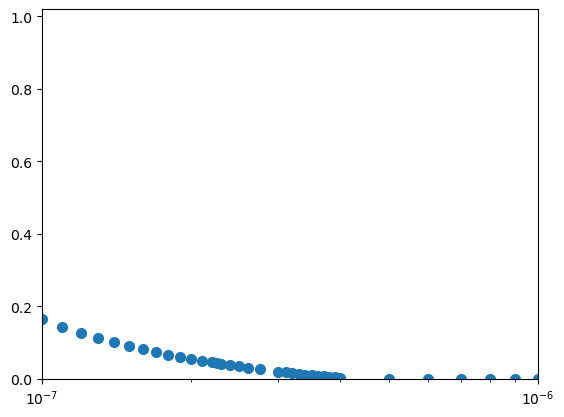

In [337]:
# Import necessary libraries
import math
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

# From https://acp.copernicus.org/preprints/8/5939/2008/acpd-8-5939-2008.pdf
# definition of the function Sc see Table 2 for details
def Sc(Dd, ki, ei, Ci, T=298.15, sigma=0.072, gmax=10, g=(1.0+1.0e-11), inc=1.01):   
    # calculate the A parameter in equation 9
    A = 8.69251e-6 * sigma / T
    
    # returns H(xi) as defined in equation 10
    #xi = list(map(lambda x: x if x < 1 else 1, (Ci * ((g**3.0) - 1.0) / ei)))
    # Calculate xi using NumPy vectorized operations
    xi = np.where(Ci * (g**3.0 - 1.0) / ei < 1, Ci * (g**3.0 - 1.0) / ei, 1)
 
    # calculates the dot product of the hygroscopicity and solubility. vectors in Eq. 10
    k = np.sum(ei*ki*np.array(xi))
    
    # defines the function given by equation 9
    def S (D, Dd, k, A):
        return (((D**3.0) - (Dd**3.0)) / ((D** 3.0) - ((Dd**3.0) * (1.0 - k))) * exp(A / D))
   
    # returns 1 when g > gmax otherwise return the larger value S(g*Dd) or S(g*Dd*inc)
    return 1 if g > gmax else max(S(g * Dd, Dd, k, A), Sc(Dd, ki, ei, Ci, T=T, 
                                                           sigma=sigma, gmax=gmax, inc=inc, g=(g * inc)))

    # Initialize result
    #result = 1 #if g > gmax else 0
    
    # Calculate S(g * Dd) or S(g * Dd * inc)
    #while g <= gmax:
    #    result = max(S(g * Dd, Dd, k, A), result)
    #    g *= inc
    
   # return result
    
    
    
print(Sc(100e-9, np.array([0.6, 0.2]), np.array([0.5, 0.5]), np.array([np.inf, 0.1])))
print(Sc(100e-9, np.array([0.6]), np.array([1]), np.array([np.inf]), T=273.15, inc=1.01))

Ddry = 100.0e-9
kappa = np.array([0.1])
Csol = np.array([0.1])
repartition =  np.array([1.0])

# Example usage:
result1 = Sc(0.2e-6,  kappa, repartition, Csol)
result2 = Sc(0.25e-6, kappa, repartition, Csol)
result3 = Sc(0.3e-6,  kappa, repartition, Csol)
resultExcel = Sc(Ddry,  ki=np.array([0.6]), ei=np.array([1.0]), Ci=np.array([0.03]))


print(result1)
print(result2)
print(result3)
print("resultExcel=0.305; Our results:", (resultExcel-1)*100)
print()


# Test the function with different values of Dd

#------Particles parameters-----------------------
pd = np.array([1.0,1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
               2.0, 2.1, 2.2, 2.25, 2.3, 2.4, 2.5, 2.6, 2.75, 
               3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 
               4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
pd = pd*1.0e-8
particleDiameters = np.concatenate((pd, 10.0*pd))
particleDiameters = np.concatenate((particleDiameters, 100.0*pd))

#kappa = np.array([0.1])
#Csol = np.array([0.1])
#repartition =  np.array([1.0])

kappa = np.array([0.5])
Csol = np.array([np.inf])
repartition =  np.array([1.0])

#kappa = np.array([0.6, 0.12])
#Csol = np.array([0.02, 0.1])
#repartition =  np.array([0.005, 0.995])

result = []
for Dd in particleDiameters:
    #result = result + [Sc(Dd, np.array([0.6, 0.2]), np.array([0.5, 0.5]), np.array([np.inf, 0.1]))]
    #result = result + [Sc(Dd, np.array([0.12,0.6]), np.array([0.995,0.05]), np.array([0.1,0.02]), T = 273.0)]
    #result = result + [Sc(Dd, np.array([0.1]), np.array([1]), np.array([0.1]))]
    result = result + [Sc(Dd, kappa, repartition, Csol)]

result = 100*(np.array(result)-1)
print (result)   

plt.scatter(particleDiameters, result,  linewidth=2)
plt.xscale('log')
#plt.yscale('log')    

plt.xlim([1.0e-7,1.0e-6])
plt.ylim([0.0,1.02]) 


1.0018508343150923
1.0017239865597056
1.0013056137384408
1.0009348580633215
1.0007114627357254
resultExcel = 1.0031573030601852
[1.0527367155077232, 1.0456636109983743, 1.0400429639397974, 1.035487969589492, 1.0317385319089771, 1.0286051932008144, 1.025955998445363, 1.0236925050465395, 1.0217400438559046, 1.0200411532021283, 1.0185538977988347, 1.0172411143266724, 1.0160764633664074, 1.0155426023799397, 1.0150376067011353, 1.0141059170901419, 1.0132665931329847, 1.0125072928626544, 1.0114961877004427, 1.0100879611088978, 1.0096030490704457, 1.0091561030678553, 1.0087423374109938, 1.0083593410287839, 1.0080031308877317, 1.007671745346406, 1.007362599451263, 1.0070734437186697, 1.0068030038794773, 1.0065493585732912, 1.0046852166788764, 1.0035636484039567, 1.0028276955254805, 1.0023142149610436, 1.0019393690575926, 1.0016558065157675, 1.0014351762534592, 1.0012595660774886, 1.0011170441357353, 1.0009994780927776, 1.0008990169069396, 1.0008111216400621, 1.000733573402782, 1.00066464668079

(0.9975, 1.02)

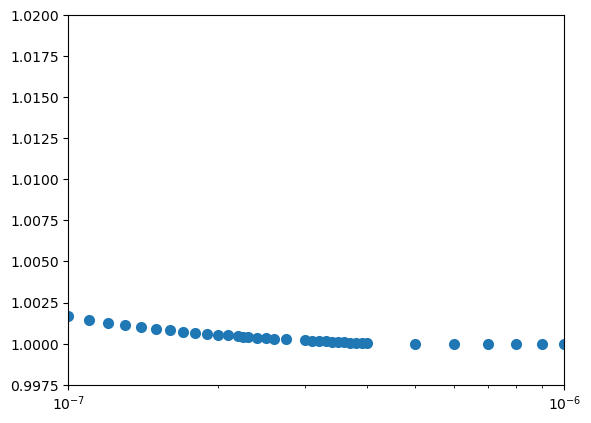

In [293]:
    
# Import necessary libraries
import math
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt


# From https://acp.copernicus.org/preprints/8/5939/2008/acpd-8-5939-2008.pdf
# Definition of the function Sc; see Table 2 for details
#def Sc(Dd, ki, ei, Ci, T=298.15, sigma=0.072, gmax=10.0, g=1.0+1.0e-11, inc=1.01):
    
#    # Calculate the A parameter in equation 9
#    A = 8.69251e-6 * sigma / T
    
#    # Returns H(xi) as defined in equation 10
#    xi = np.array([x if x < 1 else 1 for x in Ci * (g ** 3.0 - 1.0) / ei])
    
#    # Calculates the dot product of the hygroscopicity and solub. vectors in Eq. 10
#    k = np.dot(ki, ei * xi)
    
    #D = g * Dd
    #return (D ** 3.0 - Dd ** 3.0) / (D ** 3.0 - Dd ** 3.0 * (1.0 - k)) * math.exp(A / D)

    
#    # Defines the function given by equation 9
#    def S(D, Dd, k, A):
#        return (D ** 3.0 - Dd ** 3.0) / (D ** 3.0 - Dd ** 3.0 * (1.0 - k)) * math.exp(A / D)

#    #return S(g * Dd, Dd, k, A)
#    # Implementation of a pairwise max function; f(2,3) returns 3
#    def f(x, y):
#        return x if x > y else y

#    ## Returns 1 when g > gmax, otherwise return the larger value S(g*Dd) or S(g*Dd*inc)
#    return 1 if g > gmax else reduce(f, [S(g * Dd, Dd, k, A), Sc(Dd, ki, ei, Ci, T=T, sigma=sigma, gmax=gmax, inc=inc, g=g * inc)])



# import necessary functions from the math and numpy library
from math import exp
from numpy import dot, array

# definition of the function Sc see Table 2 for details
def Sc(Dd, ki, ei, Ci, T=298.15, sigma=0.072, gmax=10, g=(1.0+1.0e-11), inc=1.01):
    
    if g > gmax:
        return 1.0
    
    # calculate the A parameter in equation 9
    A = 8.69251e-6 * sigma / T
    
    # returns H(xi) as defined in equation 10
    xi = list(map(lambda x: x if x < 1 else 1, (Ci * ((g**3.0) - 1.0) / ei)))
    
    # calculates the dot product of the hygroscopicity and solubility. vectors in Eq. 10
    k = np.dot(ki, ei * np.array(xi))
    
    #k = np.sum(ei*ki*np.array(xi))
    
    # defines the function given by equation 9
    def S (D, Dd, k, A):
        #return (((D**3.0) - (Dd**3.0)) / ((D** 3.0) - ((Dd**3.0) * (1.0 - k))) * exp(A / D))
        Scl = (D ** 3.0) - (Dd ** 3.0)
        Scl = Scl / ((D ** 3.0) - ((Dd ** 3.0) * (1.0 - k)))
        return (Scl * exp(A / D))

    #S = lambda D, Dd, k, A: (D ** 3.0 - Dd ** 3.0) / (D ** 3.0 - Dd ** 3.0 * (1.0 - k)) * exp(A / D)
    
    
    # implementation of a pairwise max function; f(2,3) returns 3
    f = lambda x, y: x if x > y else y
    
    # returns 1 when g > gmax otherwise return the larger value S(g*Dd) or S(g*Dd*inc)
    #print(Dd, S(g * Dd, Dd, k, A), Sc(Dd, ki, ei, Ci, T=T, sigma=sigma, gmax=gmax, inc=inc, g=(g * inc)))
    #return 1 if g > gmax else max(S(g * Dd, Dd, k, A), Sc(Dd, ki, ei, Ci, T=T, sigma=sigma, gmax=gmax, inc=inc, g=(g * inc)))
    return (max(S(g*Dd, Dd, k, A), Sc(Dd, ki, ei, Ci, T=T, sigma=sigma, gmax=gmax, inc=inc, g=(g * inc))))

print(Sc(100e-9, np.array([0.6, 0.2]), np.array([0.5, 0.5]), np.array([np.inf, 0.1])))
print(Sc(100e-9, np.array([0.6]), np.array([1]), np.array([np.inf]), T=273.15, inc=1.01))

Ddry = 100.0e-9
kappa = np.array([0.1])
Csol = np.array([0.1])
repartition =  np.array([1.0])

# Example usage:
result1 = Sc(0.2e-6,  kappa, repartition, Csol)
result2 = Sc(0.25e-6, kappa, repartition, Csol)
result3 = Sc(0.3e-6,  kappa, repartition, Csol)
resultExcel = Sc(Ddry,  ki=np.array([0.6]), ei=np.array([1.0]), Ci=np.array([0.03]))


print(result1)
print(result2)
print(result3)
print("resultExcel =", resultExcel)




# Test the function with different values of Dd

#------Particles parameters-----------------------
pd = np.array([1.0,1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
               2.0, 2.1, 2.2, 2.25, 2.3, 2.4, 2.5, 2.6, 2.75, 
               3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 
               4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
pd = pd*1.0e-8
particleDiameters = np.concatenate((pd, 10.0*pd))
particleDiameters = np.concatenate((particleDiameters, 100.0*pd))

#kappa = np.array([0.1])
#Csol = np.array([0.1])
#repartition =  np.array([1.0])

kappa = np.array([0.5])
Csol = np.array([np.inf])
#repartition =  np.array([1.0])

#kappa = np.array([0.6, 0.12])
#Csol = np.array([0.02, 0.1])
#repartition =  np.array([0.005, 0.995])

result = []
for Dd in particleDiameters:
    #result = result + [Sc(Dd, np.array([0.6, 0.2]), np.array([0.5, 0.5]), np.array([np.inf, 0.1]))]
    #result = result + [Sc(Dd, np.array([0.12,0.6]), np.array([0.995,0.05]), np.array([0.1,0.02]), T = 273.0)]
    #result = result + [Sc(Dd, np.array([0.1]), np.array([1]), np.array([0.1]))]
    result = result + [Sc(Dd, kappa, repartition, Csol)]


print (result)   

plt.scatter(particleDiameters, result,  linewidth=2)
plt.xscale('log')
#plt.yscale('log')    

plt.xlim([1.0e-7,1.0e-6])
plt.ylim([0.9975,1.02]) 



1.0013056137384408
1.0007114627357254
[0.9944684343736521, 0.8747674251040172, 0.7774207813402434, 0.697020128171788, 0.6296631299153921, 0.5725320235305364, 0.5235695782125349, 0.4812211672640121, 0.44429217174726254, 0.4118563055582003, 0.3832061397856634, 0.3244258082295115, 0.27926829249675933, 0.2436754621903514, 0.21503725894878034, 0.20510642668889467, 0.19592487582287266, 0.18740604015579088, 0.17948244184073925, 0.17209831261333353, 0.1652043293096872, 0.15876284313045552, 0.15272815536331308, 0.14706455484907455, 0.14174114278491245, 0.1022706817733976, 0.07821263134819567, 0.06228870846041179, 0.051113175960160184, 0.04291538306679943, 0.0366947218038538, 0.03184335145682837, 0.027972344560200924, 0.024826174957093272, 0.022227547519082513, 0.02005300120107023, 0.018210632304849206, 0.016633953503508714, 0.015272221836415412, 0.014086183673622799, 0.013046581409859037, 0.010939270993270966, 0.009343672769590583, 0.008101385101788594, 0.00711178070369467, 0.006771025504503925

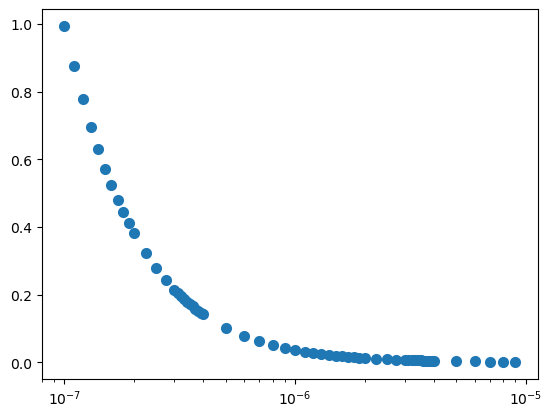

In [298]:
import numpy as np

def sc(Dd, g, Ci, ei, ks, T=298.15, sigma=0.072, gmax = 20.0):

    A = 8.69251e-6 * sigma / T
    
    #xi = Ci * (g ** 3.0 - 1.0) / ei
    
    #i = np.where(xi > 1)

    #if i[0].size > 0:
    #    xi[i] = 1
        
    xi = list(map(lambda x: x if x < 1 else 1, (Ci * (g ** 3.0 - 1.0) / ei)))

    
    k = np.sum(ks * (ei * xi))
    xw = ((Dd * g) ** 3.0 - Dd ** 3.0) / ((Dd * g) ** 3.0 - Dd ** 3.0 * (1.0 - k))
    S = xw * np.exp(A / (Dd * g))
    
    return 1 if g > gmax else max(S, sc(Dd, g * 1.01, Ci, ei, ks, T=T, sigma=sigma))

# Example usage:
result1 = sc(0.2e-6, 1 + 1e-11, np.array([0.1]), np.array([1.0]), np.array([0.1]))
#result2 = sc(0.1e-6, 1 + 1e-11, np.array([1e15]), np.array([1]), np.array([0.6]), T=273.15)


result2 = sc(0.3e-6, 1 + 1e-11, np.array([0.1]), np.array([1.0]), np.array([0.1]))


print(result1)
print(result2)


#------Particles parameters-----------------------
pd = np.array([1.0,1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
               2.0,2.25, 2.5, 2.75, 
               3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 
               4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
pd = pd*1.0e-7
particleDiameters = np.concatenate((pd, 10.0*pd))

kappa = np.array([0.1])
Csol = np.array([0.1])

repartition =  np.array([1.0])
gini = 1.0 + 1.0e-11
gmax = 20.0

result = []
for Dd in particleDiameters:
    #result = result + [Sc(Dd, np.array([0.6, 0.2]), np.array([0.5, 0.5]), np.array([np.inf, 0.1]))]
    #result = result + [Sc(Dd, np.array([0.12,0.6]), np.array([0.995,0.05]), np.array([0.1,0.02]), T = 273.0)]
    #result = result + [Sc(Dd, np.array([0.1]), np.array([1]), np.array([0.1]))]
    result = result + [(sc(Dd, gini, repartition, Csol, kappa)-1)*100]


print (result)   

plt.scatter(particleDiameters, result,  linewidth=2)
plt.xscale('log')
#plt.yscale('log')    

#plt.xlim([0.1e-6,1.0e-6])
#plt.ylim([0.9975,1.01]) 


In [80]:
import numpy as np

T = 298.15 # [K] Temperature 
#T = 273.15 # [K] Temperature 

# Constants:
# ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
muAir = 1.789e-5 # [kg−1.s−1], dynamic viscosity of the air (Heigth, Temp dependent)
rhoAir = 1.1438 # [kg.m-3], density of air (Heigth, Temp dependent)
g0 = 9.81 # [m.s-2] gravitational acceleration on earth (Heigth dependent)
mfpAir = 6.609e-8 # [m] Mean free path on dry air, here at 23 C, 1 atm, from Jennings, S, 1988
R = 8.314462# [J.K-1] Perfect gas constant

Mw = 0.01802 #[kg.mol-1] molar mass of water
rho_W = 997.1 #[kg.m-3], density of Water at T = 298.15 K
sigma_W = 0.072 #[Nm−1] surface tension of Water at 298.15 K


# From https://static-content.springer.com/esm/art%3A10.1038%2Fs41561-022-01051-9/MediaObjects/41561_2022_1051_MOESM1_ESM.pdf
# At T= 273.15K
T = 273.15
Mw = 0.018015 #[kg.mol-1] molar mass of water
rho_W = 999.87 #[kg.m-3], density of Water at T = 273.15 K
sigma_W = 0.0756 #[Nm−1] surface tension of Water at 273.15 K

pi = np.pi


A = 4.0*Mw*sigma_W/(R*rho_W)
print('A=', A)

A = A/T

#------Particles parameters-----------------------
pd = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
               5.5, 6.0, 8.0, 8.5, 9.0, 9.5])
pd = pd*1.0e-9
particleDiameters = np.concatenate((pd, 10.0*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e2*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e3*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e4*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e5*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e6*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e7*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e8*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e9*pd))


# From L AAKSONEN et al. 
# https://journals.ametsoc.org/view/journals/atsc/55/5/1520-0469_1998_055_0853_motkhe_2.0.co_2.xml?tab_body=pdf
# Eq. 18 + Eq. 29
# mu_s (νS) is the number of moles of ions formed from the dissociation of one mole of the dissolved solid
def criticalSaturation_Solubility (particleDiameters, perc_in_Vol_Soluble, T, Mw, sigma_W, R, rho_W, mu_s):
    #A = 4.0 * Mw * sigma_W / (R * rho_W)
    #A = A / T
    #wettability = (1.0 - np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(particleDiameters / 2.0)))
    #Sc = np.exp((A / particleDiameters) + wettability) - 1.0
    #Sc = Sc *100.0
    
    r_core = particleDiameters/2.0
    r_tot = (particleDiameters + (particleDiameters * (perc_in_Vol_Soluble**(1.0/3.0))))/2.0
    
    A = 2.0 * Mw * sigma_W / (R * rho_W)
    A = A / T
    
    Bs = 3.0 * Mw * mu_s * n_s/ (rho_W * 4.0 * pi)
    
    solubility = Bs / ((r_tot**3.0) - (r_core**3.0))
    
    Sc = np.exp(A / r) * (1.0 - solubility) 

    return Sc


# CF https://acp.copernicus.org/articles/5/1053/2005/acp-5-1053-2005.pdf
# 


perc_in_Vol_Soluble = 1.0/100.0
Sc0 = criticalSaturation_Solubility(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 2.0
Sc02 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 4.0
Sc04 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 6.0
Sc06 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 8.0
Sc08 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 12.0
Sc12 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 0.0
Sc0 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 5.0
Sc05 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 10.0
Sc10 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 15.0
Sc15 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)


teta = 50.0
Sc50 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 60.0
Sc60 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 70.0
Sc70 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 80.0
Sc80 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

teta = 90.0
Sc90 = criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W)

A= 6.552972757297716e-07


NameError: name 'teta' is not defined

# Directly with the initial Mc Donald equation 
https://journals.ametsoc.org/view/journals/atsc/21/1/1520-0469_1964_021_0109_cnoip_2_0_co_2.xml

In [6]:
import math
import numpy as np

T = 298.15 # [K] Temperature 
#T = 273.15 # [K] Temperature 

# Constants:
# ---- Constants dependants of Temperature, Pressure, altitud. Have to be adapted to specific regions ------------
muAir = 1.789e-5 # [kg−1.s−1], dynamic viscosity of the air (Heigth, Temp dependent)
rhoAir = 1.1438 # [kg.m-3], density of air (Heigth, Temp dependent)
g0 = 9.81 # [m.s-2] gravitational acceleration on earth (Heigth dependent)
mfpAir = 6.609e-8 # [m] Mean free path on dry air, here at 23 C, 1 atm, from Jennings, S, 1988
R = 8.314462# [J.K-1] Perfect gas constant

Mw = 0.01802 #[kg.mol-1] molar mass of water
rho_W = 997.1 #[kg.m-3], density of Water at T = 298.15 K
sigma_W = 0.072 #[Nm−1] surface tension of Water at 298.15 K


# From https://static-content.springer.com/esm/art%3A10.1038%2Fs41561-022-01051-9/MediaObjects/41561_2022_1051_MOESM1_ESM.pdf
# At T= 273.15K
T = 273.15
Mw = 0.018015 #[kg.mol-1] molar mass of water
rho_W = 999.87 #[kg.m-3], density of Water at T = 273.15 K
sigma_W = 0.0756 #[Nm−1] surface tension of Water at 273.15 K




A = 4.0*Mw*sigma_W/(R*rho_W)
print('A=', A)

A = A/T

#------Particles parameters-----------------------
pd = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
               5.5, 6.0, 8.0, 8.5, 9.0, 9.5])
pd = pd*1.0e-9
particleDiameters = np.concatenate((pd, 10.0*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e2*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e3*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e4*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e5*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e6*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e7*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e8*pd))
particleDiameters = np.concatenate((particleDiameters, 1.0e9*pd))



def criticalSaturation_Wettability(particleDiameters, teta, T, Mw, sigma_W, R, rho_W):
    teta = np.radians(teta)
    #A = 4.0 * Mw * sigma_W / (R * rho_W)
    #A = A / T
    #wettability = (1.0 - np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(particleDiameters / 2.0)))
    #Sc = np.exp((A / particleDiameters) + wettability) - 1.0
    #Sc = Sc *100.0
    r = (particleDiameters/2.0)
    A = 2.0 * Mw * sigma_W / (R * rho_W)
    A = A / T
    wettability = (1.0 - np.cos(teta)) / np.sqrt(0.662 + (0.022 * np.log(r)))
    Sc = np.exp((A / r) + wettability) 
    #Sc = Sc *100.0

    return Sc



def criticalSaturationSaturation_AngularWettability(particleDiameters, S, T, Mw, sigma_W, R, rho_W):
    lnS = np.log (S)
    r_star = 2.0 * sigma_W * Mw / (R * rho_W * T * lnS)
    r = (particleDiameters/2.0)
    x = r / r_star    
    teta = np.arccos(1.0 - ((x-1.0/x))*(np.sqrt(0.662 + (0.022 * np.log(r))))*lnS)
    return teta


def criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W):
    lnS = np.log (S)
    r_star = 2.0 * sigma_W * Mw / (R * rho_W * T * lnS)
    r = (particleDiameters/2.0)
    x = r / r_star
    #print((x-1.0/x))
    teta = np.arccos(1.0 - ((x-1.0/x))*(np.sqrt(0.662 + (0.022 * np.log(r))))*lnS)
    #teta = np.degrees(np.arccos(np.cos(np.radians(10.0*3.14159265))))
    return teta

S = 1.001
teta_100_1 = criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W)

S = 1.01
teta_101 = criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W)

S = 1.03
teta_103 = criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W)


A= 6.552972757297716e-07


/var/folders/82/klr7dwlx2ns9ssqtzcmlrs140000gr/T/ipykernel_61005/3851495442.py:84: RuntimeWarning: invalid value encountered in arccos
  teta = np.arccos(1.0 - ((x-1.0/x))*(np.sqrt(0.662 + (0.022 * np.log(r))))*lnS)


In [7]:
particleDiameters = np.array([0.05e-6, 0.5e-6, 5.0e-6])
particleDiameters = particleDiameters * 2.0
S = 1.001
print('S = 1.001: ', criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W))

S = 1.01
print('S = 1.01: ', criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W))

S = 1.03
print('S = 1.03: ', criticalAngularWettability_Saturation(particleDiameters, S, T, Mw, sigma_W, R, rho_W))



S = 1.001:  [       nan        nan 0.07017952]
S = 1.01:  [       nan 0.21375674 0.73582908]
S = 1.03:  [0.11598044 0.66297056        nan]


/var/folders/82/klr7dwlx2ns9ssqtzcmlrs140000gr/T/ipykernel_61005/3851495442.py:84: RuntimeWarning: invalid value encountered in arccos
  teta = np.arccos(1.0 - ((x-1.0/x))*(np.sqrt(0.662 + (0.022 * np.log(r))))*lnS)


In [8]:
r=0.05e-6
S = 1.03
lnS = np.log(S)
r_star = 2.0 * sigma_W * Mw / (R * rho_W * T * lnS)
x = r / r_star

teta = np.arccos(1.0 - ((x-1.0/x)*(np.sqrt(0.662 + (0.022 * np.log(r))))*lnS))
print(teta)

0.11598044250240089


ValueError: x and y must have same first dimension, but have shapes (3,) and (140,)

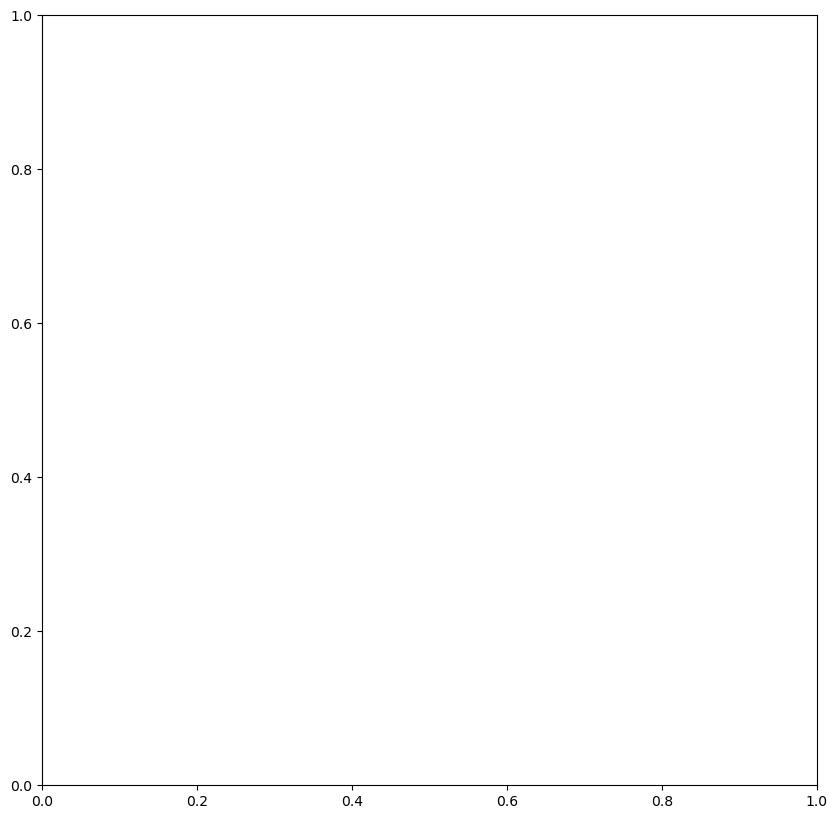

In [481]:
import numpy as np
import math
import matplotlib.pyplot as plt

pi = math.pi


#----- Density of plastic effects --------------------
fig = plt.figure(figsize=(10,10))


#if (len(intersection_PVC_ufr2)==2 ):
#    plt.text(intersection_PVC_ufr2[0]*1.0e6, intersection_PVC_ufr2[1]*1.0e2, r'+',fontsize=28, color = 'r')



# Charge a colormap
cmapGreen = plt.get_cmap('Greens')
cmapYellow = plt.get_cmap('YlOrBr')
cmapBlue = plt.get_cmap('Blues')


#plt.plot(particleDiameters*1e6, diff15, linewidth=4, label=r'diff2', color = cmapGreen(500))

#plt.plot([1.0e-3, 1.0e5], [100.0, 100.0], ':', linewidth=4, color = 'k')
#plt.plot([1.0e-3, 1.0e5], [1.010, 1.010], ':', linewidth=4, color = 'k')
#plt.plot([1.0e-3, 1.0e5], [201.0, 201.0], ':', linewidth=4, color = 'k')


plt.plot(particleDiameters*1e6/2.0, teta_100_1,  linewidth=4, label=r'S = 1.001', color = cmapBlue(60))
plt.plot(particleDiameters*1e6/2.0, teta_101, ':',linewidth=4, label=r'S = 1.01', color = cmapBlue(100))
plt.plot(particleDiameters*1e6/2.0, teta_103, ':',linewidth=4, label=r'S = 1.03', color = cmapBlue(150))



plt.xscale('log')
#plt.yscale('cos')
#plt.ylim([500.0e-1,100.0e2])

#plt.ylim([90.0,200.0])
plt.xlim([1.0e-3,1.0e4])

#plt.ylim([0.8,1.1])



# Add labels and title
plt.xlabel(r'Dry Particle radius ($\mu$m)', fontsize=28)
#plt.ylabel('RH %', fontsize=28)
plt.ylabel(r'$\theta$', fontsize=28)

plt.title("Critical Saturation Sc (%).\n" , fontsize=24)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tick_params(top=True, right=True, which='both', direction='in', width=2, labelsize=18 )
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)


# Add Legend at specific coordinates
legend_x = 0.7e-0 # x-coordinate of the legend
legend_y = 0.7e-0  # y-coordinate of the legend
plt.legend(fontsize=14, loc=(legend_x, legend_y))

#plt.savefig('CriticalSaturationCurves_Wettability.png', bbox_inches="tight", dpi=150)

### Download Rain Rate, boundary layer heigth and snowfall rate water equivalent from Era 5

In [335]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type':'reanalysis',
        'variable':[
            'boundary_layer_height', 'convective_rain_rate', 'convective_snowfall_rate_water_equivalent',
        ],
        'year':'2000',
        'month':[
                '01', '02', '03','04', 
              #  '05', '06', '07', '08', 
              #  '09', '10', '11', '12',
            ],
        'day':[
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
        'time': [
                '00:00', '01:00', '02:00',
                '03:00', '04:00', '05:00',
                '06:00', '07:00', '08:00',
                '09:00', '10:00', '11:00',
                '12:00', '13:00', '14:00',
                '15:00', '16:00', '17:00',
                '18:00', '19:00', '20:00',
                '21:00', '22:00', '23:00',
            ],
        'grid': "0.5/0.5",
        'format':'netcdf'
    },
    'wetSettlingData_ERA5_2000-01_04.nc')


c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type':'reanalysis',
        'variable':[
            'boundary_layer_height', 'convective_rain_rate', 'convective_snowfall_rate_water_equivalent',
        ],
        'year':'2000',
        'month':[
              #  '01', '02', '03','04', 
                '05', '06', '07', '08', 
              #  '09', '10', '11', '12',
            ],
        'day':[
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
        'time': [
                '00:00', '01:00', '02:00',
                '03:00', '04:00', '05:00',
                '06:00', '07:00', '08:00',
                '09:00', '10:00', '11:00',
                '12:00', '13:00', '14:00',
                '15:00', '16:00', '17:00',
                '18:00', '19:00', '20:00',
                '21:00', '22:00', '23:00',
            ],
        'grid': "0.5/0.5",
        'format':'netcdf'
    },
    'wetSettlingData_ERA5_2000-05_08.nc')

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type':'reanalysis',
        'variable':[
            'boundary_layer_height', 'convective_rain_rate', 'convective_snowfall_rate_water_equivalent',
        ],
        'year':'2000',
        'month':[
              #  '01', '02', '03','04', 
              #  '05', '06', '07', '08', 
                '09', '10', '11', '12',
            ],
        'day':[
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
        'time': [
                '00:00', '01:00', '02:00',
                '03:00', '04:00', '05:00',
                '06:00', '07:00', '08:00',
                '09:00', '10:00', '11:00',
                '12:00', '13:00', '14:00',
                '15:00', '16:00', '17:00',
                '18:00', '19:00', '20:00',
                '21:00', '22:00', '23:00',
            ],
        'grid': "0.5/0.5",
        'format':'netcdf'
    },
    'wetSettlingData_ERA5_2000-09_12.nc')

# The file wetSettlingData_ERA5_2020-01_04.nc will be downloaded on the current folder. 

2023-10-19 16:19:28,156 INFO Welcome to the CDS
2023-10-19 16:19:28,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-10-19 16:19:28,305 INFO Request is queued
2023-10-19 16:19:30,902 INFO Request is running


KeyboardInterrupt: 

In [3]:
# Merge the 3 files download to one netCDF 

import xarray as xr

file1 = 'wetSettlingData_ERA5_2000-01_04.nc'
file2 = 'wetSettlingData_ERA5_2000-05_08.nc'
file3 = 'wetSettlingData_ERA5_2000-09_12.nc'

# Open all the netCDF files with xarray
ds = xr.open_mfdataset([file1, file2, file3], combine='by_coords')

# Save the merged dataset to a new netCDF file
ds.to_netcdf('wetSettlingData_ERA5_2000.nc')

# Close the dataset
ds.close()

In [2]:
import xarray as xr

wetDataEra5 = xr.open_dataset('wetSettlingData_ERA5_2000.nc')
wetDataEra5.to_dataframe().describe()


KeyboardInterrupt: 

In [1]:
import xarray as xr
#https://www.youtube.com/watch?v=yf9Q11OdKAc
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs


wetDataEra5 = xr.open_dataset('wetSettlingData_ERA5_2000.nc')
ncw = wetDataEra5.sel(time='2000-01-01T06')



#The file has only one time = 2018-12-25T12:00:00


# Some tips to manipulate netCDF

display(ncw)


xd = ncw['blh'].longitude.values
yd = ncw['blh'].latitude.values[:-1]

#We delete the duplicate data at 90 and -90 latitude
blh1 = ncw['blh'].values[:-1,:] # in (latitude, longitude <=> y,x); numpy.ndarray object

#convective_rain_rate
crr1  = ncw['crr'].values[:-1,:] # in (latitude, longitude <=> y,x); numpy.ndarray object

#convective_snowfall_rate_water_equivalent
csr1 = ncw['csfr'].values[:-1,:] # in (latitude, longitude <=> y,x); numpy.ndarray object

lon = ncw['longitude']
lat = ncw['latitude']



<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 720)
Coordinates:
    time       datetime64[ns] 2000-01-01T06:00:00
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
Data variables:
    blh        (latitude, longitude) float32 ...
    crr        (latitude, longitude) float32 ...
    csfr       (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-22 14:46:59 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [37]:
#Create pictures in parralale of the blh for the year

import gc # garbage collector
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import joblib #Joblib uses the fork system call 


gc.collect(generation=2) #Clean non referenced and non used old data in memory

cbar_kwargs = {'orientation':'horizontal',
               'fraction': 0.045,
               'pad': 0.01,
               'extend':'neither'}

# ContourPlot with map
from cartopy.feature import NaturalEarthFeature

months31 =['01', '03', '05', '07', '08','10', '12']
days31 = ['01','02','03','04','05','06','07','08','09', '10',
        '11','12','13','14','15','16','17','18','19', '20',
        '21','22','23','24','25','26','27','28','29', '30',
        '31']

months30 =['04', '06', '09', '11']
days30 = ['01','02','03','04','05','06','07','08','09', '10',
        '11','12','13','14','15','16','17','18','19', '20',
        '21','22','23','24','25','26','27','28','29', '30']

months28 =['02']
days28 = ['01','02','03','04','05','06','07','08','09', '10',
        '11','12','13','14','15','16','17','18','19', '20',
        '21','22','23','24','25','26','27','28']

hours = ['00','01','02','03','04','05','06',
         '07','08','09','10','11','12','13',
         '14','15','16','17','18','19',         
         '20','21','22','23']




def plot_data(hour, day, month):
    date = datetime.datetime(2000, int(month), int(day), int(hour))
    timetxt = '2000-'+str(month)+'-'+str(day)+'T'+str(hour)
    ncw = wetDataEra5.sel(time=timetxt)

    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90])
    ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                   facecolor='none', edgecolor='black')

    xr.plot.imshow(ncw['blh'][:,:], ax=ax, add_labels=False,
                   vmin=0, vmax=1600.0, cmap='Blues', 
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

    plt.title("Boundary Layer Height (m),"+str(timetxt), fontsize=40)
    ax.add_feature(Nightshade(date, alpha=0.2))

    plt.savefig('dataBLH/blh_'+str(timetxt), bbox_inches='tight', dpi=200)

    plt.close(fig)
    plt.cla()
    plt.clf()
    gc.collect()
         
number_of_cpu = min(joblib.cpu_count(), 24)
#joblib.Parallel(n_jobs=number_of_cpu)(joblib.delayed(plot_data)(hour, day, month) 
#                          for hour in hours for day in days28 for month in months28)
joblib.Parallel(n_jobs=number_of_cpu)(joblib.delayed(plot_data)(hour, day, month) 
                          for hour in hours for day in days30 for month in months30)
joblib.Parallel(n_jobs=number_of_cpu)(joblib.delayed(plot_data)(hour, day, month) 
                          for hour in hours for day in days31 for month in months31)



/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anacon

/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/op

/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anacon

/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/marianne/op

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future 

ValueError: X must have 2 or fewer dimensions

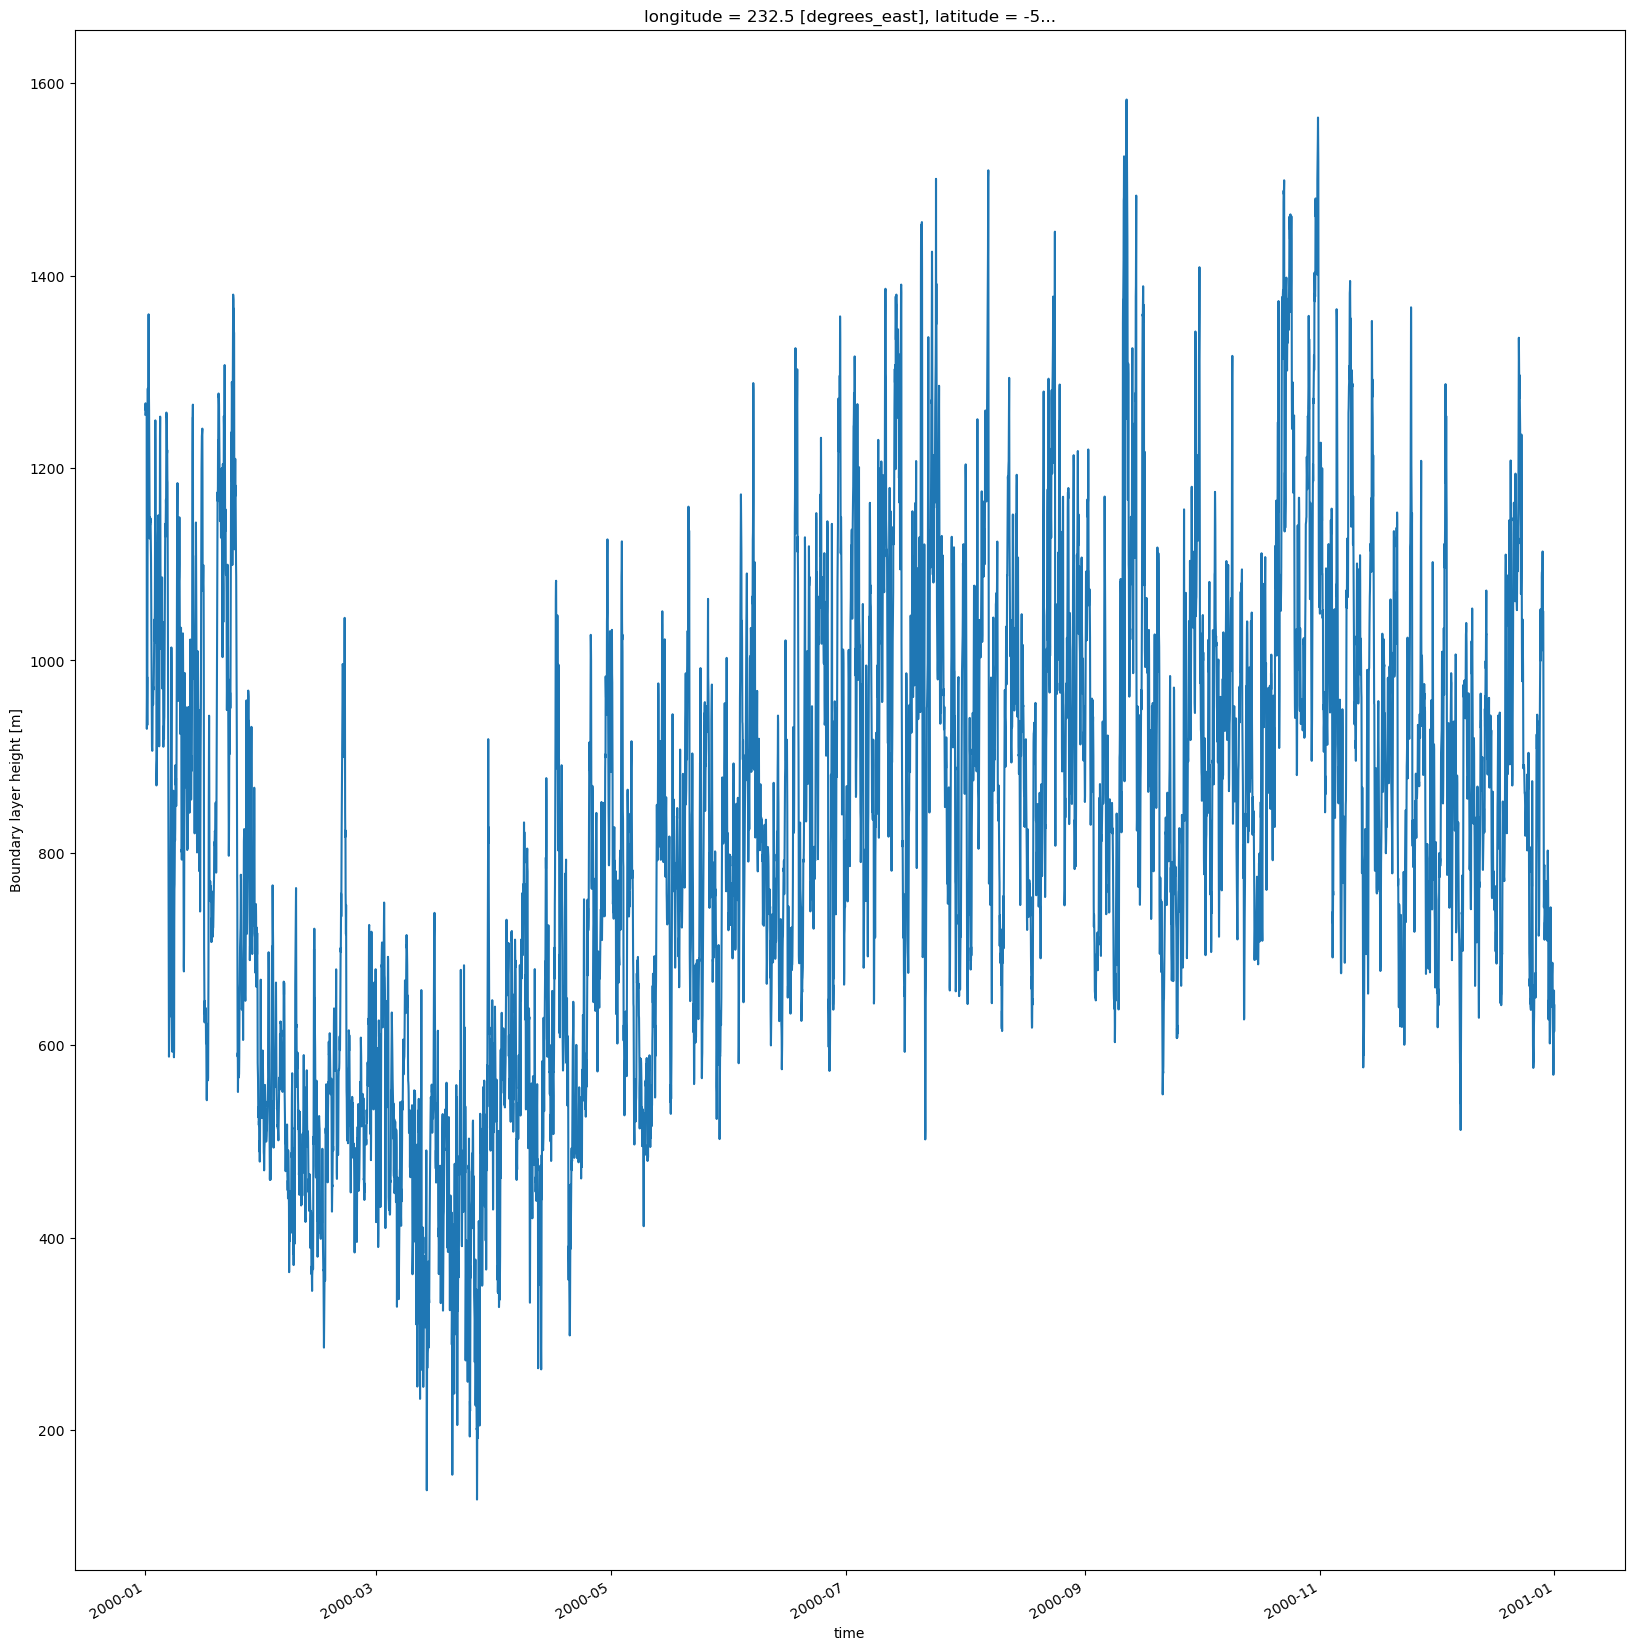

<Figure size 2000x2000 with 0 Axes>

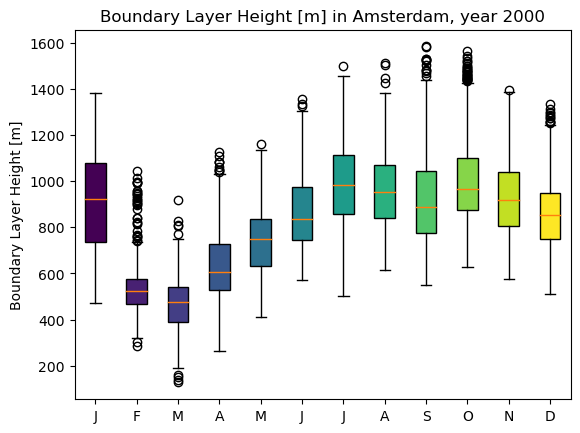

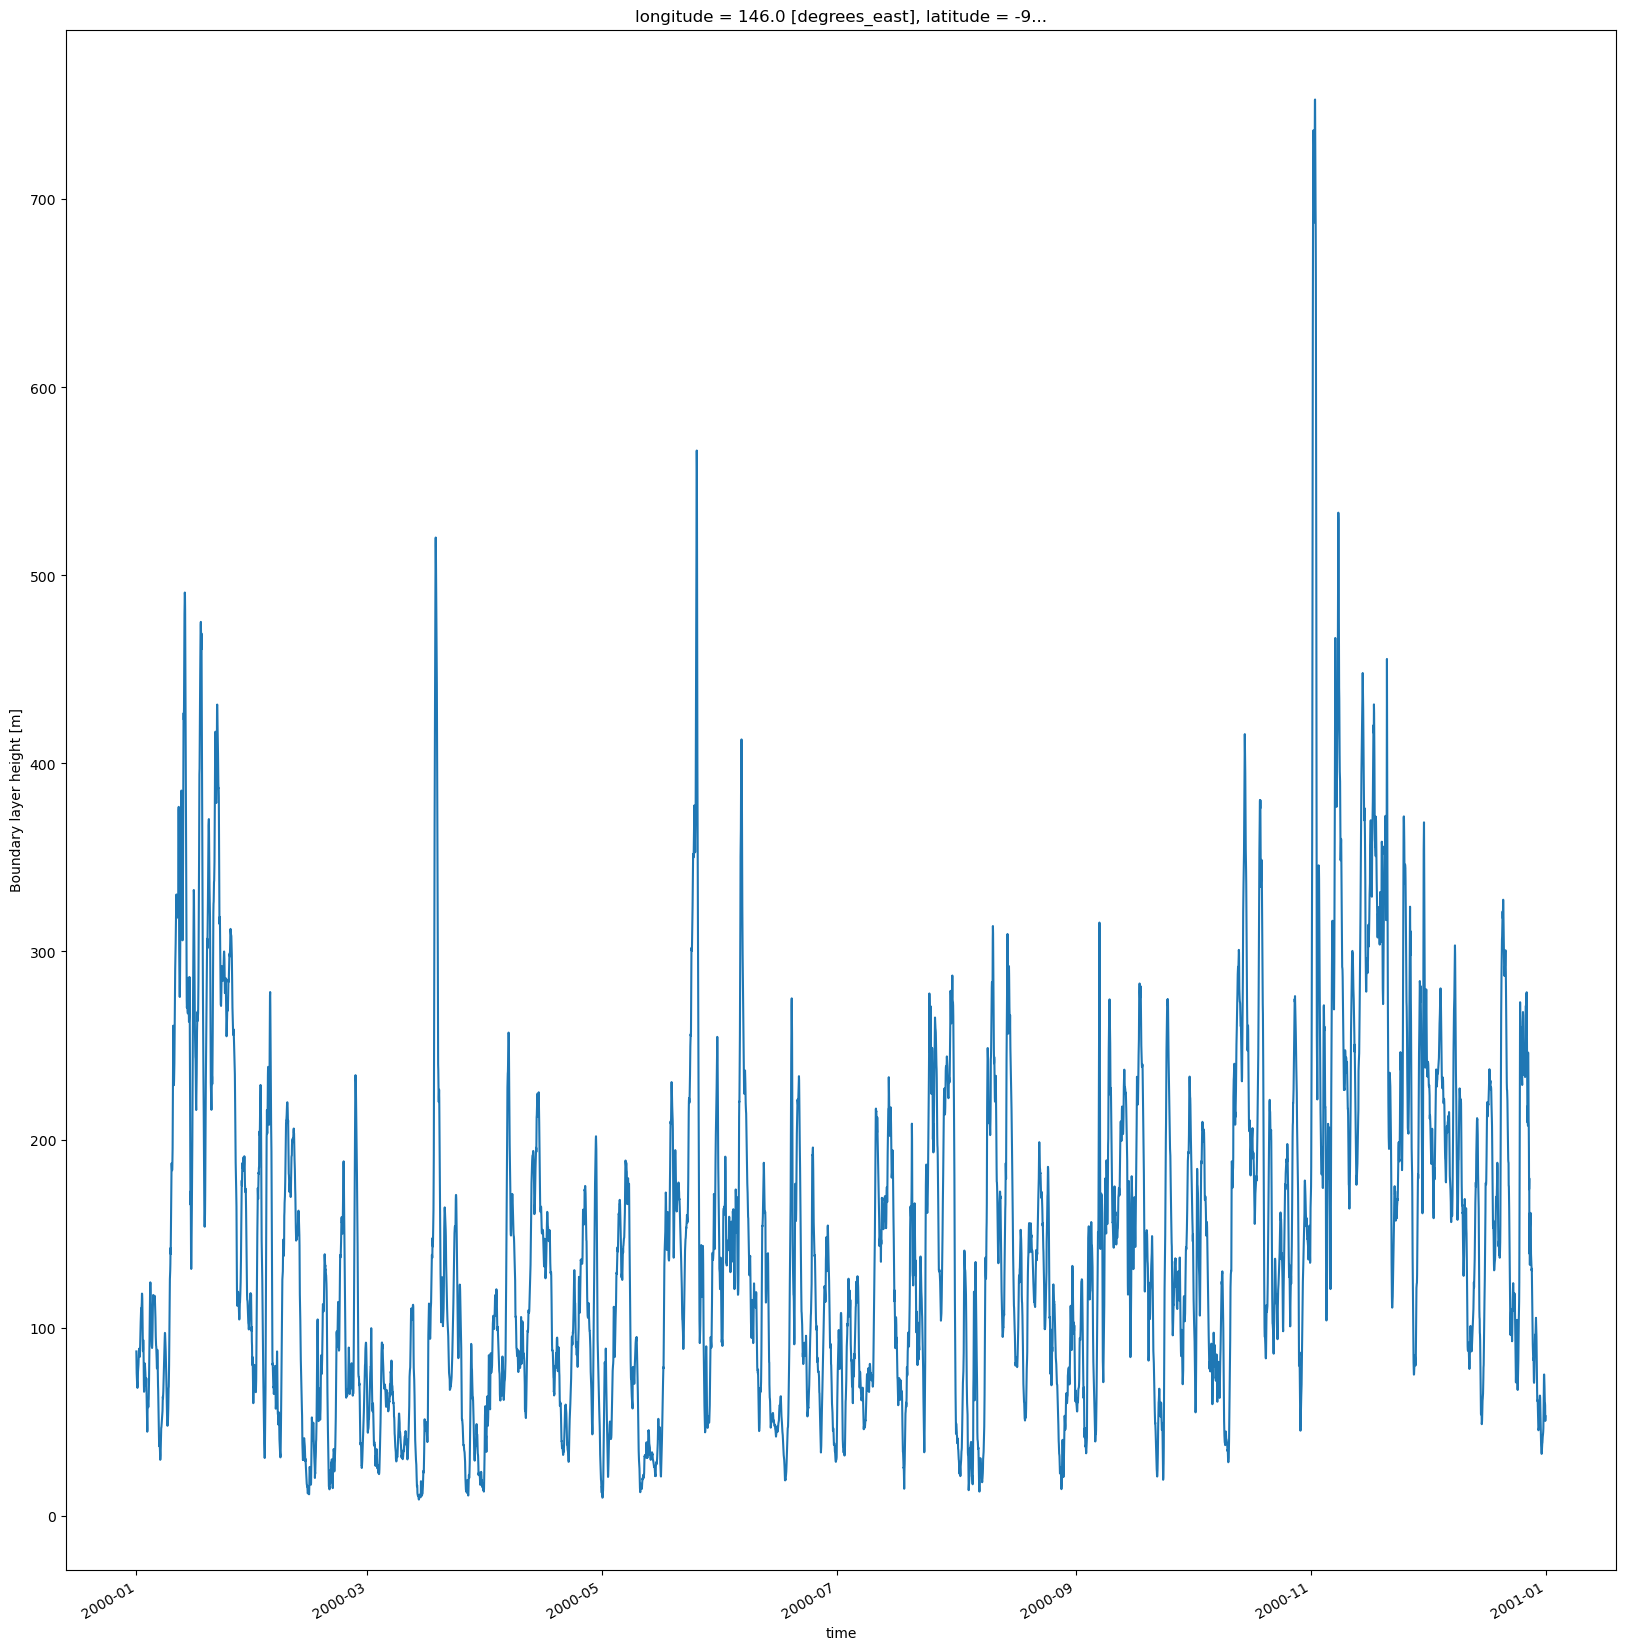

<Figure size 2000x2000 with 0 Axes>

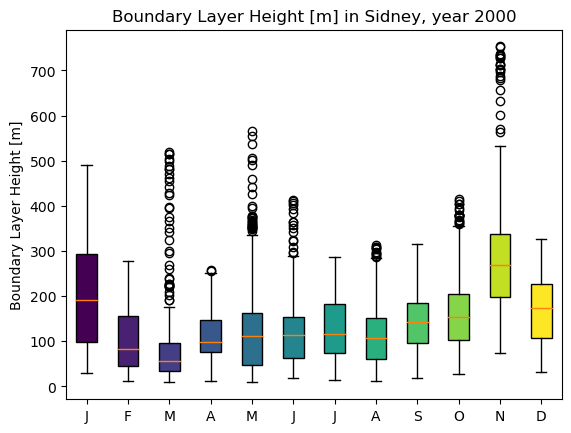

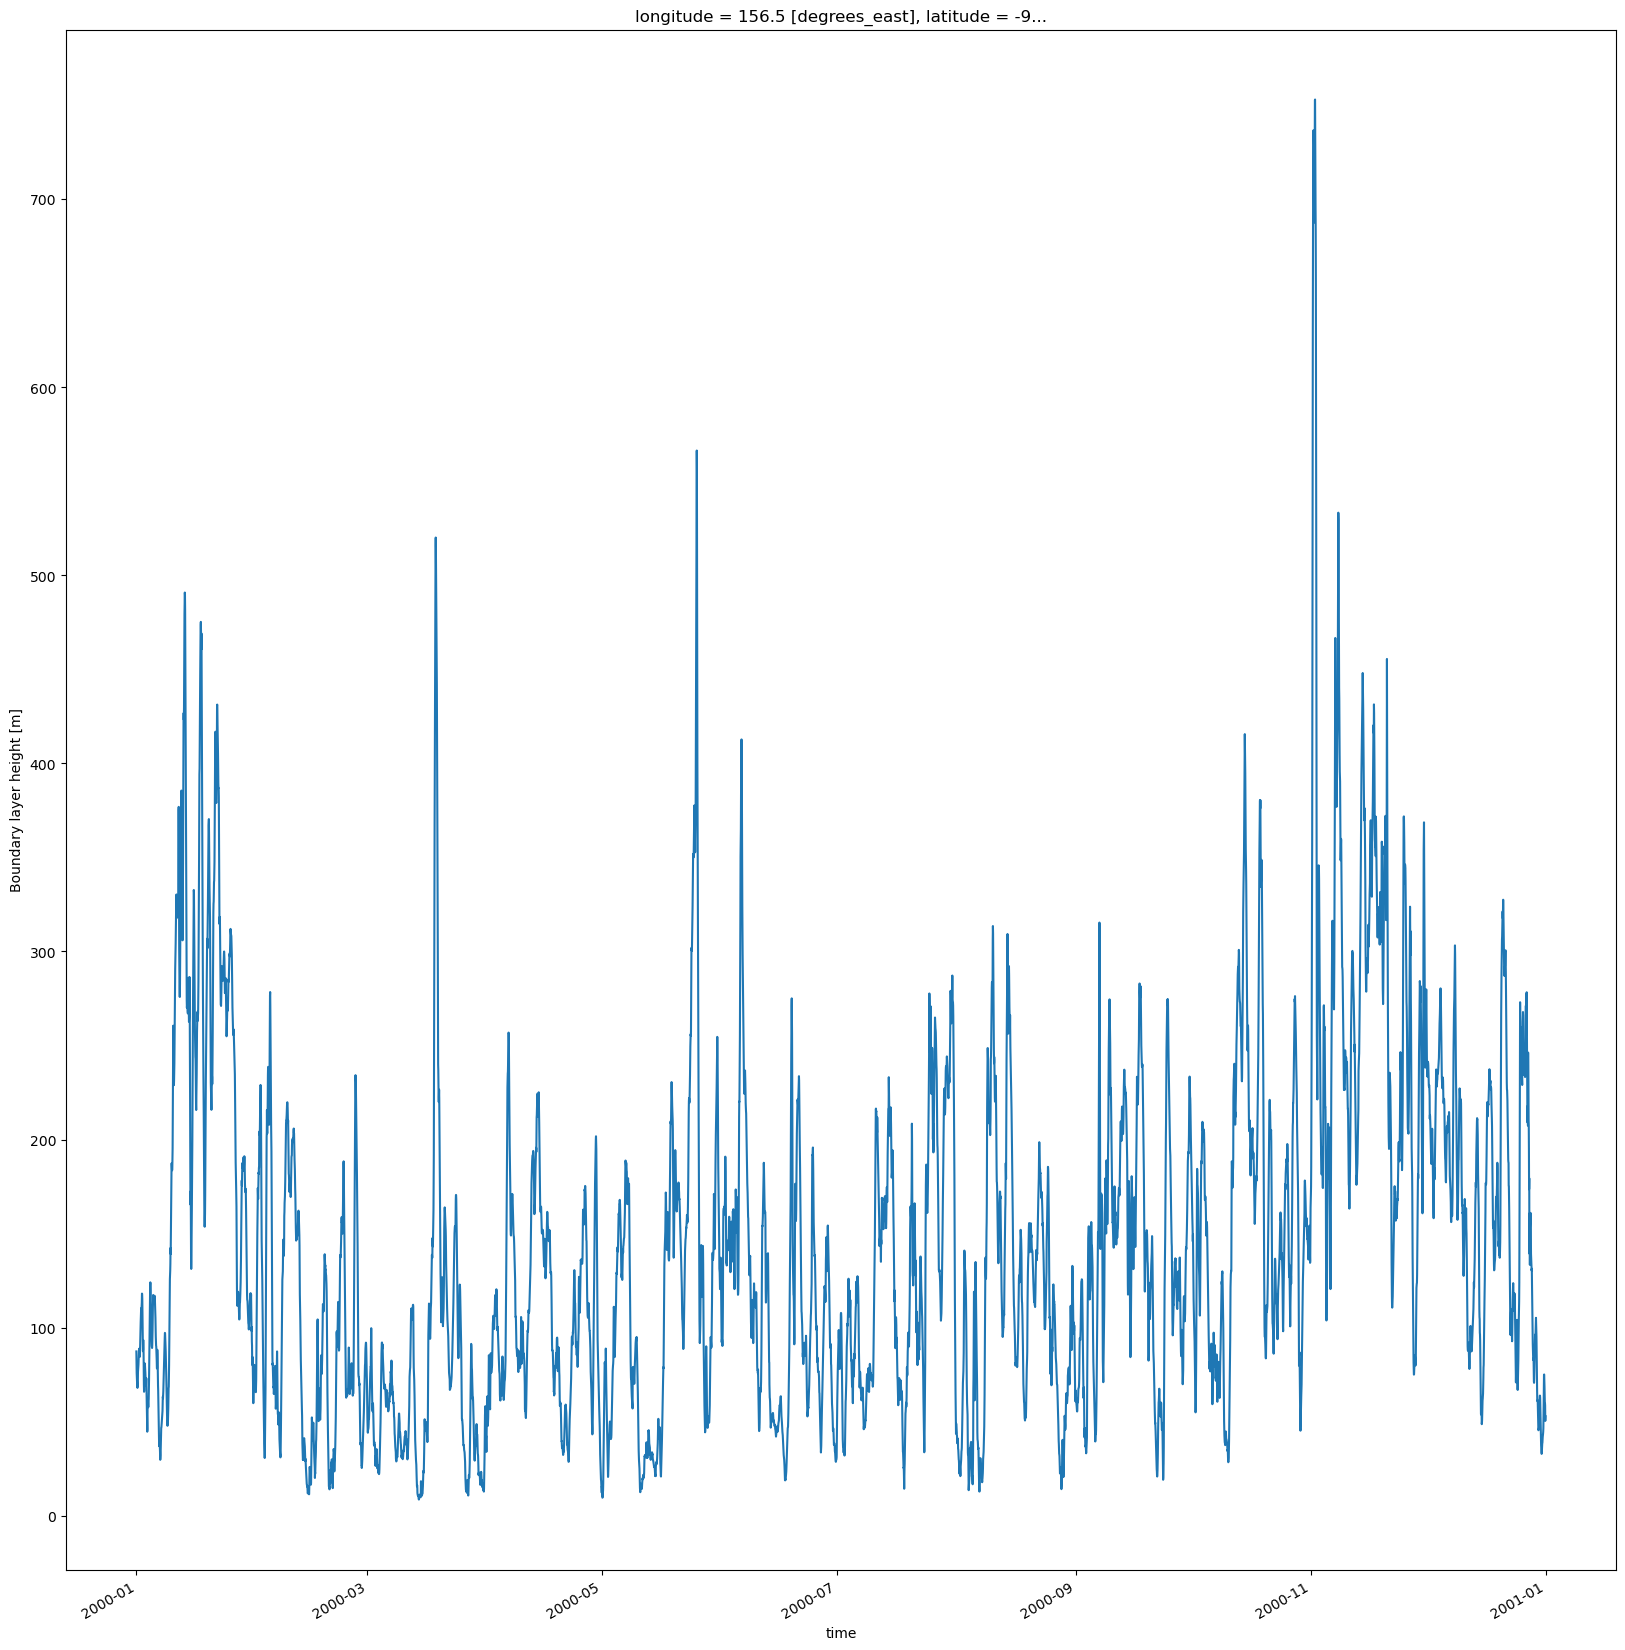

<Figure size 2000x2000 with 0 Axes>

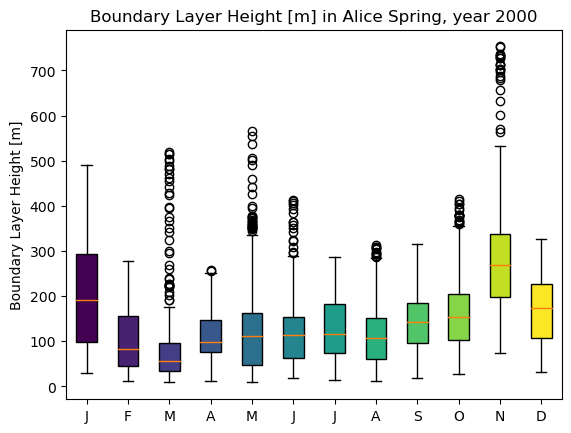

<Figure size 2000x2000 with 0 Axes>

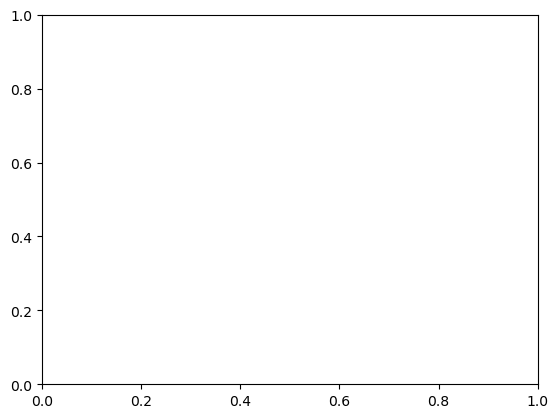

In [387]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Amsterdam/Coordinates Latitude: 52.377956 ° N, Longitude: 4.897070° E
amsterdamLong = (180.0 + 52.38)
amsterdamLat = -4.89

#Sidney/Coordinates Latitude: 33.865143 ° S, Longitude: 151.122983° E
sydneyLong = (180.0 - 33.87)
sydneyLat = -151.12

#AliceSpring(AustralieCenter)/Coordinates Latitude: 23.700552 ° S, Longitude: 133.882675° E
aliceSpringLong = (180.0 - 23.70)
aliceSpringLat = -133.88


def boxPlotByMonth (latitudeCity, longitudeCity, dataNameToPlot, title, ylabel, figureName):
    ds = wetDataEra5[dataNameToPlot].sel(longitude = longitudeCity, latitude = latitudeCity, method='nearest')

    fig = plt.figure(figsize=(20,20))
    ds.plot.line(x="time")

    janu = ds.sel(time=slice('2000-01-01', '2000-01-31'))
    febr = ds.sel(time=slice('2000-02-01', '2000-02-28'))
    marc = ds.sel(time=slice('2000-03-01', '2000-03-31'))
    apri = ds.sel(time=slice('2000-04-01', '2000-04-30'))
    may  = ds.sel(time=slice('2000-05-01', '2000-05-31'))
    june = ds.sel(time=slice('2000-06-01', '2000-06-30'))
    july = ds.sel(time=slice('2000-07-01', '2000-07-31'))
    augu = ds.sel(time=slice('2000-08-01', '2000-08-31'))
    sept = ds.sel(time=slice('2000-09-01', '2000-09-30'))
    octo = ds.sel(time=slice('2000-10-01', '2000-10-31'))
    nove = ds.sel(time=slice('2000-11-01', '2000-11-30'))
    dece = ds.sel(time=slice('2000-12-01', '2000-12-31'))

    fig = plt.figure(figsize=(20,20))
 
    # define the data
    box_plot_data=[janu,febr,marc,apri,may, june, july, augu, sept, octo, nove, dece]

    # define a colormap
    cmap = plt.cm.get_cmap('viridis') #'tab20')

    # extract colors from the colormap
    colors = cmap(np.linspace(0, 1, len(box_plot_data)))

    # create the boxplot
    fig, ax = plt.subplots()
    bp = ax.boxplot(box_plot_data,  patch_artist=True,
                   labels=['J', 'F', 'M', 'A',
                           'M', 'J', 'J', 'A',
                           'S', 'O', 'N', 'D'])

    # set the colors of the boxplot elements
    for i, box in enumerate(bp['boxes']):
       # box.set(color=colors[i], linewidth=2)
        box.set(facecolor=colors[i])

    # add a title and y-axis label
    ax.set_title(title)
    ax.set_ylabel(ylabel)    

    # show the plot
    plt.savefig(figureName, dpi=150)

def boxPlotByDays (latitudeCity, longitudeCity, dataNameToPlot, title, ylabel, figureName):
    ds = wetDataEra5[dataNameToPlot].sel(longitude = longitudeCity, latitude = latitudeCity, method='nearest')

    fig = plt.figure(figsize=(20,20))
    ds.plot.line(x="time")

    janu = ds["time.dayofyear"].sel(time=slice('2000-01-01', '2000-01-31'))
    febr = ds.sel(time=slice('2000-02-01', '2000-02-28'))
    marc = ds.sel(time=slice('2000-03-01', '2000-03-31'))
    apri = ds.sel(time=slice('2000-04-01', '2000-04-30'))
    may  = ds.sel(time=slice('2000-05-01', '2000-05-31'))
    june = ds.sel(time=slice('2000-06-01', '2000-06-30'))
    july = ds.sel(time=slice('2000-07-01', '2000-07-31'))
    augu = ds.sel(time=slice('2000-08-01', '2000-08-31'))
    sept = ds.sel(time=slice('2000-09-01', '2000-09-30'))
    octo = ds.sel(time=slice('2000-10-01', '2000-10-31'))
    nove = ds.sel(time=slice('2000-11-01', '2000-11-30'))
    dece = ds.sel(time=slice('2000-12-01', '2000-12-31'))

    fig = plt.figure(figsize=(20,20))
 
    # define the data
    box_plot_data=[janu,febr,marc,apri,may, june, july, augu, sept, octo, nove, dece]

    # define a colormap
    cmap = plt.cm.get_cmap('viridis') #'tab20')

    # extract colors from the colormap
    colors = cmap(np.linspace(0, 1, len(box_plot_data)))

    # create the boxplot
    fig, ax = plt.subplots()
    bp = ax.boxplot(box_plot_data,  patch_artist=True,
                   labels=['Mon', 'Tue', 'Thir', 'Fri',
                           'Sat', 'Sun'])

    # set the colors of the boxplot elements
    for i, box in enumerate(bp['boxes']):
       # box.set(color=colors[i], linewidth=2)
        box.set(facecolor=colors[i])

    # add a title and y-axis label
    ax.set_title(title)
    ax.set_ylabel(ylabel)    

    # show the plot
    plt.savefig(figureName, dpi=150)


boxPlotByMonth (amsterdamLat, amsterdamLong, 'blh', 
                'Boundary Layer Height [m] in Amsterdam, year 2000', 
                'Boundary Layer Height [m]', 'BoundaryLayerHeigthAmsterdam2000.png')

boxPlotByMonth (sydneyLat, sydneyLong, 'blh', 
                'Boundary Layer Height [m] in Sidney, year 2000', 
                'Boundary Layer Height [m]', 'BoundaryLayerHeigthSidney2000.png')

boxPlotByMonth (aliceSpringLat, aliceSpringLong, 'blh', 
                'Boundary Layer Height [m] in Alice Spring, year 2000', 
                'Boundary Layer Height [m]', 'BoundaryLayerHeigthAliceSpring2000.png')


fig = plt.figure(figsize=(20,20))
 
# define the data

box_plot_data=wetDataEra5['blh']

# define a colormap
cmap = plt.cm.get_cmap('viridis') #'tab20')

# extract colors from the colormap
colors = cmap(np.linspace(0, 1, len(box_plot_data)))

# create the boxplot
fig, ax = plt.subplots()
bp = ax.boxplot(box_plot_data,  patch_artist=True,
                   labels=['2000'])


<xarray.DataArray 'blh' (time: 24)>
array([ 933.7864 ,  937.03613,  890.8899 ,  860.6675 ,  824.812  ,  774.22437,
        745.6267 ,  764.15015,  833.0447 ,  933.5698 ,  924.03735,  900.4226 ,
        909.8467 ,  984.1575 , 1027.8123 , 1047.9604 ,  994.6648 ,  925.44556,
        943.2107 ,  989.35693, 1003.2224 ,  980.1494 , 1016.0049 ,  974.62476],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2000-08-15 ... 2000-08-15T23:00:00
    longitude  float32 232.5
    latitude   float32 -5.0
Attributes:
    units:      m
    long_name:  Boundary layer height
<xarray.DataArray 'blh' (time: 24)>
array([ 822.7539 ,  877.8911 ,  943.1023 ,  919.3794 ,  848.96826,  809.2134 ,
        785.9236 ,  750.6096 ,  745.8435 ,  761.44214,  804.5554 ,  837.4861 ,
        877.1328 ,  889.6985 ,  922.41235,  945.91895,  969.3169 ,  959.4595 ,
        948.9519 ,  985.7822 , 1019.03784, 1068.3254 , 1211.5305 , 1287.0327 ],
      dtype=float32)
Coordinates:
  * time       (time) datetim

/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/marianne/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<Figure size 2000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

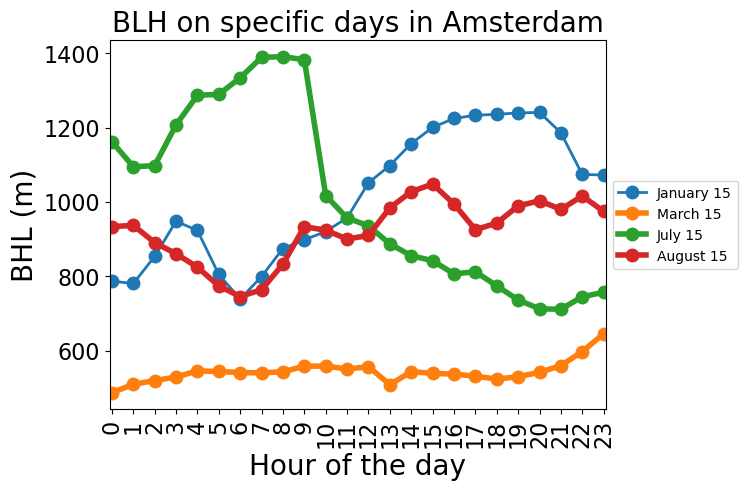

In [170]:
import matplotlib.colors

Long = (180.0 + 52.38)
Lat = -4.89

wetDataEra5 = xr.open_dataset('wetSettlingData_ERA5_2000.nc')

ds = wetDataEra5['blh'].sel(longitude = Long, latitude = Lat, method='nearest')

ds1 = ds.isel(time=(ds.time.dt.month == 1))
ds1 = ds1.isel(time=(ds1.time.dt.day == 15))

ds2 = ds.isel(time=(ds.time.dt.month == 2))
ds2 = ds2.isel(time=(ds2.time.dt.day == 15))

ds3 = ds.isel(time=(ds.time.dt.month == 3))
ds3 = ds3.isel(time=(ds3.time.dt.day == 15))

ds4 = ds.isel(time=(ds.time.dt.month == 4))
ds4 = ds4.isel(time=(ds4.time.dt.day == 15))

ds5 = ds.isel(time=(ds.time.dt.month == 5))
ds5 = ds5.isel(time=(ds5.time.dt.day == 15))

ds6 = ds.isel(time=(ds.time.dt.month == 6))
ds6 = ds6.isel(time=(ds6.time.dt.day == 15))

ds7 = ds.isel(time=(ds.time.dt.month == 7))
ds7 = ds7.isel(time=(ds7.time.dt.day == 15))

ds8 = ds.isel(time=(ds.time.dt.month == 8))
ds8 = ds8.isel(time=(ds8.time.dt.day == 15))

ds9 = ds.isel(time=(ds.time.dt.month == 9))
ds9 = ds9.isel(time=(ds9.time.dt.day == 15))

ds10 = ds.isel(time=(ds.time.dt.month == 10))
ds10 = ds10.isel(time=(ds10.time.dt.day == 15))

ds11 = ds.isel(time=(ds.time.dt.month == 11))
ds11 = ds11.isel(time=(ds11.time.dt.day == 15))

ds12 = ds.isel(time=(ds.time.dt.month == 12))
ds12 = ds12.isel(time=(ds12.time.dt.day == 15))

print(ds8)
print(ds9)

fig = plt.figure(figsize=(20,30))


xhours = ['0', '1', '2', '3', '4', '5', 
          '6', '7', '8', '9','10','11',
          '12','13','14','15','16','17', 
          '18','19','20','21','22','23']

fig = plt.figure(figsize=(30,30))
 

# define a colormap
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
        ["darkblue","red","yellow","yellow","red","darkblue"])

# extract colors from the colormap
colors = cmap(np.linspace(0, 1, len(box_plot_data)))

# create the boxplot
fig, ax = plt.subplots()


plt.plot(xhours, ds1,'.-',markersize=18, linewidth=2, label='January 15')
#plt.plot(xhours, ds2,'.-',markersize=18, linewidth=4, label='February 15')
plt.plot(xhours, ds3,'.-',markersize=18, linewidth=4, label='March 15')
#plt.plot(xhours, ds4,'.-',markersize=18, linewidth=4, label='April 15')
#plt.plot(xhours, ds5,'.-',markersize=18, linewidth=4, label='May 15')
#plt.plot(xhours, ds6,'.-',markersize=18, linewidth=4, label='June 15')
plt.plot(xhours, ds7,'.-',markersize=18, linewidth=4, label='July 15')
plt.plot(xhours, ds8,'.-',markersize=18, linewidth=4, label='August 15')
#plt.plot(xhours, ds9,'.-',markersize=18, linewidth=4, label='September 15')
#plt.plot(xhours, ds10,'.-',markersize=18, linewidth=4, label='October 15')
#plt.plot(xhours, ds11,'.-',markersize=18, linewidth=4, label='November 15')
#plt.plot(xhours, ds12,'.-',markersize=18, linewidth=4, label='December 15')


plt.xlabel('Hour of the day' , fontsize=20)
plt.ylabel('BHL (m)', fontsize=20)

# Add a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='upper left', prop={'size': 14})
plt.xticks(xhours, rotation=90)
plt.xlim([-0.1,23.1])
plt.tick_params(axis='x', which='major', labelsize=3)

plt.margins(x=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_prop_cycle('color', list(colors))

plt.title("BLH on specific days in Amsterdam", fontsize=20)
plt.savefig('BLH on specific days in Amsterdam.png', dpi=150)



### a = np.arange(9).reshape((3, 3))
print(a)

b = np.zeros(9).reshape((3, 3))
print(b)

a[b < 4] = -1
print(a)


AttributeError: 'PathPatch' object has no attribute 'set_width'

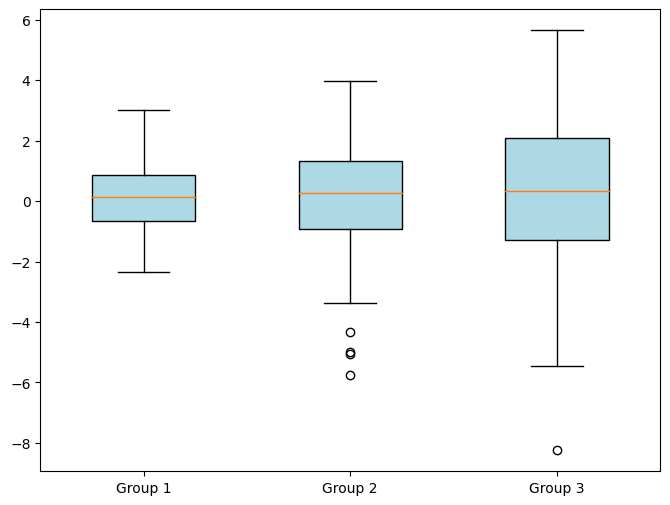

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# Create a boxplot with increased x-axis spacing
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(data, widths=0.5, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3'])

# Increase x-axis spacing
ax.margins(x=0.05)

# Adjust box width and gap
for box in bp['boxes']:
    box.set_width(0.5)
for whisker in bp['whiskers']:
    whisker.set_xdata(whisker.get_xdata() - 0.1)
for cap in bp['caps']:
    cap.set_xdata(cap.get_xdata() - 0.1)
for median in bp['medians']:
    median.set_xdata(median.get_xdata() - 0.1)
for flier in bp['fliers']:
    flier.set_xdata(flier.get_xdata() - 0.1)

plt.show()

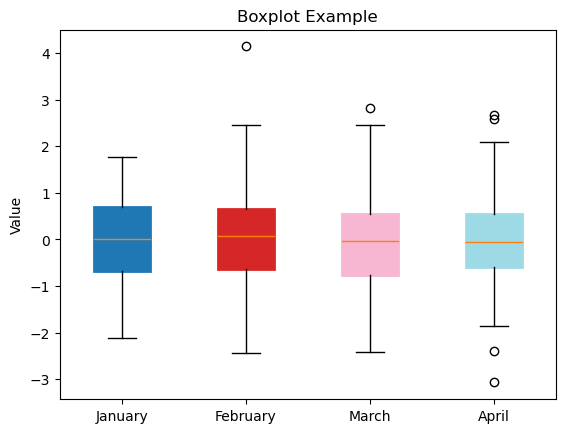

In [299]:
import numpy as np
import matplotlib.pyplot as plt


# define a colormap
cmap = plt.cm.get_cmap('tab20')

# extract colors from the colormap
colors = cmap(np.linspace(0, 1, len(data)))

# create the boxplot
fig, ax = plt.subplots()
bp = ax.boxplot(data,  patch_artist=True,
               labels=['January','February','March','April'])

# set the colors of the boxplot elements
for i, box in enumerate(bp['boxes']):
    box.set(color=colors[i], linewidth=2)
    box.set(facecolor=colors[i])

# add a title and y-axis label
ax.set_title('Boxplot Example')
ax.set_ylabel('Value')    
    
# set the colorbar
#sm = plt.cm.ScalarMappable(cmap=cmap)
#sm.set_array([])
#cbar = plt.colorbar(sm)

# show the plot
plt.show()



In [214]:
print(amsterdamBHL.groupby('time.month').mean())
print(amsterdamBHL.groupby('time.month').std())

<xarray.DataArray 'blh' (month: 4)>
array([909.5533, 539.3344, 471.2916, 633.4679], dtype=float32)
Coordinates:
    longitude  float32 232.5
    latitude   float32 -5.0
  * month      (month) int64 1 2 3 4
<xarray.DataArray 'blh' (month: 4)>
array([212.9230957 , 110.16412354, 118.65999603, 159.78355408])
Coordinates:
    longitude  float32 232.5
    latitude   float32 -5.0
  * month      (month) int64 1 2 3 4


/var/folders/82/klr7dwlx2ns9ssqtzcmlrs140000gr/T/ipykernel_34905/3628450309.py:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


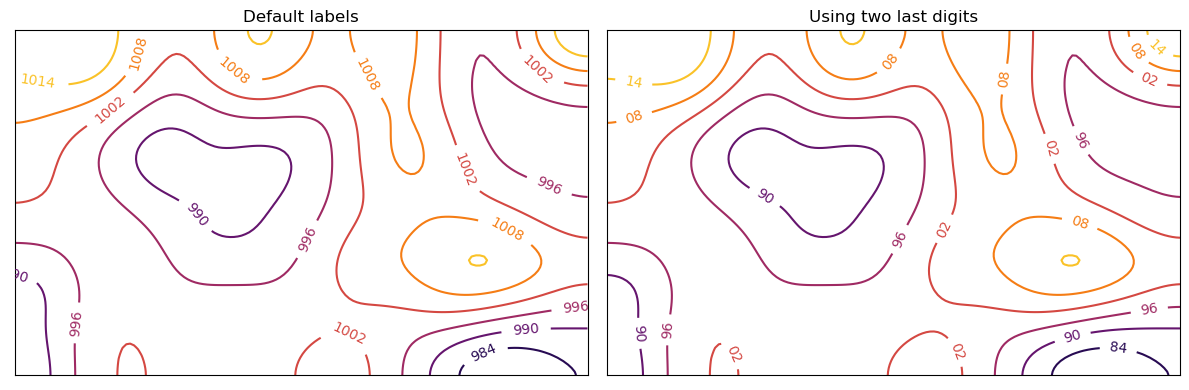

In [261]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

Z = gaussian_filter(np.random.rand(100, 150), sigma=12) * 1000 + 500

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

CS1 = ax1.contour(Z, cmap='inferno')
ax1.clabel(CS1, CS1.levels)
ax1.set_title('Default labels')
ax1.set_xticks([])
ax1.set_yticks([])

CS2 = ax2.contour(Z, cmap='inferno')
ax2.clabel(CS2, CS2.levels, fmt=lambda x: f'{x:.0f}'[-2:])
ax2.set_title('Using two last digits')
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.show()

## Code optimised for vectors


In [155]:
a = np.arange(9).reshape((3, 3))
print(a)

b = np.arange(9).reshape((3, 3))
print(b)

c = a*b
print(c)


[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


<br>
Scavenging coefficient for gaz:
<br>
<br> 

\begin{equation}
\lambda_g = \int_R 2 \pi D_{diff} Sh R N(_R) \exp \bigg(-\frac{3}{2} \frac{D_{diff} Sh }{v_t(_R)R^2HR_uT} z\bigg) dR
\end{equation}

With Ddiff (in m2 s−1) is the molecular diffusion coefficient of the considered gaseous pollutant in the air. Sh is the Sherwood number to take the transfer of gases from air towards a moving raindrop into account (see the “Electronic Supplementary Material” later referred to as “ESM”). H (in M atm−1) is the Henry’s constant for the considered gaseous species, Ru (0.0831 atm M−1 K−1), the universal constant for ideal gases, T (in K), the air temperature and finally, z (in m), the distance of the falling raindrop to the bottom of the cloud. 
<br>